In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [128]:
import subprocess
import time


In [129]:
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import production_envelope


In [130]:
def get_elements(rid):
    r = model.reactions.get_by_id(rid)
    m = r.reactants[0]    
    elements = m.elements.copy()
    
    res = {
        'reaction' : rid,
        'metabolite' : m.name,
        'mid' : m.id,
        'N' : 'N' in elements,
        'C' : 'C' in elements,
        
    }
    return pd.Series(res)

In [131]:
import os
model_dpath = os.path.join('..', 'Models',  'kbase_models','model_objects')
os.listdir(model_dpath)


['HOT1A3_2OrMore_gapfill.model.sbml',
 'HOT1A3_2OrMore_nogap.model.sbml',
 'HOT1A3_BlastKOALA_KEGG_gapfill.model.sbml',
 'HOT1A3_BlastKOALA_KEGG_nogap.model.sbml',
 'HOT1A3_carveme_annotations_gapfill.model.sbml',
 'HOT1A3_carveme_annotations_nogap.model.sbml',
 'HOT1A3_DRAM_gapfill.model.sbml',
 'HOT1A3_DRAM_nogap.model.sbml',
 'HOT1A3_Genbank_annotations_parsed_by_Pathway_Tools_gapfill.model.sbml',
 'HOT1A3_Genbank_annotations_parsed_by_Pathway_Tools_nogap.model.sbml',
 'HOT1A3_Majority_gapfill.model.sbml',
 'HOT1A3_Majority_nogap.model.sbml',
 'HOT1A3_NCBI_EC_numbers_gapfill.model.sbml',
 'HOT1A3_NCBI_EC_numbers_nogap.model.sbml',
 'HOT1A3_ProkkaAnnotation_gapfill.model.sbml',
 'HOT1A3_ProkkaAnnotation_nogap.model.sbml',
 'HOT1A3_RAST_annotation_gapfill.model.sbml',
 'HOT1A3_RAST_annotation_nogap.model.sbml',
 'HOT1A3_Union_gapfill.model.sbml',
 'HOT1A3_Union_nogap.model.sbml',
 'majority2.model.sbml']

In [ ]:
models_dict = {fname : cobra.io.read_sbml_model(os.path.join(model_dpath, fname)) for fname in os.listdir(model_dpath)}


Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00443_c0 "ABEE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02920_c0 "2_Amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridinediphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00012_c0 "PPi_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00067_c0 "H_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00683_c0 "Dihydropteroate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00002_c0 "ATP_c0">
Use of the species charge attribute is discouraged, use fbc:charge

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00635_c0 "Cbl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00166_c0 "Calomide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11436_c0 "fa3_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15804_c0 "Iso_C15_0_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00137_c0 "Citrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00260_c0 "Isocitrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00521_c0 "dTDP_4_oxo_6_deoxy_D_glucose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00522_c0 "dTDP_4_oxo_L_rhamnose_c0">
Use of the species charge attribute is discouraged, use fbc

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08744_c0 "3_Hydroxy_2_6_dimethyl_5_methylene_heptanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00201_c0 "10_Formyltetrahydrofolate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03524_c0 "10_Formyl_THF_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00477_c0 "N_Acetyl_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00909_c0 "1_Aminocyclopropane_1_carboxylate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00013_c0 "NH3_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00094_c0 "2_Oxobutyrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd0

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03390_c0 "Se_Methylselenocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12271_c0 "5_L_Glutamyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03394_c0 "5_L_Glutamyl_Se_methylselenocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11608_c0 "Peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00095_c0 "Glycerone_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01647_c0 "2_Phenylacetamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00430_c0 "PACT_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00208_c0 "LACT_c0">
Use of the species cha

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15325_c0 "1_dodecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03002_c0 "Lipid_A_disaccharide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02993_c0 "Lipid_IVA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15270_c0 "octadecynoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15272_c0 "Octadecynoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02730_c0 "3_Deoxy_D_manno_octulosonate8_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12225_c0 "Dihydrolipolprotein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12005_c0 "Lipoyl

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12390_c0 "Peptidylproline_omega180_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12358_c0 "Peptidylproline_omega0_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00383_c0 "Shikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02030_c0 "3_phosphoshikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00873_c0 "Nicotinate_ribonucleotide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03471_c0 "Nicotinate_D_ribonucleoside_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00219_c0 "Prephenate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00868_c0 "p_hydroxyphenylpyruvate

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03377_c0 "3_Aminopropiononitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03646_c0 "gamma_Glutamyl_3_aminopropiononitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00001_e0 "H2O_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00867_c0 "Inositol_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11818_c0 "Phosphate_monoester_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00057_c0 "Alcohol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16422_c0 "6_Thioxanthine_5_monophosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16423_c0 "6_Thioguanosine_mono

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00247_c0 "Orotate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11478_c0 "R_3_Hydroxybutanoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11465_c0 "But_2_enoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03666_c0 "2_5_Diamino_6_5_triphosphoryl_3_4_trihydroxy_2_oxopentyl__amino_4_oxopyrimidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00322_c0 "L_Isoleucine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11915_c0 "tRNAIle_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12256_c0 "L_Isoleucyl_tRNAIle_c0">
Use of the species charge attribute is discouraged, use fbc:ch

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00143_c0 "Phenylpyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03480_c0 "2_Hydroxyphenylacetate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00050_c0 "FMN_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00146_c0 "Carbamoylphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15327_c0 "1_hexadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15368_c0 "R_3_hydroxy_cis_myristol_7_eoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11484_c0 "HMA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11467_c0 "2E_Tetra

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15054_c0 "3_Oxo_OPC4_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00300_c0 "Urate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15047_c0 "OPC6_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15046_c0 "3_Oxo_OPC8_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00282_c0 "S_Dihydroorotate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00343_c0 "N_Carbamoyl_L_aspartate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02738_c0 "5_Methyltetrahydropteroyltri_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02555_c0 "Tetrahydropteroyltri_L_glutamate_c0">


Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00628_c0 "R_Prunasin_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00439_c0 "Mandelonitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00332_c0 "Mevalonic_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00288_c0 "D_Glucosamine_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03227_c0 "5beta_Cholestane_3alpha_7alpha_26_triol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03228_c0 "3alpha_7alpha_Dihydroxy_5beta_cholestan_26_al_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02535_c0 "2_3_Dihydroxy_3_methylvalerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Specie

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03375_c0 "3_Hydroxypropanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01212_c0 "Thiopurine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02228_c0 "Thiopurine_S_methylether_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02311_c0 "4_Imidazolone_5_propanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00344_c0 "N_Formimino_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04014_c0 "cis_1_3_Dichloropropene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04016_c0 "cis_3_Chloro_2_propene_1_ol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00668_c0 "ALC

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17405_c0 "3_3_Methylthiopropylmalate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01441_c0 "Acetyl_maltose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02835_c0 "UDP_2_3_bis3_hydroxytetradecanoylglucosamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02930_c0 "Lipid_X_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03043_c0 "3_Hydroxybutanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03447_c0 "2_Octaprenyl_6_methoxy_1_4_benzoquinone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03448_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone_c0">
Use of the species charge attribute is discouraged, use fbc

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02552_c0 "n_acetylglutamyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15699_c0 "Dianteisopentadecanoylphosphatidylethanolamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09313_c0 "2_5_Dichloro_carboxymethylenebut_2_en_4_olide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09314_c0 "2_5_Dichloro_4_oxohex_2_enedioate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd13364_c0 "Formyl_L_methionyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd13365_c0 "Methionyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00525_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_c0">
Use of the species charg

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02605_c0 "2_isopropyl_3_oxosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15706_c0 "1_2_Diisohexadecanoyl_sn_glycerol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15345_c0 "2_Acyl_sn_glycero_3_phosphoglycerol_tetradec_7_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01844_c0 "Propionyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00092_c0 "Uracil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01495_c0 "Dehydroalanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15311_c0 "1_2_Diacyl_sn_glycerol_dioctadecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge inst

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02187_c0 "Methacrylyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03572_c0 "S_3_Hydroxyisobutyryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00251_c0 "ADPribose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_e0 "Mg_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_c0 "Mg_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00200_c0 "4MOP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00082_c0 "D_Fructose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09844_c0 "3S_3_Hydroxyadipyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:cha

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00159_e0 "L_Lactate_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03398_c0 "Selenocystathionine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03397_c0 "Selenohomocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15676_c0 "1_isohexadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00276_c0 "GLUM_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00134_c0 "Palmitoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03120_c0 "S_Hydroxyoctanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00911_c0 "6_phospho_D_glucono_1_5_lactone_c

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15338_c0 "2_Acyl_sn_glycero_3_phosphoethanolamine_tetradec_7_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03562_c0 "2_Propyn_1_al_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03563_c0 "NA_1986_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00510_c0 "deoxyribose_5_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01242_c0 "Thyminose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08742_c0 "trans_2_Methyl_5_isopropylhexa_2_5_dienoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00283_c0 "Geranyldiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08994_c0 "Iminoerythrose_4_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00610_c0 "D_Glutamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04013_c0 "trans_1_3_Dichloropropene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08210_c0 "ADC_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03736_c0 "Lauroyl_KDO2_lipid_IVA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03586_c0 "kdo2_lipid_iva_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03122_c0 "S_Hydroxyhexanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03123_c0 "3_Oxohexanoyl_CoA_c0">
Use of the sp

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00712_c0 "2_Dehydropantoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02544_c0 "4_Carboxy_4_hydroxy_2_oxoadipate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00331_c0 "cis_Aconitate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15413_c0 "branching_glycogen_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03671_c0 "D_Glucosamine1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02611_c0 "N_Acetyl_D_glucosamine1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14935_c0 "3_Oxostearoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00851_c0 "tran

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16439_c0 "5_Deoxy_5_fluorocytidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16329_c0 "Doxifluridine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15371_c0 "R_3_Hydroxyoctadecanoyl_acyl_carrierprotein__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00007_e0 "O2_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08367_c0 "2R_3_Sulfolactate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03285_c0 "3_Sulfopyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00822_c0 "O_Succinyl_L_homoserine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03496_c0 "Undecaprenyl_diphosp

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15509_c0 "two_linked_disacharide_pentapeptide_and_tripeptide_murein_units_uncrosslinked__middle_of_chain_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15504_c0 "two_linked_disacharide_tetrapeptide_and_tripeptide_murein_units_uncrosslinked__middle_of_chain_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17565_c0 "ditrans_dicis_Pentaprenyl_diphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15324_c0 "1_Acyl_sn_glycero_3_phosphoglycerol_octadec_11_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00164_c0 "Glucuronate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15703_c0 "1_2_Diisotetradecanoyl_sn_glycerol_c0">
Use of the species charge attribute is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd19442_c0 "Carboxyspermidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00264_c0 "Spermidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00339_c0 "5_Aminopentanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd27355_c0 "L_Cysteine_Desulfurases_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd27847_c0 "Persulfurated_L_cysteine_desulfurases_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd22119_c0 "4_Phosphonooxy_L_threonine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12489_c0 "cis_3_Decenoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd002

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd26863_c0 "DIHYDROLIPOYL_GCVH_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd27820_c0 "PROTEIN_LIPOYLLYSINE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd22271_c0 "AMINOMETHYLDIHYDROLIPOYL_GCVH_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11609_c0 "A_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd19174_c0 "S_2_Methylbutanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11610_c0 "AH2_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd27109_c0 "GLUCURONATE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd27042_c0 "FRUCTURONATE_c0">
Use of the species charge attribute 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15665_c0 "Peptidoglycan_polymer_n_subunits_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01997_c0 "Dimethylbenzimidazole_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00058_c0 "Cu2_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00149_c0 "Co2_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15666_c0 "Peptidoglycan_polymer_n_1_subunits_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17043_c0 "RNA_transcription_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00063_c0 "Ca2_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11416_c0 "Biomass_c0">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00013_e0 "NH3_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00205_e0 "K_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15477_c0 "glucosyl_glucosyl_galactosyl_glucosyl_inner_core_oligosaccharide_lipid_A_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15549_c0 "phospho_heptosyl_heptosyl_kdo2_lipidA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_e0 "Zn2_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00149_e0 "Co2_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15484_c0 "heptosyl_heptosyl_kdo2_lipidA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00

Adding exchange reaction EX_cpd00007_b with default bounds for boundary metabolite: cpd00007_b.
Adding exchange reaction EX_cpd00116_b with default bounds for boundary metabolite: cpd00116_b.
Adding exchange reaction EX_cpd00011_b with default bounds for boundary metabolite: cpd00011_b.
Adding exchange reaction EX_cpd03453_b with default bounds for boundary metabolite: cpd03453_b.
Adding exchange reaction EX_cpd03726_b with default bounds for boundary metabolite: cpd03726_b.
Adding exchange reaction EX_cpd00132_b with default bounds for boundary metabolite: cpd00132_b.
Adding exchange reaction EX_cpd00066_b with default bounds for boundary metabolite: cpd00066_b.
Adding exchange reaction EX_cpd00060_b with default bounds for boundary metabolite: cpd00060_b.
Adding exchange reaction EX_cpd00023_b with default bounds for boundary metabolite: cpd00023_b.
Adding exchange reaction EX_cpd00118_b with default bounds for boundary metabolite: cpd00118_b.
Adding exchange reaction EX_cpd00119_b w

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00225_c0 "ATP_acetate_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00148_c0 "ATP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00148_c0 "ATP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00781_c0 "D_glyceraldehyde_3_phosphate_NAD_plus__oxidoreductase_phosphorylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00781_c0 "D_glyceraldehyde_3_phosphate_NAD_plus__oxidoreductase_phosphorylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00285_c0 "Succinate_CoA_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00285_c0 "Succinate_CoA_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01871_c0 "acetyl_CoA_enzyme_N6_dihydrolipoyllysine_S_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01871_c0 "acetyl_CoA_enzyme_N6_dihydrolipoyllysine_S_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01169_c0 "ATP_beta_D_glucose_6_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01169_c0 "ATP_be

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00159_c0 "S_malate_NAD_plus__oxidoreductase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00799_c0 "S_malate_hydro_lyase_fumarate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00799_c0 "S_malate_hydro_lyase_fumarate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01977_c0 "alpha_D_Glucose_6_phosphate_ketol_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01977_c0 "alpha_D_Glucose_6_phosphate_ketol_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00011_c0 "pyruvate_thiamin_dip

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01200_c0 "Sedoheptulose_7_phosphate_D_glyceraldehyde_3_phosphate_glycolaldehyde_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01241_c0 "Dihydrolipoamide_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01241_c0 "Dihydrolipoamide_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02185_c0 "2_Acetolactate_pyruvate_lyase_carboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02185_c0 "2_Acetolactate_pyruvate_lyase_carboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02201_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_diphosphate_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00351_c0 "gamma_L_glutamyl_L_cysteine_glycine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00351_c0 "gamma_L_glutamyl_L_cysteine_glycine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05994_c0 "acyl_acyl_carrier_protein_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05994_c0 "acyl_acyl_carrier_protein_NAD_plus__oxidoreductase_c0">
Enc

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05063_c0 "carbamate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00107_c0 "ATP_2_deoxy_5_hydroxymethylcytidine_5_diphosphate_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00107_c0 "ATP_2_deoxy_5_hydroxymethylcytidine_5_diphosphate_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00557_c0 "ITP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00557_c0 "ITP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Re

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01218_c0 "2_Deoxycytidine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01218_c0 "2_Deoxycytidine_5_monophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06522_c0 "Monocarboxylic_acid_amide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06522_c0 "Monocarboxylic_acid_amide_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00509_c0 "Succinate_semialdehyde_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00509_c0 "Succi

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05334_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12054_c0 "2_deoxyribonucleoside_diphosphate_trypanothione_disulfide_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12054_c0 "2_deoxyribonucleoside_diphosphate_trypanothione_disulfide_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10205_c0 "isoheptadecanoyl_glycerol_3_phosphate_O_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10205_c0 "isoheptadecanoyl_glycerol_3_phosphate_O_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00710_c0 "orotidine_5_phosphate_carboxy_lyase_UMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06300_c0 "L_Alanine_tRNAAla_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06300_c0 "L_Alanine_tRNAAla_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02305_c0 "2_methyl_4_amino_5_hydroxymethylpyrimidine_diphosphate_4_methyl_5_2_phosphoethyl_thiazole_2_methyl_4_aminopyridine_5_methenyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02305_c0 "2_methyl_4_amino_5_hydroxymethylpyrimidine_diphosphate_4_methyl_5_2_phosphoethyl_thiazole_2_methyl_4

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00208_c0 "Pyridoxamine_5_phosphate_oxygen_oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08823_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C18_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08823_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C18_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00140_c0 "adenosine_3_5_phosphate_5_nucleotidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00140_c0 "adenosine_3_5_phosphate_5_nucleotidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds ins

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01739_c0 "ATP_shikimate_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01739_c0 "ATP_shikimate_3_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02400_c0 "Nicotinate_D_ribonucleotide_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02400_c0 "Nicotinate_D_ribonucleotide_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01268_c0 "Prephenate_NAD_plus__oxidoreductasedecarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01268_c0 "Prephenate_NAD_plus__ox

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07485_c0 "beta_2_3_4_5_6_Pentachlorocyclohexanol_halidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07485_c0 "beta_2_3_4_5_6_Pentachlorocyclohexanol_halidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10995_c0 "quinone_reductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10995_c0 "quinone_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00191_c0 "L_Alanine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00191_c0 "L_Alanine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00695_c0 "ATP_alpha_D_glucose_1_phosphate_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00695_c0 "ATP_alpha_D_glucose_1_phosphate_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05116_c0 "R07406_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05116_c0 "R07406_c0">
Encoding LOWER_BOUND and UP

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08809_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C18_1_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00460_c0 "UTP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00460_c0 "UTP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06194_c0 "Protein_glutamine_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06194_c0 "Protein_glutamine_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02169_c0 "Glutaconyl_1_CoA_carbox

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01244_c0 "3_methyl_2_oxobutanoate_dihydrolipoyllysine_residue_2_methylpropanoyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_2_methylpropanoylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02154_c0 "Deamino_NAD_plus__nucleotidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02154_c0 "Deamino_NAD_plus__nucleotidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06200_c0 "Phosphoenolpyruvate_protein_L_histidine_N_pros_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06200_c0 "Phosphoenolpyruvate_protein_L_histidine_N_pros_phosphotra

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08845_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C12_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00300_c0 "GTP_7_8_8_9_dihydrolase_diphosphate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00300_c0 "GTP_7_8_8_9_dihydrolase_diphosphate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in K

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00471_c0 "L_ornithine_ammonia_lyase_cyclizing_L_proline_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05348_c0 "Decanoyl_acyl_carrier_protein_malonyl_acyl_carrier_protein_C_acyltransferase_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05348_c0 "Decanoyl_acyl_carrier_protein_malonyl_acyl_carrier_protein_C_acyltransferase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03245_c0 "S_Hydroxydecanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03245_c0 "S_Hydroxydecanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in Kineti

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01465_c0 "S_dihydroorotate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03052_c0 "5_Methyltetrahydropteroyltri_L_glutamate_L_homocysteine_S_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03052_c0 "5_Methyltetrahydropteroyltri_L_glutamate_L_homocysteine_S_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10204_c0 "acyl_CoA_sn_glycerol_3_phosphate_1_O_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10204_c0 "acyl_CoA_sn_glycerol_3_phosphate_1_O_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourage

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08979_c0 "quinone_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01108_c0 "beta_D_Glucose_NAD_plus__1_oxoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01108_c0 "beta_D_Glucose_NAD_plus__1_oxoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03406_c0 "Undecaprenyl_diphospho_N_acetylmuramoyl_N_acetylglucosamine__c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03406_c0 "Undecaprenyl_diphospho_N_acetylmuramoyl_N_acetylglucosamine__c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00029_c0 "5_aminolevulin

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00517_c0 "ITP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00517_c0 "ITP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03282_c0 "R04805_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03282_c0 "R04805_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03435_c0 "R_2_3_Dihydroxy_3_methylpentanoate_NADP_plus__oxidoreductase_isomerizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03435_c0 "R_2_3_Dihydroxy_3_methylpentanoate_NADP_plus__oxidoreductase_isomerizing_c0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00668_c0 "propanoyl_CoA_NADP_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00668_c0 "propanoyl_CoA_NADP_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08801_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C18_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08801_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C18_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02275_c0 "4_Guanidinobutanamide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Rea

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10264_c0 "isohexadecanoyl_CDPdiacylglycerol_sn_glycerol_3_phosphate_3_phosphatidyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03071_c0 "L_1_Pyrroline_3_hydroxy_5_carboxylate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03071_c0 "L_1_Pyrroline_3_hydroxy_5_carboxylate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03421_c0 "2_5_Diaminopyrimidine_nucleoside_triphosphate_mutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03421_c0 "2_5_Diaminopyrimidine_nucleoside_triphosphate_mutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14063_c0 "2_dehydro_L_idonate_NADP_plus__5_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00916_c0 "Xanthosine_5_phosphate_ammonia_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00916_c0 "Xanthosine_5_phosphate_ammonia_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00712_c0 "UTP_uridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00712_c0 "UTP_uridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08615_c0 "glycogen_synthase_AD

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00405_c0 "L_arginine_carboxy_lyase_agmatine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04704_c0 "coproporphyrinogen_III_S_adenosyl_L_methionine_oxidoreductasedecarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04704_c0 "coproporphyrinogen_III_S_adenosyl_L_methionine_oxidoreductasedecarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00299_c0 "GTP_7_8_8_9_dihydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00299_c0 "GTP_7_8_8_9_dihydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03975_c0 "FMNH2_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03975_c0 "FMNH2_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01281_c0 "R_Glycerate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01281_c0 "R_Glycerate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01670_c0 "Nicotinamide_ribonucleotide_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01670_c0 "Nicotinamide_ribonucleotide_phosphohydrolase_c0">

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00883_c0 "1D_myo_Inositol_3_phosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01457_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01457_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01255_c0 "5_O_1_Carboxyvinyl_3_phosphoshikimate_phosphate_lyase_chorismate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01255_c0 "5_O_1_Carboxyvinyl_3_phosphoshikimate_phosphate_lyase_chorismate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBoun

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01917_c0 "ATP_N_acetyl_L_glutamate_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01917_c0 "ATP_N_acetyl_L_glutamate_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10236_c0 "anteisopentadecanoyl_phosphatidylserine_decarboxylase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10236_c0 "anteisopentadecanoyl_phosphatidylserine_decarboxylase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04650_c0 "4_carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reacti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00728_c0 "L_Kynurenine_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00728_c0 "L_Kynurenine_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08850_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C18_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08850_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C18_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00772_c0 "ATP_D_ribose_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00772_c0 "ATP_D_ribose_5_phosphotransferase_c0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03462_c0 "Gal_beta1_3GalNAc_beta1_4Gal_beta1_4Glc_beta1_1Cer_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03462_c0 "Gal_beta1_3GalNAc_beta1_4Gal_beta1_4Glc_beta1_1Cer_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10224_c0 "anteisopentadecanoyl_phosphatidate_cytidylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10224_c0 "anteisopentadecanoyl_phosphatidate_cytidylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05337_c0 "3R_3_Hydroxyhexanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08299_c0 "diacylglycerol_kinase_n_C18_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03596_c0 "1_2_Dichloroethane_halidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03596_c0 "1_2_Dichloroethane_halidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00986_c0 "ATP_propanoate_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00986_c0 "ATP_propanoate_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10215_c0 "anteisoheptadecanoyl_1_acylglycerol_3_phosphate_O_acyltransferas

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04736_c0 "2_naphthylmethanol_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04736_c0 "2_naphthylmethanol_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02139_c0 "amygdalin_beta_glucosidase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02139_c0 "amygdalin_beta_glucosidase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00137_c0 "Adenosine_3_5_bisphosphate_3_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00137_c0 "Adenosine_3_5_bisphosphate_3_phosphohydrolase_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07262_c0 "R07385_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07262_c0 "R07385_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00515_c0 "ATP_IDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00515_c0 "ATP_IDP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08846_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08846_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in Kin

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05325_c0 "Octanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05325_c0 "Octanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14229_c0 "sn_glycerol_3_phosphate_quinone_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14229_c0 "sn_glycerol_3_phosphate_quinone_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11040_c0 "RXN_3341c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in th

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02792_c0 "gamma_glutamyltranspeptidase_family_protein_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02792_c0 "gamma_glutamyltranspeptidase_family_protein_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14334_c0 "ditrans_tricis_hexaprenyl_diphosphate_isopentenyl_diphosphate_hexaprenylcistransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14334_c0 "ditrans_tricis_hexaprenyl_diphosphate_isopentenyl_diphosphate_hexaprenylcistransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00993_c0 "4_fumarylacetoacetate_fumarylhydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes ele

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02866_c0 "3_methylbutanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02866_c0 "3_methylbutanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00304_c0 "GTP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00304_c0 "GTP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09102_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09102_c0 "ph

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03254_c0 "cis_cis_3_6_Dodecadienoyl_CoA_delta3_cis_delta2_trans_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03893_c0 "all_trans_octaprenyl_diphosphate_4_hydroxybenzoate_3_octaprenyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03893_c0 "all_trans_octaprenyl_diphosphate_4_hydroxybenzoate_3_octaprenyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02789_c0 "2_Isopropylmalate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02789_c0 "2_Isopropylmalate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxB

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05349_c0 "acetyl_CoA_acyl_carrier_protein_S_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14156_c0 "2_3_methylthioheptylmalate_hydroxymutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14156_c0 "2_3_methylthioheptylmalate_hydroxymutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07439_c0 "L_methionine_thioredoxin_disulfide_S_o

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00105_c0 "ATP_nicotinamide_nucleotide_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03243_c0 "Decanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03243_c0 "Decanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03446_c0 "O_Phospho_4_hydroxy_L_threonine_phospho_lyase_adding_water_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03446_c0 "O_Phospho_4_hydroxy_L_threonine_phospho_lyase_adding_water_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08848_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07883_c0 "3_hydroxy_5_methylhex_4_enoyl_CoA_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07883_c0 "3_hydroxy_5_methylhex_4_enoyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00691_c0 "10_Formyltetrahydrofolate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00691_c0 "10_Formyltetrahydrofolate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00427_c0 "methanol_hydrogen_peroxide_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00427_c0 "methanol_hydrogen_peroxide_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06025_c0 "5_L_glutamyl_peptide_taurine_5_glutamyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06025_c0 "5_L_glutamyl_peptide_taurine_5_glutamyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03424_c0 "L_erythro_4_Hydroxyglutamate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn0342

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12052_c0 "trypanothione_hydroperoxide_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00818_c0 "Raffinose_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00818_c0 "Raffinose_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09101_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09101_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02937_c0 "2_Formamido_N

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08040_c0 "UDP_N_acetyl_D_glucosamine_undecaprenyl_phosphate_N_acetyl_D_glucosamine_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08040_c0 "UDP_N_acetyl_D_glucosamine_undecaprenyl_phosphate_N_acetyl_D_glucosamine_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09211_c0 "Phosphatidylserine_syntase_n_C18_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09211_c0 "Phosphatidylserine_syntase_n_C18_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03141_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamyl_L_lysine_alanyl_D_alanine_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIAT

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01257_c0 "chorismate_L_glutamine_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00943_c0 "Palmitoyl_CoA_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00943_c0 "Palmitoyl_CoA_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00903_c0 "L_Valine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00903_c0 "L_Valine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00980_c0 "2_Phosphoglycolate_phosphohydrolase_c0">
Use of GENE ASSOCIATION

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00291_c0 "N_succinyl_L_glutamate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00291_c0 "N_succinyl_L_glutamate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07438_c0 "peptide_methionine_thioredoxin_disulfide_S_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07438_c0 "peptide_methionine_thioredoxin_disulfide_S_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00743_c0 "Glycerone_phosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00743_c0 "Glyce

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00693_c0 "5_Methyltetrahydrofolate_L_homocysteine_S_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01351_c0 "2_Deoxyguanosine_5_triphosphate_diphosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01351_c0 "2_Deoxyguanosine_5_triphosphate_diphosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03909_c0 "1_Deoxy_D_xylulose_5_phosphate_pyruvate_lyase_carboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03909_c0 "1_Deoxy_D_xylulose_5_phosphate_pyruvate_lyase_carboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use f

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09449_c0 "acyl_coenzyme_A_ligase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05323_c0 "Tetradecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05323_c0 "Tetradecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11007_c0 "TMDSf_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11007_c0 "TMDSf_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00991_c0 "S_3_hydroxy_3_methylglutaryl_CoA_acetoacetate_lyase_acetyl_CoA_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00991_c0 "S_3_hydroxy_3_methylglutaryl_CoA_acetoacetate_lyase_acetyl_CoA_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10260_c0 "anteisoheptadecanoyl_CDPdiacylglycerol_sn_glycerol_3_phosphate_3_phosphatidyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10260_c0 "anteisoheptadecanoyl_CDPdiacylglycerol_sn_glycerol_3_phosphate_3_phosphatidyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03242_c0 "S_3_hydroxydodecanoyl_CoA_NAD_plus__oxidoreduc

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08550_c0 "glycerol_3_phosphate_acyltransferase_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08550_c0 "glycerol_3_phosphate_acyltransferase_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00819_c0 "Galactosylglycerol_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00819_c0 "Galactosylglycerol_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00007_c0 "alpha_alpha_trehalose_glucohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00007_c0 "alpha_alpha_trehalose_glucohydrolase_c0

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03068_c0 "R_2_3_Dihydroxy_3_methylbutanoate_NADP_plus__oxidoreductase_isomerizing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06624_c0 "Aminoacyl_tRNA_aminoacylhydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06624_c0 "Aminoacyl_tRNA_aminoacylhydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08000_c0 "3_oxoacyl_acyl_carrier_protein_synthase_n_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08000_c0 "3_oxoacyl_acyl_carrier_protein_synthase_n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03061_c0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11749_c0 "5_deoxy_5_fluorocytidine_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11749_c0 "5_deoxy_5_fluorocytidine_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00063_c0 "ATP_diphosphohydrolase_diphosphate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00063_c0 "ATP_diphosphohydrolase_diphosphate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04453_c0 "5_hydroxyisourate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04453_c0 "5_hydroxyisourate_amidohydrolase_c0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02831_c0 "O_Succinylbenzoate_CoA_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02831_c0 "O_Succinylbenzoate_CoA_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10110_c0 "Phosphatidylserine_decarboxylase_Ecoli_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10110_c0 "Phosphatidylserine_decarboxylase_Ecoli_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00598_c0 "Succinyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00598_c0 "Succinyl_CoA_acetyl_CoA_C_acyl

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05114_c0 "5_amino_1_5_phospho_D_ribosylimidazole_carbon_dioxide_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05114_c0 "5_amino_1_5_phospho_D_ribosylimidazole_carbon_dioxide_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00653_c0 "3_aminopropanal_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00653_c0 "3_aminopropanal_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11550_c0 "S_Adenosyl_L_methionine_tRNA_guanine_N7_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discour

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01858_c0 "Deoxyadenosine_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00176_c0 "acetyl_adenylate_CoA_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00176_c0 "acetyl_adenylate_CoA_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10770_c0 "R08557_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10770_c0 "R08557_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00231_c0 "Acetamide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, u

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03333_c0 "3_4_dihydroxyphenylethyleneglycol_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03333_c0 "3_4_dihydroxyphenylethyleneglycol_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01757_c0 "L_cysteate_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01757_c0 "L_cysteate_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11609_c0 "Digalactosyl_diacylglycerol_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10255_c0 "isotetradecanoyl_Diacylglycerol_kinase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08598_c0 "GDPPYPHOSKIN_RXNc_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08598_c0 "GDPPYPHOSKIN_RXNc_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08797_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C14_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08797_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C14_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00478_c0 "L_tryptophan_oxygen_2_3_o

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00674_c0 "Propanoate_CoA_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02929_c0 "2_3_4_5_Tetrahydrodipicolinate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02929_c0 "2_3_4_5_Tetrahydrodipicolinate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00104_c0 "polyphosphate_kinase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00104_c0 "polyphosphate_kinase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00715_c0 "ITP_uridine_5_phosphotransferase_c0">
Use of

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05289_c0 "NADPH_oxidized_thioredoxin_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10020_c0 "fatty_acid__CoA_ligase_anteiso_C17_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10020_c0 "fatty_acid__CoA_ligase_anteiso_C17_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01973_c0 "N_Succinyl_LL_2_6_diaminoheptanedioate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01973_c0 "N_Succinyl_LL_2_6_diaminoheptanedioate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00117_c0 "ATP_UDP_ph

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn16573_c0 "pimelyl_acyl_carrier_protein_methyl_ester_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16573_c0 "pimelyl_acyl_carrier_protein_methyl_ester_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn41896_c0 "rxn41896_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn41896_c0 "rxn41896_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn45425_c0 "rxn45425_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn45425_c0 "rxn45425_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds ins

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn16574_c0 "ATP_molybdopterin_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16574_c0 "ATP_molybdopterin_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn24134_c0 "RXN_6201x_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn24134_c0 "RXN_6201x_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn23444_c0 "RXN_13179c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn23444_c0 "RXN_13179c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn2

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn21010_c0 "RXN_10656c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn21009_c0 "RXN_10655c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn21009_c0 "RXN_10655c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn21012_c0 "RXN_10658c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn21012_c0 "RXN_10658c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn21013_c0 "RXN_10659c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn21013_c0 "RXN_10659c_c0">
Encoding LOWER_BOUND

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn41830_c0 "rxn41830_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15166_c0 "L_cystathionine_L_homocysteine_lyase_deaminating_pyruvate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15166_c0 "L_cystathionine_L_homocysteine_lyase_deaminating_pyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn33959_c0 "Cysteine_Synthase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn33959_c0 "Cysteine_Synthase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05910_c0 "L_cysteine_glutathione_NADP_plus__oxidoreductase_disulfid

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15213_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15213_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15064_c0 "L_glutamine_D_fructose_6_phosphate_isomerase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15064_c0 "L_glutamine_D_fructose_6_phosphate_isomerase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15270_c0 "D_mannose_6_phosphate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15270_c0

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn23713_c0 "1_acylglycerolphosphate_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn20567_c0 "phosphatidylserine_decarboxylase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn20567_c0 "phosphatidylserine_decarboxylase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn23336_c0 "octanoyl_GcvH_transferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn23336_c0 "octanoyl_GcvH_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08502_e0 "enterobactin_FeIII_binding_spontaneous_e0">
Use of GENE ASSOCIATION or GENE_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05307_c0 "TRANS_RXNBWI_115637cemaizeexpSER_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05307_c0 "TRANS_RXNBWI_115637cemaizeexpSER_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05496_c0 "TRANS_RXNBWI_115637cemaizeexpL_ALPHA_ALANINE_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05496_c0 "TRANS_RXNBWI_115637cemaizeexpL_ALPHA_ALANINE_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05305_c0 "L_lysine_transport_out_via_proton_antiport_reversible_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05305_c0 "L_lysine_transport_out_v

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05618_c0 "manganese_transport_in_via_proton_symport_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03917_c0 "D_glycero_beta_D_manno_heptose_7_phosphate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03917_c0 "D_glycero_beta_D_manno_heptose_7_phosphate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10199_c0 "Peptidoglycan_subunit_synthesis_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10199_c0 "Peptidoglycan_subunit_synthesis_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn0353

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn13783_c0 "DNA_replication_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08333_c0 "1_4_dihydroxy_2_naphthoate_octaprenyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08333_c0 "1_4_dihydroxy_2_naphthoate_octaprenyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08528_c0 "fumarate_reductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08528_c0 "fumarate_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08713_c0 "heptosyltransferase_IV_LPS_core_synthesis_c0">
Use of GENE ASSOCIATION or GENE_ASS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00054_e0 "EX_L_Serine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00035_e0 "EX_L_Alanine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00039_e0 "EX_L_Lysine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00033_e0 "EX_Glycine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00322_e0 "EX_L_Isoleucine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00017_e0 "EX_S_Adenosyl_L_methionine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00104_e0 "EX_BIOT_e0">
Encoding LOWER_BOUN

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00777_c0 "D_ribose_5_phosphate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02314_c0 "ATP_D_tagatose_6_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00251_c0 "phosphate_oxaloacetate_carboxy_lyase_adding_phosphatephosphoenolpyruvate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00162_c0 "oxaloacetate_carboxy_lyase_pyruvate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00285_c0 "Succinate_CoA_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01871_c0 "acetyl_CoA_enzyme_N6_d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01388_c0 "isocitrate_hydro_lyase_cis_aconitate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01480_c0 "3_Hydroxy_2_methylpropanoate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01200_c0 "Sedoheptulose_7_phosphate_D_glyceraldehyde_3_phosphate_glycolaldehyde_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01241_c0 "Dihydrolipoamide_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02185_c0 "2_Acetolactate_pyruvate_lyase_carboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00763_c0 "Glycer

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05063_c0 "carbamate_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00107_c0 "ATP_2_deoxy_5_hydroxymethylcytidine_5_diphosphate_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00557_c0 "ITP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06096_c0 "1_4_alpha_D_Glucan_orthophosphate_alpha_D_glucosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04070_c0 "pyridoxine_5_phosphate_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01358_c0 "inosine_phosphate_alpha_D_ribosyltransfe

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10205_c0 "isoheptadecanoyl_glycerol_3_phosphate_O_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00890_c0 "3_O_alpha_D_Galactosyl_1D_myo_inositol_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06817_c0 "5_L_glutamyl_peptide_Se_Methylselenocysteine_5_glutamyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01843_c0 "2_phenylacetamide_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00816_c0 "Lactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11808_c0 "4_glutathionyl_cyclophosphamide_hydr

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05346_c0 "butyryl_acyl_carrier_protein_malonyl_acyl_carrier_protein_C_acyltransferase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00867_c0 "L_histidine_ammonia_lyase_urocanate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00275_c0 "Glycine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03248_c0 "Hexanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08127_c0 "Amylomaltase_maltotetraose_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05733_c0 "O3_acetyl_L_serine_thiosulfa

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00514_c0 "Inosine_5_triphosphate_pyrophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00789_c0 "1_5_phospho_D_ribosyl_ATP_diphosphate_phospho_alpha_D_ribosyl_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02374_c0 "R03314_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03436_c0 "S_2_Aceto_2_hydroxybutanoate_NADP_plus__oxidoreductase_isomerizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08976_c0 "quinone_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14123_c0 "gamma_Glutamyl_beta_aminopropiononitrile_amidohydrolase_c0">
En

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01242_c0 "pyruvate_dihydrolipoyllysine_residue_acetyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_acetylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03264_c0 "ATP_L_selenomethione_S_adenosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01362_c0 "Orotidine_5_phosphate_diphosphate_phospho_alpha_D_ribosyl_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05329_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03174_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydropteridine_triphosphate_hydrolase_c0">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08799_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C16_0_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07989_c0 "3_oxoacyl_acyl_carrier_protein_reductase_n_C14_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05335_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02570_c0 "Hydrogen_selenide_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08133_c0 "aminopeptidase_pro_gly_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02922_c0 "Trihexosylceramide_N_acetylhexosami

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00295_c0 "UDP_N_acetyl_D_glucosamine_4_epimerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08844_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C18_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02875_c0 "N_Acetylmuramoyl_Ala_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00707_c0 "ITP_cytidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00369_c0 "GTP_cytidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06937_c0 "L_glutamate_tRNAGlu_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08843_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01256_c0 "Chorismate_pyruvatemutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00213_c0 "UTP_alpha_D_glucose_1_phosphate_uridylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04809_c0 "1R_hydroxy_2R_glutathionyl_1_2_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11732_c0 "R08198

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02181_c0 "3_Hydroxypropionyl_CoA_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02629_c0 "S_Adenosyl_L_methionine_thiopurine_S_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00424_c0 "L_Serine_glyoxylate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01642_c0 "4_imidazolone_5_propanoate_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00132_c0 "Adenosine_5_monophosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14248_c0 "2_3_methylthiopropylmalate_hydroxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01133_c0 "Acetyl_CoA_maltose_O_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03159_c0 "UDP_2_3_bis3_hydroxytetradecanoylglucosamine_2_3_bis_3_hydroxytetradecanoyl_alpha_D_glucosaminyl_1_phosphate_2_3_bis3_hydroxytetradecanoyl_glucosaminyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01000_c0 "prephenate_hydro_lyase_decarboxylating_phenylpyruvate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03874_c0 "R05595_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjec

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06445_c0 "L_proline_tRNAPro_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08168_c0 "L_aspartate___fumarate_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02767_c0 "Formylkynurenine_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08804_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C14_0_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00966_c0 "chorismate_pyruvate_lyase_4_hydroxybenzoate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00554_c0 "CTP_D_fructose_6_phosphate_1_phosp

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08310_c0 "CDP_diacylglycerol_synthetase_n_C16_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06109_c0 "Succinate_ubiquinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06595_c0 "peptide_L_methionine_thioredoxin_disulfide_S_oxidoreductase_L_methionine_S_S_oxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02853_c0 "Imidazole_acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01515_c0 "dTTP_cy

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08126_c0 "Amylomaltase_maltotriose_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08547_c0 "glycerol_3_phosphate_acyltransferase_C14_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13673_c0 "b_ketoacyl_synthetase_C17_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01303_c0 "Acetyl_CoA_L_homoserine_O_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04736_c0 "2_naphthylmethanol_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02139_c0 "amygdalin_beta_glucosidase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discourag

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00547_c0 "ATP_D_fructose_6_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04750_c0 "S_3_hydroxyacyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05325_c0 "Octanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14229_c0 "sn_glycerol_3_phosphate_quinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11040_c0 "RXN_3341c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06444_c0 "L_Phenylalanine_tRNAAla_ligase_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02866_c0 "3_methylbutanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00304_c0 "GTP_pyruvate_2_O_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09102_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11968_c0 "D_Lysine_2_oxocarboxylate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08552_c0 "glycerol_3_phosphate_acyltransferase_C18_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02475_c0 "2_5_Diamino_6_hydroxy_4_5_phosphoribosyl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07439_c0 "L_methionine_thioredoxin_disulfide_S_oxidoreductase_L_methionine_R_S_oxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01073_c0 "sn_Glycero_3_phosphoethanolamine_glycerophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02405_c0 "CTP_3_deoxy_D_manno_octulosonate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07430_c0 "R07599_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01735_c0 "L_Cystine_L_Cysteine_lyase_deaminating_c0

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03431_c0 "R05062_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00290_c0 "succinyl_CoA_acetoacetate_CoA_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03907_c0 "CTP__2_C_Methyl_D_erythritol_4_phosphate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01987_c0 "R02750_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04275_c0 "trans_2_Methyl_5_isopropylhexa_2_5_dienoyl_CoA_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02834_c0 "Phosphoribosyl_ATP_pyrophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is dis

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01652_c0 "S_Aminomethyldihydrolipoylprotein_6S_tetrahydrofolate_aminomethyltransferase_ammonia_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00350_c0 "glutathione_gamma_glutamylaminopeptidase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03137_c0 "10_Formyltetrahydrofolate_5_phosphoribosyl_5_amino_4_imidazolecarboxamide_formyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08087_c0 "1_hexadec_7_enoyl_sn_glycerol_3_phosphate_O_acyltransferase_n_C16_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08818_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C14_0_c0">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00086_c0 "glutathione_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01601_c0 "dihydrofolate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04989_c0 "L_phenylalanine_tetrahydrobiopterin_oxygen_oxidoreductase4_hydroxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08668_c0 "Glycerophosphodiester_phosphodiesterase_Glycerophosphoserine_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01127_c0 "ATP_dAMP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04908_c0 "trichloroethanol_NAD_plus__oxidore

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07264_c0 "Plasmanylcholine_2_acylhydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01252_c0 "Pyridoxine_oxygen_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08808_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C18_0_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07880_c0 "7_methyl_3_oxo_6_octenoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00346_c0 "L_aspartate_1_carboxy_lyase_beta_alanine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04726_c0 "1_hydroxymethy

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00141_c0 "S_Adenosyl_L_homocysteine_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02003_c0 "dTDP_6_deoxy_L_mannose_NADP_plus__4_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07056_c0 "R06134_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00186_c0 "5_oxo_L_proline_amidohydrolase_ATP_hydrolysing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00377_c0 "S_Formylglutathione_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08558_c0 "anaerobic_glycerol_3_phosphate_dehydrogenase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is disc

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11759_c0 "5_fluorouridine_monophosphate_diphosphate_phospho_alpha_D_ribosyl_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00338_c0 "L_aspartate_oxygen_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02373_c0 "L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphorylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01649_c0 "Xanthosine_orthophosphate_ribosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03839_c0 "R05551_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00085_c0 "L_Glutamate_NADP_plus__oxidoreductase_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00808_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01747_c0 "allantoate_amidinohydrolase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10405_c0 "fatty_acid__CoA_ligase_anteiso_C15_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04133_c0 "R06064_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00946_c0 "Palmitoyl_CoA_oxygen_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02517_c0 "ATP_dIDP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObje

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03130_c0 "UDP_2_3_bis3R_3_hydroxymyristoyl_alpha_D_glucosamine_2_3_bis3R_3_hydroxymyristoyl_beta_D_glucosaminyl_1_phosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01791_c0 "R_Pantoate_beta_alanine_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00183_c0 "L_Glutamate_5_semialdehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03670_c0 "1_3_4_6_tetrachloro_1_4_cyclohexadiene_chlorohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09107_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C18_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13995_c0 "2_3_methylthiohexylmalate_hydroxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01346_c0 "CTP_Sedoheptulose_7_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00274_c0 "Acetyl_CoA_glycine_C_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03599_c0 "Chloroacetic_acid_halidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00674_c0 "Propanoate_CoA_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02929_c0 "2_3_4_5_Tetrahydrodipicolinate_NADP_plus__oxidoreductase_c0">
Encoding OBJE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01222_c0 "dCTP_nucleotidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21857_c0 "3_oxo_glutaryl_acp_methyl_ester_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn23043_c0 "thiamin_phosphate_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn16573_c0 "pimelyl_acyl_carrier_protein_methyl_ester_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn41896_c0 "rxn41896_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn45425_c0 "rxn45425_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21010_c0 "RXN_10656c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21009_c0 "RXN_10655c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21012_c0 "RXN_10658c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21013_c0 "RXN_10659c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn21014_c0 "RXN_10660c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn26007_c0 "RXN0_2144c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn30043_c0 "ornithine_carbamoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15270_c0 "D_mannose_6_phosphate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15121_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn35560_c0 "Lactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11955_c0 "2_Oxoadipate_lipoamde_2_oxidoreductasedecarboxylating_and_acceptor_succinylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11960_c0 "Glutaryl_CoA_dihydrolipoamide_S_succinyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15694_c0 "enzyme_N6_dihydrolipoyllysine_NA

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05244_c0 "TRANS_RXNBWI_115637cemaizeexpILE_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09696_c0 "S_adenosylmethionine_permease_SAM3_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09693_c0 "Biotin_uptake_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05652_c0 "spermidine_transport_in_via_proton_antiport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05638_c0 "TRANS_RXNBWI_115637cemaizeexpPRO_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05303_c0 "TRANS_RXNBWI_115637cemaizeexpARG_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObj

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03918_c0 "ATP_D_glycero_beta_D_manno_heptose_7_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10336_c0 "stearoyl_cardiolipin_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06848_c0 "R05075_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08708_c0 "LPS_heptose_kinase_I_LPS_core_synthesis_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction bio1 "GramNegativeBiomass_auto_biomass">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00129_e0 "EX_L_Proline_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective inste

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00034_e0 "EX_Zn2_plus__e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00149_e0 "EX_Co2_plus__e0">
Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00443_c0 "ABEE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02920_c0 "2_Amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridinediphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00012_c0 "PPi_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00067_c0 "H_plus__c0">
Use of the species charg

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00179_c0 "Maltose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00027_c0 "D_Glucose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00635_c0 "Cbl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00166_c0 "Calomide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11436_c0 "fa3_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15804_c0 "Iso_C15_0_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00137_c0 "Citrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00260_c0 "Isocitrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02097_c0 "L_Glutamyl_5_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08743_c0 "cis_2_Methyl_5_isopropylhexa_2_5_dienoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08744_c0 "3_Hydroxy_2_6_dimethyl_5_methylene_heptanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00201_c0 "10_Formyltetrahydrofolate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03524_c0 "10_Formyl_THF_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00477_c0 "N_Acetyl_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00909_c0 "1_Aminocyclopropane_1_carboxylate_c0">
Use of the species charge attribute is di

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00910_c0 "Galactinol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00121_c0 "L_Inositol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03390_c0 "Se_Methylselenocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12271_c0 "5_L_Glutamyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03394_c0 "5_L_Glutamyl_Se_methylselenocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11608_c0 "Peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00095_c0 "Glycerone_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01647_c0 "2_Phenylacetamide_c0">
Use of the

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00359_c0 "indol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15325_c0 "1_dodecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03002_c0 "Lipid_A_disaccharide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02993_c0 "Lipid_IVA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15270_c0 "octadecynoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15272_c0 "Octadecynoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02730_c0 "3_Deoxy_D_manno_octulosonate8_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12225_c0 "Dihydrolipolprotein_

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00239_c0 "H2S_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12390_c0 "Peptidylproline_omega180_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12358_c0 "Peptidylproline_omega0_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00383_c0 "Shikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02030_c0 "3_phosphoshikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00873_c0 "Nicotinate_ribonucleotide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03471_c0 "Nicotinate_D_ribonucleoside_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00219_c0 "Prephenate_c0">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03377_c0 "3_Aminopropiononitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03646_c0 "gamma_Glutamyl_3_aminopropiononitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00001_e0 "H2O_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00867_c0 "Inositol_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11818_c0 "Phosphate_monoester_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00057_c0 "Alcohol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16422_c0 "6_Thioxanthine_5_monophosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16423_c0 "6_Thioguanosine_mono

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00247_c0 "Orotate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11478_c0 "R_3_Hydroxybutanoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11465_c0 "But_2_enoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03666_c0 "2_5_Diamino_6_5_triphosphoryl_3_4_trihydroxy_2_oxopentyl__amino_4_oxopyrimidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00322_c0 "L_Isoleucine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11915_c0 "tRNAIle_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12256_c0 "L_Isoleucyl_tRNAIle_c0">
Use of the species charge attribute is discouraged, use fbc:ch

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00143_c0 "Phenylpyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03480_c0 "2_Hydroxyphenylacetate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00050_c0 "FMN_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00146_c0 "Carbamoylphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15327_c0 "1_hexadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15368_c0 "R_3_hydroxy_cis_myristol_7_eoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11484_c0 "HMA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11467_c0 "2E_Tetra

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15054_c0 "3_Oxo_OPC4_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00300_c0 "Urate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15047_c0 "OPC6_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15046_c0 "3_Oxo_OPC8_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00282_c0 "S_Dihydroorotate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00343_c0 "N_Carbamoyl_L_aspartate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02738_c0 "5_Methyltetrahydropteroyltri_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02555_c0 "Tetrahydropteroyltri_L_glutamate_c0">


Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00628_c0 "R_Prunasin_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00439_c0 "Mandelonitrile_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00332_c0 "Mevalonic_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00288_c0 "D_Glucosamine_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03227_c0 "5beta_Cholestane_3alpha_7alpha_26_triol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03228_c0 "3alpha_7alpha_Dihydroxy_5beta_cholestan_26_al_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02535_c0 "2_3_Dihydroxy_3_methylvalerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Specie

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03375_c0 "3_Hydroxypropanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01212_c0 "Thiopurine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02228_c0 "Thiopurine_S_methylether_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02311_c0 "4_Imidazolone_5_propanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00344_c0 "N_Formimino_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04014_c0 "cis_1_3_Dichloropropene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04016_c0 "cis_3_Chloro_2_propene_1_ol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00668_c0 "ALC

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17405_c0 "3_3_Methylthiopropylmalate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01441_c0 "Acetyl_maltose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02835_c0 "UDP_2_3_bis3_hydroxytetradecanoylglucosamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02930_c0 "Lipid_X_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03043_c0 "3_Hydroxybutanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03447_c0 "2_Octaprenyl_6_methoxy_1_4_benzoquinone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03448_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone_c0">
Use of the species charge attribute is discouraged, use fbc

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02552_c0 "n_acetylglutamyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15699_c0 "Dianteisopentadecanoylphosphatidylethanolamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09313_c0 "2_5_Dichloro_carboxymethylenebut_2_en_4_olide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09314_c0 "2_5_Dichloro_4_oxohex_2_enedioate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd13364_c0 "Formyl_L_methionyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd13365_c0 "Methionyl_peptide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00525_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_c0">
Use of the species charg

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02605_c0 "2_isopropyl_3_oxosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15706_c0 "1_2_Diisohexadecanoyl_sn_glycerol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15345_c0 "2_Acyl_sn_glycero_3_phosphoglycerol_tetradec_7_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01844_c0 "Propionyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00092_c0 "Uracil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01495_c0 "Dehydroalanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15311_c0 "1_2_Diacyl_sn_glycerol_dioctadecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge inst

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02187_c0 "Methacrylyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03572_c0 "S_3_Hydroxyisobutyryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00251_c0 "ADPribose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_e0 "Mg_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_c0 "Mg_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00200_c0 "4MOP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00082_c0 "D_Fructose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09844_c0 "3S_3_Hydroxyadipyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:cha

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00159_e0 "L_Lactate_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03398_c0 "Selenocystathionine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03397_c0 "Selenohomocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15676_c0 "1_isohexadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00276_c0 "GLUM_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00134_c0 "Palmitoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03120_c0 "S_Hydroxyoctanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00911_c0 "6_phospho_D_glucono_1_5_lactone_c

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15338_c0 "2_Acyl_sn_glycero_3_phosphoethanolamine_tetradec_7_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03562_c0 "2_Propyn_1_al_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03563_c0 "NA_1986_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00510_c0 "deoxyribose_5_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01242_c0 "Thyminose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08742_c0 "trans_2_Methyl_5_isopropylhexa_2_5_dienoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00283_c0 "Geranyldiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00392_c0 "ATP_riboflavin_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00392_c0 "ATP_riboflavin_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00747_c0 "D_glyceraldehyde_3_phosphate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00747_c0 "D_glyceraldehyde_3_phosphate_aldose_ketos

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01116_c0 "D_Ribulose_5_phosphate_3_epimerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01116_c0 "D_Ribulose_5_phosphate_3_epimerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00868_c0 "Butanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00868_c0 "Butanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00670_c0 "propanoyl_CoA_phosphate_propanoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00670_c0 "propanoyl_CoA_phosphate_propanoyltran

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03249_c0 "S_hydroxyhexanoyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09272_c0 "fumarate_reductase_complex_ie_FRD__involved_in_anaerobic_respiration__repressed_in_aerobic_respiration_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09272_c0 "fumarate_reductase_complex_ie_FRD__involved_in_anaerobic_respiration__repressed_in_aerobic_respiration_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00615_c0 "ATP_glycerol_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00615_c0 "ATP_glycerol_3_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02167_c0 "S_3_Hydroxybutanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02167_c0 "S_3_Hydroxybutanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00441_c0 "R00621_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00441_c0 "R00621_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03250_c0 "S_Hydroxyhexanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03250_c0 "S_Hydroxyhexanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03408_c0 "UDP_N_acetyl_D_glucosamine_undecaprenyl_diphospho_N_acetylmuramoyl_L_alanyl_gamma_D_glutamyl_meso_2_6_diaminopimeloyl_D_alanyl_D_alanine_4_beta_N_acetylglucosaminlytransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05250_c0 "FACOAL160ISO_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05250_c0 "FACOAL160ISO_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02415_c0 "R03367_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02415_c0 "R03367_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00646_c0 "L_glutamate_L_cyst

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06449_c0 "L_Valine_tRNAVal_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01219_c0 "ATP_dCMP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01219_c0 "ATP_dCMP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07882_c0 "3_hydroxy_5_methylhex_4_enoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07882_c0 "3_hydroxy_5_methylhex_4_enoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00800_c0 "N6_1_2_dicarboxyethylAMP_AMP_lyase_fumarate_formin

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02504_c0 "2_amino_4_hydroxy_6_D_erythro_1_2_3_trihydroxypropyl_7_8_dihydropteridine_glycolaldehyde_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07872_c0 "R08083_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07872_c0 "R08083_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00262_c0 "L_Aspartic_acid_oxygen_oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00262_c0 "L_Aspartic_acid_oxygen_oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03173_c0 "R04638_c0">
Use of GENE A

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01243_c0 "2_oxoglutarate_dihydrolipoyllysine_residue_succinyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_succinylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01021_c0 "Methylthioadenosine_methylthioribohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01021_c0 "Methylthioadenosine_methylthioribohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00165_c0 "L_serine_ammonia_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00165_c0 "L_serine_ammonia_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds i

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01682_c0 "1S_2R_1_C_indol_3_ylglycerol_3_phosphate_D_glyceraldehyde_3_phosphate_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01682_c0 "1S_2R_1_C_indol_3_ylglycerol_3_phosphate_D_glyceraldehyde_3_phosphate_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08796_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C12_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08796_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C12_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03181_c0 "ATP_2_3_2_3_tetrakis3_hydroxytetradecanoyl_D_glucosaminyl_beta_D_1_6_glucosaminy

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09206_c0 "Phosphatidylserine_syntase_n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05778_c0 "alpha_amino_acid_NAD_plus__oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05778_c0 "alpha_amino_acid_NAD_plus__oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07577_c0 "R07763_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07577_c0 "R07763_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11577_c0 "5_Glutamyl_peptide_amino_acid_5_glutamyltransferase_c0">
Use of GENE ASSOCIAT

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00242_c0 "guanosine_3_5_bisdiphosphate_3_diphosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00242_c0 "guanosine_3_5_bisdiphosphate_3_diphosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04830_c0 "1_nitro_7_hydroxy_8_glutathionyl_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04830_c0 "1_nitro_7_hydroxy_8_glutathionyl_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06737_c0 "N_Acetyl_D_galactosaminyl_N_acetylneuraminyl_D_galactosyl_D__glucosylceramide_N_acetyl

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05874_c0 "phosphate_monoester_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05874_c0 "phosphate_monoester_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11772_c0 "6_thioxanthine_5_monophosphate_L_glutamine_amido_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11772_c0 "6_thioxanthine_5_monophosphate_L_glutamine_amido_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03043_c0 "5_Dehydro_4_deoxy_D_glucuronate_ketol_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02315_c0 "CTP_D_Tagatose_6_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02315_c0 "CTP_D_Tagatose_6_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00556_c0 "UTP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00556_c0 "UTP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01825_c0 "Homogentisate_oxygen_1_2_oxidoreductase_decyclizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03174_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydropteridine_triphosphate_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06440_c0 "L_Isoleucine_tRNAIle_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06440_c0 "L_Isoleucine_tRNAIle_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03072_c0 "L_1_Pyrroline_3_hydroxy_5_carboxylate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03072_c0 "L_1_Pyrroline_3_hydroxy_5_carboxylate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is d

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08841_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02159_c0 "L_Histidinol_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02159_c0 "L_Histidinol_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01111_c0 "ATP_D_ribulose_5_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01111_c0 "ATP_D_ribulose_5_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08892_c0 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08133_c0 "aminopeptidase_pro_gly_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08133_c0 "aminopeptidase_pro_gly_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02922_c0 "Trihexosylceramide_N_acetylhexosaminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02922_c0 "Trihexosylceramide_N_acetylhexosaminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03419_c0 "formamidopyrimidine_nucleoside_triphosphate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03419_c0 "formamidopyrimidine_nucleoside_trip

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01280_c0 "R_Glycerate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05039_c0 "R07280_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05039_c0 "R07280_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12847_c0 "Gly_Try_aminopeptidase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12847_c0 "Gly_Try_aminopeptidase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09114_c0 "Phosphatidylglycerol_synthase_n_C18_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02875_c0 "N_Acetylmuramoyl_Ala_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00707_c0 "ITP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00707_c0 "ITP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00369_c0 "GTP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00369_c0 "GTP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06937_c0 "L_glutamate_tRNAGlu_ligase_AMP_forming_c0">
Use of GENE ASSOCI

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02835_c0 "1_5_phospho_D_ribosyl_AMP_1_6_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10057_c0 "NAD_kinase_dATP_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10057_c0 "NAD_kinase_dATP_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01675_c0 "dTTP_alpha_D_glucose_1_phosphate_thymidy

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01256_c0 "Chorismate_pyruvatemutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01256_c0 "Chorismate_pyruvatemutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00213_c0 "UTP_alpha_D_glucose_1_phosphate_uridylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00213_c0 "UTP_alpha_D_glucose_1_phosphate_uridylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminom

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02936_c0 "3_Phospho_D_erythronate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02936_c0 "3_Phospho_D_erythronate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03910_c0 "2_Phospho_4_cytidine_5_diphospho_2_C_methyl_D_erythritol_CMP_lyase_cyclizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03910_c0 "2_Phospho_4_cytidine_5_diphospho_2_C_methyl_D_erythritol_CMP_lyase_cyclizing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00237_c0 "ATP_GDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <React

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02181_c0 "3_Hydroxypropionyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02181_c0 "3_Hydroxypropionyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02629_c0 "S_Adenosyl_L_methionine_thiopurine_S_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02629_c0 "S_Adenosyl_L_methionine_thiopurine_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10216_c0 "isotetradecanoyl_1_acylglycerol_3_phosphate_O_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10216_c0 "isotetradecanoyl_1_acylglycerol_3_phosphate_O_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07987_c0 "3_oxoacyl_acyl_carrier_protein_reductase_n_C12_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07987_c0 "3_oxoacyl_acyl_carrier_protein_reductase_n_C12_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08798_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C14_1_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is disc

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03617_c0 "3_hydroxypimeloyl_CoA_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03617_c0 "3_hydroxypimeloyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02916_c0 "R04175_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02916_c0 "R04175_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14248_c0 "2_3_methylthiopropylmalate_hydroxymutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14248_c0 "2_3_methylthiopropylmalate_hydroxymutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00411_c0 "CTP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02173_c0 "D_Galactonate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02173_c0 "D_Galactonate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03402_c0 "beta_D_Glucosyl_2_coumarinate_glucohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03402_c0 "beta_D_Glucosyl_2_coumarinate_glucohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14054_c0 "trans_3_Chloro_2_propene_1_ol_NAD_plus__oxidoreductase_c

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00527_c0 "L_tyrosine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05322_c0 "Butyryl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05322_c0 "Butyryl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09176_c0 "polyphosphate_kinase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09205_c0 "Phosphatidylserine_syntase_n_C12_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09205_c0 "Phosphatidylserine_syntase_n_C12_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11931_c0 "Choline_1_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11931_c0 "Choline_1_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03269_c0 "dTDP_6_deoxy_L_mannose_NADP_plus__4_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOC

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05338_c0 "3R_3_Hydroxydecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14173_c0 "nitrite_acceptor_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14173_c0 "nitrite_acceptor_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03135_c0 "R04558_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03135_c0 "R04558_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08085_c0 "1_tetradec_7_enoyl_sn_glycerol_3_phosphate_O_acyltransferase_n_C14_1_c0">
Use of GENE AS

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11809_c0 "alcophosphamide_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12204_c0 "alpha_D_glucose_1_6_phosphomutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12204_c0 "alpha_D_glucose_1_6_phosphomutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02811_c0 "3_Isopropylmalate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02811_c0 "3_Isopropylmalate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00226_c0 "ATP_acetate_adenylyltransferase_c0">
Use of GENE ASSOCIATION or G

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07993_c0 "3_oxoacyl_acyl_carrier_protein_reductase_n_C18_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01424_c0 "2_Oxoadipate_lipoamde_2_oxidoreductasedecarboxylating_and_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01424_c0 "2_Oxoadipate_lipoamde_2_oxidoreductasedecarboxylating_and_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03976_c0 "reduced_riboflavin_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03976_c0 "reduced_riboflavin_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Rea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00977_c0 "Epimelibiose_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00977_c0 "Epimelibiose_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04833_c0 "1_nitro_5_glutathionyl_6_hydroxy_5_6_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04833_c0 "1_nitro_5_glutathionyl_6_hydroxy_5_6_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01539_c0 "thiamin_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, u

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01639_c0 "N_Formimino_L_glutamate_formiminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01639_c0 "N_Formimino_L_glutamate_formiminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06723_c0 "3R_3_hydroxymyristoyl_acyl_carrier_protein_UDP_3_O_3R_3_hydroxymyristoyl_alpha_D_glucosamine_N_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06723_c0 "3R_3_hydroxymyristoyl_acyl_carrier_protein_UDP_3_O_3R_3_hydroxymyristoyl_alpha_D_glucosamine_N_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00313_c0 "meso_2_6_diaminoheptanedioate_carboxy_lyase_L_lysine_f

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01066_c0 "cholesterol_ester_acylhydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01066_c0 "cholesterol_ester_acylhydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02934_c0 "2S_3S_3_Hydroxy_2_methylbutanoyl_CoA_hydro_liase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02934_c0 "2S_3S_3_Hydroxy_2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09200_c0 "Phosphatidylserine_decarboxylase_n_C16_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09200_c0 "Phosphatidylserine_decarboxylase_n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00283_c0 "alanine_racemase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00283_c0 "alanine_racemase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03962_c0 "GDP_L_fucose_NADP_plus__4_oxidoreductase_3_5_epimerizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03962_c0 "GDP_L_fucose_NADP_plus__4_oxidoreductase_3_5_epimerizing_c0">

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08813_c0 "Lysophospholipase_L1_2_acylglycerophosphoglycerol__n_C16_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03379_c0 "Selenocystathionine_L_homocysteine_lyase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03379_c0 "Selenocystathionine_L_homocysteine_lyase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14299_c0 "S_dihydroorotate_quinone_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14299_c0 "S_dihydroorotate_quinone_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Rea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03933_c0 "UDP_N_acetyl_D_glucosamine_N_acetyl_alpha_D_muramyloyl_L_Ala_gamma_D_Glu_L_Lys_D_Ala_D_Ala_diphosphoundecaprenol_4_beta_N_acetylglucosaminlytransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03933_c0 "UDP_N_acetyl_D_glucosamine_N_acetyl_alpha_D_muramyloyl_L_Ala_gamma_D_Glu_L_Lys_D_Ala_D_Ala_diphosphoundecaprenol_4_beta_N_acetylglucosaminlytransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05342_c0 "3R_3_Hydroxytetradecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05342_c0 "3R_3_Hydroxytetradecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00791_c0 "N_5_Phospho_D_ribosylanthranilate_pyrophosphate_phosphoribosyl_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00065_c0 "ATP_diphosphate_lyase_cyclizing_3_5_cyclic_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00065_c0 "ATP_diphosphate_lyase_cyclizing_3_5_cyclic_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00365_c0 "ATP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00365_c0 "ATP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01418_c0 "2_oxoadipate_dehydrogenase_complex_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04872_c0 "3_4_dihydro_3_hydroxy_4_S_glutathionyl_bromobenzene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04872_c0 "3_4_dihydro_3_hydroxy_4_S_glutathionyl_bromobenzene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00510_c0 "N6_L_1_3_Dicarboxypropyl_L_lysine_NAD_plus__oxidoreductase_L_lysine_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00510_c0 "N6_L_1_3_Dicarboxypropyl_L_lysine_NAD_plus__oxidoreductase_L_lysine_forming_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02085_c0 "4_5_Dihydro_4_oxo_5_imidazolepropanoate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03288_c0 "acetyl_CoA_C_acyltransferase__putative__3_ketoacyl_CoA_thiolase__putative_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03288_c0 "acetyl_CoA_C_acyltransferase__putative__3_ketoacyl_CoA_thiolase__putative_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06443_c0 "L_Methionine_tRNAMet_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06443_c0 "L_Methionine_tRNAMet_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00817_c0 "melibiose_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02989_c0 "R04293_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02989_c0 "R04293_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05247_c0 "FACOAL140ISO_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05247_c0 "FACOAL140ISO_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11760_c0 "ATP_5_fluorouridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn1176

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10267_c0 "isotetradecanoyl_Phosphatidylglycerophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01128_c0 "dATP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01128_c0 "dATP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05239_c0 "adenosine_3_5_bisphosphate_sulfite_oxidized_thioredoxin_oxidoreductase_3_phosphoadenosine_5_phosphosulfate__forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05239_c0 "adenosine_3_5_bisphosphate_sulfite_oxidized_thioredoxin_oxidoreductase_3_phosphoadenosine_5_phosphosulfate__fo

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02476_c0 "Phosphoenolpyruvate_3_phosphoshikimate_5_O_1_carboxyvinyl_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03668_c0 "trans_1_3_Dichloropropene_chlorohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03668_c0 "trans_1_3_Dichloropropene_chlorohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01512_c0 "ATP_dTDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01512_c0 "ATP_dTDP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismat

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04908_c0 "trichloroethanol_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04908_c0 "trichloroethanol_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08548_c0 "glycerol_3_phosphate_acyltransferase_C14_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08548_c0 "glycerol_3_phosphate_acyltransferase_C14_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07991_c0 "3_oxoacyl_acyl_carrier_protein_reductase_n_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07991_c0 "3_oxoacyl_acyl_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08130_c0 "ADOMET_DMK_METHYLTRANSFER_RXNc_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08130_c0 "ADOMET_DMK_METHYLTRANSFER_RXNc_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09399_c0 "1_4_alpha_glucan_branching_enzyme_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09399_c0 "1_4_alpha_glucan_branching_enzyme_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05952_c0 "glutathione_L_amino_acid_5_glutamyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05952_c0 "glutathione_L_amino_acid_5_glutamyltransferase_c0">
Encod

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08808_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C18_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07880_c0 "7_methyl_3_oxo_6_octenoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07880_c0 "7_methyl_3_oxo_6_octenoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00346_c0 "L_aspartate_1_carboxy_lyase_beta_alanine_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00346_c0 "L_aspartate_1_carboxy_lyase_beta_alanine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07832_c0 "R08042_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06285_c0 "R02961_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06285_c0 "R02961_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05249_c0 "FACOAL150ISO_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05249_c0 "FACOAL150ISO_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02056_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn0205

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02003_c0 "dTDP_6_deoxy_L_mannose_NADP_plus__4_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02003_c0 "dTDP_6_deoxy_L_mannose_NADP_plus__4_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07056_c0 "R06134_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07056_c0 "R06134_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00186_c0 "5_oxo_L_proline_amidohydrolase_ATP_hydrolysing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00186_c0 "5_oxo_L_proline_amidohydrolase_ATP_hydrolysing_c0">
Encoding LOWER_BOUN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09979_c0 "beta_glucosidase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09979_c0 "beta_glucosidase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06076_c0 "2_Deoxycytidine_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06076_c0 "2_Deoxycytidine_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06485_c0 "tRNA_guanine_queuine_tRNA_ribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06485_c0 "tRNA_guanine_queuine_tR

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09012_c0 "RXN0_5074c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02276_c0 "4_Maleylacetoacetate_cis_trans_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02276_c0 "4_Maleylacetoacetate_cis_trans_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11759_c0 "5_fluorouridine_monophosphate_diphosphate_phospho_alpha_D_ribosyl_transferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11759_c0 "5_fluorouridine_monophosphate_diphosphate_phospho_alpha_D_ribosyl_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02008_c0 "UDP_N_acetylmuramoyl_L_alanine_D_glutamate_ligaseADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02008_c0 "UDP_N_acetylmuramoyl_L_alanine_D_glutamate_ligaseADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09203_c0 "Phosphatidylserine_decarboxylase_n_C18_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09203_c0 "Phosphatidylserine_decarboxylase_n_C18_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03904_c0 "UDP_N_acetylmuramoyl_L_alanyl_gamma_D_glutamyl_meso_2_6_diaminopimeloyl_D_alanyl_D_alanine_undecaprenyl_phosphate_phospho_N_acetylmuramoyl_pentapeptide_transferas

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03796_c0 "R05506_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00778_c0 "D_Ribose_1_5_phosphomutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00778_c0 "D_Ribose_1_5_phosphomutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02518_c0 "2_Deoxyinosine_5_triphosphate_pyrophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02518_c0 "2_Deoxyinosine_5_triphosphate_pyrophosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03901_c0 "undecaprenyl_diphosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00342_c0 "L_Asparagine_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00342_c0 "L_Asparagine_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08335_c0 "S_dihydroorotate_quinone_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08335_c0 "S_dihydroorotate_quinone_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03004_c0 "10_Formyltetrahydrofolate_5_phosphoribosylglycinamide_formyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03004_c0 "10_Formyltetrahydrofolate_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00536_c0 "Ethanol_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00536_c0 "Ethanol_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00302_c0 "GTP_8_9_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00302_c0 "GTP_8_9_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02465_c0 "N_acetyl_L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphrylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02465_c0 "N_acetyl_L_glutamate_5_semialdehyde_NADP_plus__5_ox

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01964_c0 "L_serine_hydro_lyase_adding_1_C_indol_3_ylglycerol_3_phosphate_L_tryptophan_and_glyceraldehyde_3_phosphate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08816_c0 "Lysophospholipase_L1_2_acylglycerophosphoglycerol__n_C18_1_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08816_c0 "Lysophospholipase_L1_2_acylglycerophosphoglycerol__n_C18_1_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08307_c0 "CDP_diacylglycerol_synthetase_n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11612_c0 "D_Galactosyl_N_acetyl_D_galactosaminyl_N_acetylneuraminyl_D__galactosyl_D_glucosylceramide_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11612_c0 "D_Galactosyl_N_acetyl_D_galactosaminyl_N_acetylneuraminyl_D__galactosyl_D_glucosylceramide_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00209_c0 "Pyridoxine_5_phosphate_oxygen_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00209_c0 "Pyridoxine_5_phosphate_oxygen_oxidoreductase_c0">
Encoding L

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01603_c0 "7_8_dihydropteroate_L_glutamate_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00686_c0 "5_6_7_8_tetrahydrofolate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00686_c0 "5_6_7_8_tetrahydrofolate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00905_c0 "2_dehydropantoate_formaldehyde_lyase_3_methyl_2_oxobutanoate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00905_c0 "2_dehydropantoate_formaldehyde_lyase_3_methyl_2_oxobutanoate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01834_c0 "R_S_Lactoylglutathione_methylglyoxal_lyase_isomerizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01834_c0 "R_S_Lactoylglutathione_methylglyoxal_lyase_isomerizing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00293_c0 "UTP_N_acetyl_alpha_D_glucosamine_1_phosphate_uridylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00293_c0 "UTP_N_acetyl_alpha_D_glucosamine_1_phosphate_uridylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00701_c0 "UDP_glucose_alpha_D_galactose_1_phosphate_uridylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes el

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn24718_c0 "RXN_8243c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn26037_c0 "IscS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn26037_c0 "IscS_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn20631_c0 "3PHP_transaminase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn20631_c0 "3PHP_transaminase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07455_c0 "decenoyl_acyl_carrier_protein_delta2_trans_delta3_cis_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reacti

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn25718_c0 "3_oxo_stearoyl_acyl_carrier_protein_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15007_c0 "cellobiose_glucohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15007_c0 "cellobiose_glucohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15334_c0 "S_plus__Allantoin_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15334_c0 "S_plus__Allantoin_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00154_c0 "pyruvate_NAD_plus__2_oxidoreductase_CoA_acetylating_c0">
Use of GENE A

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn16846_c0 "1_acylglycerol_3_phosphate_O_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16846_c0 "1_acylglycerol_3_phosphate_O_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn20526_c0 "phosphatidylglycerol_phosphatase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn20526_c0 "phosphatidylglycerol_phosphatase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn23669_c0 "acyl_CoA_sn_glycerol_3_phosphate_1_O_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn23669_c0 "acyl_CoA_sn_glycerol_3_ph

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn25279_c0 "2_methylcitrate_dehydratase_2_methyl_trans_aconitate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn17392_c0 "2_methylcitrate_synthase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn17392_c0 "2_methylcitrate_synthase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15081_c0 "ATP_D_fructose_6_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15081_c0 "ATP_D_fructose_6_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14070_c0 "E_4_hydroxy_3_methylbut_2_en_1_yl_diphosphate_oxidi

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn40674_c0 "5_demethylubiquinone_8_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn21733_c0 "RXN_9222c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn21733_c0 "RXN_9222c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn22481_c0 "RXN_9225c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn22481_c0 "RXN_9225c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn22483_c0 "RXN_9240c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn22483_c0 "RXN_9240c_c

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05301_c0 "TRANS_RXNBWI_115637cemaizeexpTYR_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05301_c0 "TRANS_RXNBWI_115637cemaizeexpTYR_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05305_c0 "L_lysine_transport_out_via_proton_antiport_reversible_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05305_c0 "L_lysine_transport_out_via_proton_antiport_reversible_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00068_c0 "Fe2_plus__NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00068_c0 "Fe2_plus__NAD_plus__oxido

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00001_e0 "EX_H2O_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00067_e0 "EX_H_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00009_e0 "EX_Phosphate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd15302_c0 "EX_glycogenn_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00254_e0 "EX_Mg_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd02701_c0 "EX_S_Adenosyl_4_methylthio_2_oxobutanoate_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00159_e0 "EX_L_Lactate_e0">
Encoding LO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00148_c0 "ATP_pyruvate_2_O_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00781_c0 "D_glyceraldehyde_3_phosphate_NAD_plus__oxidoreductase_phosphorylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05319_c0 "TRANS_RXNBWI_115401cemaizeexpOH_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00178_c0 "Acetyl_CoA_acetyl_CoA_C_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09295_c0 "NADP_transhydrogenase_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00549_c0 "D_Fructose_1_6_bisphosphate_1_phosphohydrolase_c0">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00011_c0 "pyruvate_thiamin_diphosphate_acetaldehydetransferase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08975_c0 "dihydronicotinamide_adenine_dinucleotide_coenzyme_Q_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00459_c0 "2_phospho_D_glycerate_hydro_lyase_phosphoenolpyruvate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00770_c0 "ATP_D_ribose_5_phosphate_diphosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00175_c0 "Acetate_CoA_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01387_c0 "Iso

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00390_c0 "N_Acyl_L_aspartate_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08180_c0 "Biotin_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00062_c0 "ATP_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11567_c0 "beta_D_Galactosyl_1_4_beta_D_glucosylceramide_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00423_c0 "acetyl_CoA_L_serine_O_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00364_c0 "ATP_CMP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fb

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04895_c0 "1_1_dichloroethylene_epoxide_glutathione_S_chloroepoxyethyltransferase_2_S_glutathionylacetyl_chloride_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02320_c0 "5_Amino_2_oxopentanoate_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03384_c0 "Uroporphyrinogen_I_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10409_c0 "fatty_acid__CoA_ligase_Iso_C17_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02504_c0 "2_amino_4_hydroxy_6_D_erythro_1_2_3_trihydroxypropyl_7_8_dihydropteridine_glycolaldehyde_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, u

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03373_c0 "ATP_selenate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01297_c0 "hypoxanthine_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01962_c0 "XTP_pyrophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10254_c0 "anteisoheptadecanoyl_Diacylglycerol_kinase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01682_c0 "1S_2R_1_C_indol_3_ylglycerol_3_phosphate_D_glyceraldehyde_3_phosphate_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08796_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C12_0_p

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01974_c0 "LL_2_6_Diaminoheptanedioate_2_epimerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01731_c0 "Itaconate_CoA_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00242_c0 "guanosine_3_5_bisdiphosphate_3_diphosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04830_c0 "1_nitro_7_hydroxy_8_glutathionyl_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06737_c0 "N_Acetyl_D_galactosaminyl_N_acetylneuraminyl_D_galactosyl_D__glucosylceramide_N_acetylhexosaminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02315_c0 "CTP_D_Tagatose_6_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00556_c0 "UTP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01825_c0 "Homogentisate_oxygen_1_2_oxidoreductase_decyclizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00926_c0 "Adenine_aminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00198_c0 "Isocitrate_NADP_plus__oxidoreductase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10230_c0 "anteisopentadecanoyl_CDPdiacylglycerol_serine_O_p

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01111_c0 "ATP_D_ribulose_5_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08892_c0 "murein_D_D_carboxypeptidase_murein5p5p_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08083_c0 "1_tetradecanoyl_sn_glycerol_3_phosphate_O_acyltransferase_n_C12_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10222_c0 "isotetradecanoyl_phosphatidate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10263_c0 "anteisopentadecanoyl_CDPdiacylglycerol_sn_glycerol_3_phosphate_3_phosphatidyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective ins

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08001_c0 "3_oxoacyl_acyl_carrier_protein_synthase_n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03974_c0 "FMNH2_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08822_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05030_c0 "di_trans_poly_cis_decaprenyl_diphosphate_isopentenyl_diphosphate_undecaprenylcistransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10208_c0 "isopentadecanoyl_glycerol_3_phosphate_O_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rx

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06432_c0 "L_Arginine_tRNAArg_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14003_c0 "ATP_ADP_phosphatransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01575_c0 "L_Isoleucine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01315_c0 "L_Phenylalanine_tetrahydrobiopterin_oxygen_oxidoreductase_4_hydroxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01868_c0 "p_Cumic_alcohol_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01860_c0 "R_Prunasin_beta_D_glucohydrolase_c0">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00106_c0 "Triphosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08086_c0 "1_hexadecanoyl_sn_glycerol_3_phosphate_O_acyltransferase_n_C16_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08311_c0 "CDP_diacylglycerol_synthetase_n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03175_c0 "N_5_Phospho_D_ribosylformimino_5_amino_1__5_phospho_D_ribosyl_4_imidazolecarboxamide_ketol_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07292_c0 "L_cysteine_ThiI_sulfurtransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10264_c0 "isohe

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14118_c0 "homomethionine_2_oxo_acid_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05340_c0 "3R_3_Hydroxydodecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00273_c0 "Acetyl_CoA_glycine_C_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00405_c0 "L_arginine_carboxy_lyase_agmatine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04704_c0 "coproporphyrinogen_III_S_adenosyl_L_methionine_oxidoreductasedecarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00299_c0 "GT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01352_c0 "dGTP_triphosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00883_c0 "1D_myo_Inositol_3_phosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01457_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01255_c0 "5_O_1_Carboxyvinyl_3_phosphoshikimate_phosphate_lyase_chorismate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05872_c0 "Secondary_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07846_c0 "GTP_GTP_guanylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08850_c0 "Lysophospholipase_L2_2_acylglycerophosphoglycerol__n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00772_c0 "ATP_D_ribose_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04894_c0 "S_2_2_dichloro_1_hydroxyethyl_glutathione_2_2_dichloroacetaldehyde_lyase_glutathione_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09103_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02229_c0 "3_Mercaptopyruvate_cyanide_sulfurtransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reac

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01138_c0 "Adenosine_phosphate_alpha_D_ribosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14346_c0 "N_Acetylmuramoyl_Ala_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02402_c0 "Nicotinate_nucleotide_pyrophosphate_phosphoribosyltransferase_carboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06701_c0 "alpha_galactosidase__putative__melibiase__putative__alpha_D_galactoside_galactohydrolase__putative_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05465_c0 "Malonyl_CoA_acyl_carrier_protein_S_malonyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjec

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01353_c0 "ATP_dGDP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14120_c0 "5_6_7_8_tetrahydrofolate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10235_c0 "isopentadecanoyl_phosphatidylserine_decarboxylase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00882_c0 "1D_myo_Inositol_4_phosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03244_c0 "S_hydroxydecanoyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04139_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone__NAD

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02939_c0 "4_phospho_D_erythronate_NAD_plus__2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00048_c0 "6_7_Dimethyl_8_1_D_ribityllumazine_6_7_dimethyl_8_1_D_ribityllumazine_2_3_butanediyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00853_c0 "N_Carbamoylputrescine_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn12191_c0 "R08558_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09200_c0 "Phosphatidyls

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10257_c0 "anteisopentadecanoyl_Diacylglycerol_kinase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06586_c0 "3_methylbutanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_3_methylbutanoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn12510_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03933_c0 "UDP_N_acetyl_D_glucosamine_N_acetyl_alpha_D_muramyloyl_L_Ala_gamma_D_Glu_L_Lys_D_Ala_D_Ala_diphosphoundecaprenol_4_beta_N_acetylglucosaminlytransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05342_c0 "3R_3_Hydroxytetradecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Enc

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03273_c0 "3_Ketolactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01418_c0 "2_oxoadipate_dehydrogenase_complex_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04872_c0 "3_4_dihydro_3_hydroxy_4_S_glutathionyl_bromobenzene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00510_c0 "N6_L_1_3_Dicarboxypropyl_L_lysine_NAD_plus__oxidoreductase_L_lysine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00328_c0 "4_hydroxy_2_oxoglutarate_glyoxylate_lyase_pyruvate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02989_c0 "R04293_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05247_c0 "FACOAL140ISO_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11760_c0 "ATP_5_fluorouridine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03136_c0 "1_5_Phosphoribosyl_5_amino_4_N_succinocarboxamide_imidazole_AMP_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04791_c0 "S_hydroxymethylglutathione_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01043_c0 "xylitol_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fb

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismate_pyruvate_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04954_c0 "5_methyltetrahydrofolate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06865_c0 "R05146_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01084_c0 "ATP_cobIalamin_Co_beta_adenosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04113_c0 "isopentenyl_diphosphate_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00676_c0 "acetyl_CoA_propanoyl_CoA_2_C_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10404_c0 "fatty_acid__CoA_ligase_Iso_C14_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01332_c0 "Phosphoenolpyruvate_D_erythrose_4_phosphate_C_1_carboxyvinyltransferase_phosphate_hydrolysing__2_carboxy_2_oxoethyl_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11245_c0 "RXN_13158c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01510_c0 "dGTP_cytidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01530_c0 "retinol_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04037_c0 "alpha_D_mannosyl_3_phosphoglycerate_p

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02277_c0 "7_8_Diaminononanoate_carbon_dioxide_cyclo_ligase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03504_c0 "N_acetyl_D_galactosamine_6_phosphate_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10223_c0 "isopentadecanoyl_phosphatidate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00268_c0 "glycine_NAD_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02596_c0 "R03634_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00991_c0 "S_3_hydroxy_3_methylglutaryl_CoA_acetoacetate_lyase_acetyl_CoA_formi

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08294_c0 "diacylglycerol_kinase_n_C12_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10259_c0 "isoheptadecanoyl_CDPdiacylglycerol_sn_glycerol_3_phosphate_3_phosphatidyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01602_c0 "dihydrofolate_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03068_c0 "R_2_3_Dihydroxy_3_methylbutanoate_NADP_plus__oxidoreductase_isomerizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06624_c0 "Aminoacyl_tRNA_aminoacylhydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08000_c0 "3_oxoacyl_ac

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02288_c0 "Uroporphyrinogen_III_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00409_c0 "ATP_CDP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02831_c0 "O_Succinylbenzoate_CoA_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10110_c0 "Phosphatidylserine_decarboxylase_Ecoli_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00598_c0 "Succinyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05831_c0 "Acyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00176_c0 "acetyl_adenylate_CoA_acetyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10770_c0 "R08557_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00231_c0 "Acetamide_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02297_c0 "6_Carboxyhexanoyl_CoA_L_alanine_C_carboxyhexanoyltransferase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10570_c0 "Methanol_diffusion_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06823_c0 "Cyanoglycoside_glucohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00478_c0 "L_tryptophan_oxygen_2_3_oxidoreductase_decyclizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09108_c0 "Phosphatidylglycerol_synthase_n_C12_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13667_c0 "b_ketoacyl_synthetase_Iso_C14_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01513_c0 "ATP_dTMP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn12649_c0 "5_6_7_8_tetrahydrofolate_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13668_c0 "b_ketoacyl_synthetase_Iso_C15_0_c0">
Encoding OBJECTIVE_COEFFICIENT in Ki

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01520_c0 "5_10_Methylenetetrahydrofolate_dUMP_C_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03395_c0 "S_adenosyl_L_methionine_3_all_trans_octaprenylbenzene_1_2_diol_2_O_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05736_c0 "acyl_coenzyme_A_ligase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03445_c0 "O_Phospho_4_hydroxy_L_threonine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02246_c0 "O3_Acetyl_L_serine_acetate_lyase_adding_hydrogen_sulfide_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn18936_c0 "3R_3_hydroxyoctanoyl_acyl_carrier_protein_hydro_lyase_oct_2_enoyl_acyl_carrier_protein_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25641_c0 "3_oxo_octanoyl_acyl_carrier_protein_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25637_c0 "acetoacetyl_acyl_carrier_protein_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25647_c0 "3_oxo_palmitoyl_acyl_carrier_protein_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25649_c0 "3_oxo_palmitoyl_acyl_carrier_protein_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25719_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn39382_c0 "S_2_methylbutanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn19820_c0 "D_glucuronate_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03396_c0 "R04989_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15511_c0 "S_2_Acetolactate_methylmutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06831_c0 "S_adenosyl_L_methione_demethylmenaquinone_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn25279_c0 "2_methylcitrate_dehydratase_2_methyl_trans_aconitate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in K

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05663_c0 "TRANS_RXNBWI_115637cemaizeexpTRP_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08192_c0 "ABC_5_RXNcp_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09696_c0 "S_adenosylmethionine_permease_SAM3_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09690_c0 "TRANS_RXNBWI_115637cemaizeexpCYS_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05301_c0 "TRANS_RXNBWI_115637cemaizeexpTYR_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05305_c0 "L_lysine_transport_out_via_proton_antiport_reversible_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00054_e0 "EX_L_Serine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00264_e0 "EX_Spermidine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00023_e0 "EX_L_Glutamate_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00053_e0 "EX_L_Glutamine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00156_e0 "EX_L_Valine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00322_e0 "EX_L_Isoleucine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00393_e0 "EX_Folate_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03049_c0 "2_Hydroxyethyl_ThPP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00836_c0 "S_Acetyldihydrolipoamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00083_c0 "GDP_mannose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00900_c0 "GDP_4_dehydro_D_rhamnose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00179_c0 "Maltose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00027_c0 "D_Glucose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00137_c0 "Citrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00260_c0 "Isocitrate_c0">
Use of the species charge attribute is di

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00290_c0 "D_fructose_1_6_bisphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00062_c0 "UTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00805_c0 "D_Tagatose_6_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02371_c0 "D_Tagatose_1_6_biphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00191_c0 "3_Oxopropanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10554_c0 "2_2_Dichlorooxirane_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00099_c0 "Cl__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10562_c0 "2_S_Glutathionylacetyl_chloride_c0">
Use of

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00236_c0 "D_Erythrose4_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02147_c0 "4_Phosphoerythronate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00287_c0 "3_Oxo_2_methylpropanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00086_c0 "Propionyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00810_c0 "Orotidylic_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00091_c0 "UMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00035_c0 "L_Alanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11906_c0 "tRNAAla_c0">
Use of the species charge attribute is 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14890_c0 "4Z_7Z_10Z_13Z_16Z_19Z_Docosahexaenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15092_c0 "6Z_9Z_12Z_15Z_18Z_21Z_3_Oxotetracosahexa_6_9_12_15_18_21_enoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01646_c0 "2_Isopropylmalate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00242_c0 "H2CO3_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12848_c0 "Holo_carboxylase_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12543_c0 "Carboxybiotin_carboxyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00239_c0 "H2S_c0">
Use of the species charge attribute is discouraged, use fbc:charge inste

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00867_c0 "Inositol_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16422_c0 "6_Thioxanthine_5_monophosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16423_c0 "6_Thioguanosine_monophosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01735_c0 "Glucurone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00609_c0 "D_Glucarate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02508_c0 "5_Dehydro_4_deoxy_D_glucuronate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02663_c0 "2_5_Diketo_3_deoxy_D_gluconate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00774_c0

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01758_c0 "N_Acetylputrescine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02691_c0 "2_methyl_3_hydroxy_butyryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02124_c0 "2_Methylacetoacetyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00216_c0 "Chorismate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00093_c0 "Anthranilate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00241_c0 "dGTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00295_c0 "dGDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00638_c0 "Deamido_NAD_c0">
Use of the species charge attribute is d

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15046_c0 "3_Oxo_OPC8_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00282_c0 "S_Dihydroorotate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00343_c0 "N_Carbamoyl_L_aspartate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02738_c0 "5_Methyltetrahydropteroyltri_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00060_c0 "L_Methionine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02555_c0 "Tetrahydropteroyltri_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00078_c0 "Succinyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00227_c0 "L_Homoser

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00186_c0 "D_Glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02345_c0 "L_Glutamate1_semialdehyde_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10483_c0 "1R_2S_Naphthalene_epoxide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10488_c0 "1R_Hydroxy_2R_glutathionyl_1_2_dihydronaphthalene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01716_c0 "3_Dehydroshikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00419_c0 "PM_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00215_c0 "Pyridoxal_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11475_c0 "2E_Decenoyl_acp_c0"

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14940_c0 "2E_Octadecenoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03652_c0 "Digalactosylceramide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01743_c0 "Cerebroside_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00472_c0 "UDPgalacturonate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00939_c0 "Toxopyrimidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02775_c0 "4_Amino_5_phosphomethyl_2_methylpyrimidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04103_c0 "3_Hydroxypimelyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04104_c0 "3_Ketopimelyl_Co

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02552_c0 "n_acetylglutamyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09313_c0 "2_5_Dichloro_carboxymethylenebut_2_en_4_olide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09314_c0 "2_5_Dichloro_4_oxohex_2_enedioate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03128_c0 "Decanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00525_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02964_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_gamma_glutamyl_meso_2_6_diaminopimelate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00207_c0 "Guanine_c0">
Use of the species char

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00195_c0 "1_Alcohol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11616_c0 "RCHO_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00482_c0 "2_Phospho_D_glycerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03196_c0 "Epimelibiose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00138_c0 "D_Mannose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10503_c0 "1_Nitro_5_glutathionyl_6_hydroxy_5_6_dihydronaphthalene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00305_c0 "Thiamin_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11913_c0 "tRNAGly_c0">
Use of the species charge at

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00549_c0 "D_Lysine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00931_c0 "5_Amino_6__5_phosphoribosylaminouracil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00076_c0 "Sucrose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08625_c0 "5_Hydroxyisourate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03398_c0 "Selenocystathionine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03397_c0 "Selenohomocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00364_c0 "Chinone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00415_c0 "Quinol_c0">
Use of the species charge attrib

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02724_c0 "N_Succinyl_L_2_amino_6_oxopimelate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02524_c0 "N_Pantothenoylcysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03563_c0 "NA_1986_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00510_c0 "deoxyribose_5_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01242_c0 "Thyminose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08742_c0 "trans_2_Methyl_5_isopropylhexa_2_5_dienoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00113_c0 "Isopentenyldiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00283

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00403_c0 "D_Mannonate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00672_c0 "D_Fructuronate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00434_c0 "4_Aminobutanal_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00281_c0 "GABA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12381_c0 "5_L_Glutamyl_L_amino_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10549_c0 "Benzoapyrene_7_8_diol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10553_c0 "7_8_Dihydro_7_hydroxy_8_S_glutathionyl_benzoapyrene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00851_c0 "trans_4_Hydroxy_L_

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02597_c0 "cis_2_Methylaconitate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02160_c0 "N2_Succinyl_L_ornithine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11611_c0 "Acyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00517_c0 "1_Acyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03445_c0 "2_Octaprenyl_6_hydroxyphenol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03105_c0 "Acetol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01294_c0 "2_Oxepanone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03641_c0 "6_Hydroxyhexanoate_c0">
Use of 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03200_c0 "Manninotriose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21088_c0 "Pimelyl_acyl_carrier_protein_methyl_ester_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21087_c0 "Pimelyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21488_c0 "2S_4S_4_Hydroxy_2_3_4_5_tetrahydrodipicolinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11574_c0 "Molybdate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21090_c0 "Adenylated_molybdopterin_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd19503_c0 "Molybdoenzyme_molybdenum_cofactor_c0">
Use of the species charge attribute is discouraged, use fbc:char

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00205_c0 "K_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01997_c0 "Dimethylbenzimidazole_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17042_c0 "DNA_replication_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd17041_c0 "Protein_biosynthesis_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15500_c0 "Menaquinone_8_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15352_c0 "2_Demethylmenaquinone_8_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15793_c0 "Stearoylcardiolipin_B_subtilis_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00058_c0 "Cu2_plus__c0">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_e0 "Zn2_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03831_c0 "ADP_L_glycero_D_manno_heptose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15485_c0 "heptosyl_kdo2_lipidA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00038_e0 "GTP_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15421_c0 "CDP_1_2_dioctadecanoylglycerol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15557_c0 "phosphatidylserine_dioctadecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15526_c0 "1_2_dioctadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00393_b "Folate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00027_b "D_Glucose_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00029_b "Acetate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00367_b "Cytidine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00971_b "Na_plus__e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00184_b "Thymidine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_b "Zn2_plus__e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00038_b "GTP_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00973_c0 "citrate_hydroxymutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00199_c0 "oxalosuccinate_carboxy_lyase_2_oxoglutarate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00199_c0 "oxalosuccinate_carboxy_lyase_2_oxoglutarate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00545_c0 "ATP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00545_c0 "ATP_D_fructose_6_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05040_c0 "D_ribulose_5

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00147_c0 "ATP_pyruvate_water_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00777_c0 "D_ribose_5_phosphate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00777_c0 "D_ribose_5_phosphate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02314_c0 "ATP_D_tagatose_6_phosphate_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02314_c0 "ATP_D_tagatose_6_phosphate_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00251_c0 "phosphate_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01333_c0 "sedoheptulose_7_phosphate_D_glyceraldehyde_3_phosphate_glyceronetransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01333_c0 "sedoheptulose_7_phosphate_D_glyceraldehyde_3_phosphate_glyceronetransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00159_c0 "S_malate_NAD_plus__oxidoreductase_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00159_c0 "S_malate_NAD_plus__oxidoreductase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00799_c0 "S_malate_hydro_lyase_fumarate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is dis

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01275_c0 "ATP_D_Gluconate_6_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01275_c0 "ATP_D_Gluconate_6_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00122_c0 "ATP_FMN_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00122_c0 "ATP_FMN_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00985_c0 "ATP_propanoate_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00985_c0 "ATP_propanoate_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05994_c0 "acyl_acyl_carrier_protein_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05994_c0 "acyl_acyl_carrier_protein_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07431_c0 "R07600_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07431_c0 "R07600_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00062_c0 "ATP_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00062_c0 "ATP_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00800_c0 "N6_1_2_dicarboxyethylAMP_AMP_lyase_fumarate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00800_c0 "N6_1_2_dicarboxyethylAMP_AMP_lyase_fumarate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01705_c0 "dCTP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01705_c0 "dCTP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09177_c0 "R_4_Phosphopantothenate_L_cysteine_ligase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09177_c0 "R_4_Phosphopantoth

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11642_c0 "4_hydroxy_3_polyprenylbenzoate_carboxy_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11642_c0 "4_hydroxy_3_polyprenylbenzoate_carboxy_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00898_c0 "2_3_Dihydroxy_3_methylbutanoate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00898_c0 "2_3_Dihydroxy_3_methylbutanoate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07908_c0 "5_fluoromuconolactone_lactonohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07908_c0 "5_fluoromuconolac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01129_c0 "dATP_uridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01129_c0 "dATP_uridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03597_c0 "2_chloroethanol_cytochrome_c_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03597_c0 "2_chloroethanol_cytochrome_c_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03373_c0 "ATP_selenate_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03373_c0 "ATP_selenate_adenylyltransferase_c0">
Encodin

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07727_c0 "R07937_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07727_c0 "R07937_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00902_c0 "acetyl_CoA_3_methyl_2_oxobutanoate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00902_c0 "acetyl_CoA_3_methyl_2_oxobutanoate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06672_c0 "biotin_carboxyl_carrier_protein_carbon_dioxide_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07485_c0 "beta_2_3_4_5_6_Pentachlorocyclohexanol_halidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01102_c0 "ATP_R_glycerate_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01102_c0 "ATP_R_glycerate_3_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00100_c0 "ATP_dephospho_CoA_3_phosphotransferase_c0">
Use of GENE ASSOC

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03535_c0 "ATP_cobIyrinic_acid_a_c_diamide_Cobeta_adenosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06447_c0 "L_Threonine_tRNAThr_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06447_c0 "L_Threonine_tRNAThr_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00692_c0 "5_10_Methylenetetrahydrofolate_glycine_hydroxymethyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00692_c0 "5_10_Methylenetetrahydrofolate_glycine_hydroxymethyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds ins

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03174_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydropteridine_triphosphate_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03174_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydropteridine_triphosphate_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06440_c0 "L_Isoleucine_tRNAIle_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06440_c0 "L_Isoleucine_tRNAIle_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03072_c0 "L_1_Pyrroline_3_hydroxy_5_carboxylate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04916_c0 "1_2_dibromoethane_glutathione_ethylenetransferase_episulfonium_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04916_c0 "1_2_dibromoethane_glutathione_ethylenetransferase_episulfonium_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00999_c0 "Phenylpyruvate_oxygen_oxidoreductase_hydroxylating_decarbo

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05345_c0 "dodecanoyl_acyl_carrier_protein_malonyl_acyl_carrier_protein_C_acyltransferase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07689_c0 "R07899_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07689_c0 "R07899_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01522_c0 "xanthine_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01522_c0 "xanthine_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07681_c0 "R07891_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02417_c0 "myo_Inositol_hexakisphosphate_3_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03869_c0 "Acylamide_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03869_c0 "Acylamide_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04831_c0 "1_nitro_7_glutathionyl_8_hydroxy_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04831_c0 "1_nitro_7_glutathionyl_8_hydroxy_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00213_c0 "UTP_alpha_D_glucose_1_phosphate_uridylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00213_c0 "UTP_alpha_D_glucose_1_phosphate_uridylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04809_c0 "1R_hydroxy_2R_glutathionyl_1_2_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01146_c0 "thymidine_phosphate_deoxy_alpha_D_ribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05336_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05336_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01484_c0 "N_Acetyl_D_glucosamine_6_phosphate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01484_c0 "N_Acetyl_D_glucosamine_6_phosphate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01015_c0 "hydroxypyruvate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01015_c0 "hydroxypyruvate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00058_c0 "Ferrocytochrome_c_oxygen_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00058_c0 "Ferrocytochrome_c_oxygen_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14118_c0 "homomethionine_2_oxo_acid_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14118_c0 "homomethionine_2_oxo_acid_amino

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01706_c0 "dUTP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01300_c0 "ATP_L_homoserine_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01300_c0 "ATP_L_homoserine_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03372_c0 "ATP_adenylylsulfate_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03372_c0 "ATP_adenylylsulfate_3_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06437_c0 "L_Glutamine_tRNAGln_ligase_AMP_forming_c0

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00527_c0 "L_tyrosine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05322_c0 "Butyryl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05322_c0 "Butyryl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04894_c0 "S_2_2_dichloro_1_hydroxyethyl_glutathione_2_2_dichloroacetaldehyde_lyase_glutathione_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04894_c0 "S_2_2_dichloro_1_hydroxyethyl_glutathione_2_2_dichloroacetaldehyde_lyase_glutathione_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02229_c0 "3_Mercaptopyruvate_cyanide_sulfurtransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02229_c0 "3_Mercaptopyruvate_cyanide_sulfurtransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06280_c0 "L_Tyrosine_tRNATyr_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03062_c0 "3_Isopropylmalate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00863_c0 "L_histidinal_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00863_c0 "L_histidinal_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00711_c0 "UMP_diphosphate_phospho_alpha_D_ribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00711_c0 "UMP_diphosphate_phospho_alpha_D_ribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00908_c0 "glycine_synth

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02286_c0 "UDP_N_acetylmuramate_L_alanine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00872_c0 "Butanoyl_CoA_oxygen_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00872_c0 "Butanoyl_CoA_oxygen_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03801_c0 "R05511_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03801_c0 "R05511_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00832_c0 "IMP_1_2_hydrolase_decyclizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes elem

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04139_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone__NADPH2_oxygen_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04139_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone__NADPH2_oxygen_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06538_c0 "10_Formyltetrahydrofolate_L_methionyl_tRNA_N_formyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06538_c0 "10_Formyltetrahydrofolate_L_methionyl_tRNA_N_formyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01639_c0 "N_Formimino_L_glutamate_formiminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_AS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01066_c0 "cholesterol_ester_acylhydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01066_c0 "cholesterol_ester_acylhydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02934_c0 "2S_3S_3_Hydroxy_2_methylbutanoyl_CoA_hydro_liase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02934_c0 "2S_3S_3_Hydroxy_2

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00575_c0 "sucrose_glucohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05339_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05339_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03108_c0 "ATP_4_amino_2_methyl_5_phosphomethylpyrimidine_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03108_c0 "ATP_4_amino_2_methyl_5_phosphomethylpyrimidine_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06586_c0 "3_methylbutanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_3_methylbutanoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06586_c0 "3_methylbutanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_3_methylbutanoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12510_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12510_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03933_c0 "UDP_N_acetyl_D_glucosamine_N_acetyl_alpha_D_muramyloyl_L_Ala_gamma_D_Glu_L_Lys_D_Ala_D_Ala_diphosphoundecaprenol_4_beta_N_acetyl

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01827_c0 "4_Hydroxyphenylpyruvate_oxygen_oxidoreductase_hydroxylating_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01672_c0 "dCTP_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01672_c0 "dCTP_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02176_c0 "Dephospho_CoA_nucleotidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02176_c0 "Dephospho_CoA_nucleotidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14278_c0 "2_3_methylthiopentylmalate_hydroxymutase_c0">
Use 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03087_c0 "N_Succinyl_L_2_6_diaminoheptanedioate_2_oxoglutarate_amino_transferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03087_c0 "N_Succinyl_L_2_6_diaminoheptanedioate_2_oxoglutarate_amino_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03047_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03047_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02889_c0 "3_Methylcrotonoyl_CoA_carbon_dioxide_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fb

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02118_c0 "phenylacrylic_acid_decarboxylase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01143_c0 "ATP_thymidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01143_c0 "ATP_thymidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04653_c0 "4_carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04653_c0 "4_carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00260_c0 "L_Aspartate_2_oxoglutarate_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00952_c0 "O_acetyl_L_homoserine_hydrogen_sulfide_S_3_amino_3_carboxypropyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06031_c0 "4_methyl_2_oxopentanoate_dihydrolipoyllysine_residue_2_methylpropanoyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_2_methylpropanoylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06031_c0 "4_methyl_2_oxopentanoate_dihydrolipoyllysine_residue_2_methylpropanoyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_2_methylpropanoylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01961_c0 "Xanthosine_5_phosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in t

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00943_c0 "Palmitoyl_CoA_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00903_c0 "L_Valine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00903_c0 "L_Valine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00980_c0 "2_Phosphoglycolate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00980_c0 "2_Phosphoglycolate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00056_c0 "FeII_oxygen_oxidoreductase_c0">
Use of GENE ASSOCIATION 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04887_c0 "7_8_dihydro_7_hydroxy_8_S_glutathionyl_benzoapyrene_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04887_c0 "7_8_dihydro_7_hydroxy_8_S_glutathionyl_benzoapyrene_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00932_c0 "L_Proline_2_oxoglutarate_oxygen_oxidoreductase_4_hydroxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00932_c0 "L_Proline_2_oxoglutarate_oxygen_oxidoreductase_4_hydroxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01332_c0 "Phosphoenolpyruvate_D_erythrose_4_phosphate_C_1_carboxyvinyltransferase_phosphate_hydrolysing__2_carboxy_2_oxoethyl_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00806_c0 "L_Leucine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05328_c0 "Hexadecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05328_c0 "Hexadecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01851_c0 "4_aminobutanal_NAD_plus__1_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01851_c0 "4_aminobutanal_NAD_plus__1_oxidoreductase_c0">
Encoding LOW

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12193_c0 "3_isopropylmalate_dehydratase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12193_c0 "3_isopropylmalate_dehydratase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11768_c0 "6_thioinosine_5_monophosphate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11768_c0 "6_thioinosine_5_monophosphate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05233_c0 "2_Deoxyguanosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05233

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01011_c0 "D_Glycerate_NAD_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01011_c0 "D_Glycerate_NAD_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03140_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamyl_L_lysine_alanyl_D_alanine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03140_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamyl_L_lysine_alanyl_D_alanine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01602_c0 "dihydrofolate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is dis

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09345_c0 "Undecaprenyl_diphosphate_synthase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09345_c0 "Undecaprenyl_diphosphate_synthase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01466_c0 "Geranyl_diphosphate_isopentenyl_diphosphate_geranyltrans_transferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01466_c0 "Geranyl_diphosphate_isopentenyl_diphosphate_geranyltrans_transferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08277_c0 "Cyanate_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08277_c0 "Cyana

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00808_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00808_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01747_c0 "allantoate_amidinohydrolase_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01747_c0 "allantoate_amidinohydrolase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04133_c0 "R06064_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04133_c0 "R06064_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10570_c0 "Methanol_diffusion_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10570_c0 "Methanol_diffusion_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06823_c0 "Cyanoglycoside_glucohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06823_c0 "Cyanoglycoside_glucohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00504_c0 "S_1_pyrroline_5_carboxylate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00504_c0 "S_1_pyrroline_5_carboxylate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND an

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06591_c0 "L_glutamate_semialdehyde__NADP_plus__oxidoreductaseL_glutamyl_tRNAGlu_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06591_c0 "L_glutamate_semialdehyde__NADP_plus__oxidoreductaseL_glutamyl_tRNAGlu_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01519_c0 "dUTP_nucleotidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discourage

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00715_c0 "ITP_uridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00715_c0 "ITP_uridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01019_c0 "Carbamoyl_phosphate_L_ornithine_carbamoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01019_c0 "Carbamoyl_phosphate_L_ornithine_carbamoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06335_c0 "S_2_methylbutanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylbutanoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Rea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00701_c0 "UDP_glucose_alpha_D_galactose_1_phosphate_uridylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00701_c0 "UDP_glucose_alpha_D_galactose_1_phosphate_uridylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00367_c0 "CTP_diphosphohydrolase_diphosphate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00367_c0 "CTP_diphosphohydrolase_diphosphate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00839_c0 "ATP_dADP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00839_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn16149_c0 "3_hydroxypropionate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16149_c0 "3_hydroxypropionate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07436_c0 "7_aminomethyl_7_carbaguanine_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07436_c0 "7_aminomethyl_7_carbaguanine_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn16826_c0 "Ureidoacrylate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16826_c0 "Ur

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15293_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15213_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15213_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15064_c0 "L_glutamine_D_fructose_6_phosphate_isomerase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15064_c0 "L_glutamine_D_fructose_6_phosphate_isomerase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15121_c0 "ATP_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05244_c0 "TRANS_RXNBWI_115637cemaizeexpILE_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05244_c0 "TRANS_RXNBWI_115637cemaizeexpILE_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12666_c0 "Pyridoxal_transport_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12666_c0 "Pyridoxal_transport_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00068_c0 "Fe2_plus__NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00068_c0 "Fe2_plus__NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08130_c0 "ADOMET_DMK_METHYLTRANSFER_RXNc_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08130_c0 "ADOMET_DMK_METHYLTRANSFER_RXNc_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn40040_c0 "rxn40040_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn40040_c0 "rxn40040_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn13782_c0 "Protein_biosynthesis_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn13782_c0 "Protein_biosynthesis_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01144_c0 "ADP_thymidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06848_c0 "R05075_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06848_c0 "R05075_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn13783_c0 "DNA_replication_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn13783_c0 "DNA_replication_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08240_c0 "cobalt_Co_plus_2_transport_out_via_proton_antiport_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fb

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08299_c0 "diacylglycerol_kinase_n_C18_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02897_c0 "Nicotinate_nucleotide_dimethylbenzimidazole_phospho_D_ribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02897_c0 "Nicotinate_nucleotide_dimethylbenzimidazole_phospho_D_ribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02831_c0 "O_Succinylbenzoate_CoA_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02831_c0 "O_Succinylbenzoate_CoA_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead:

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00971_e0 "EX_Na_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00184_e0 "EX_Thymidine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00034_e0 "EX_Zn2_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00038_e0 "EX_GTP_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00099_e0 "EX_Cl__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00149_e0 "EX_Co2_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd15311_e0 "EX_1_2_Diacyl_sn_glycerol_dioctadecanoyl_e0">
Encoding LOW

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01477_c0 "6_Phospho_D_gluconate_hydro_lyase2_dehydro_3_deoxy_6_phospho_D_gluconate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01123_c0 "ATP_2_dehydro_3_deoxy_D_gluconate_6_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01116_c0 "D_Ribulose_5_phosphate_3_epimerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00868_c0 "Butanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00670_c0 "propanoyl_CoA_phosphate_propanoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01870_c0 "D_Fructose_1_pho

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00330_c0 "acetyl_CoA_glyoxylate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05226_c0 "D_glucose_transport_via_PEP_Pyr_PTS_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14418_c0 "cytochrome_bd_reductase_ubiquinol__2_protons_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05488_c0 "acetate_reversible_transport_via_proton_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14419_c0 "cytochrome_bd_oxidase_2_protons_translocated_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08173_c0 "F1_ATPase_c0

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02320_c0 "5_Amino_2_oxopentanoate_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03384_c0 "Uroporphyrinogen_I_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02504_c0 "2_amino_4_hydroxy_6_D_erythro_1_2_3_trihydroxypropyl_7_8_dihydropteridine_glycolaldehyde_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07872_c0 "R08083_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00262_c0 "L_Aspartic_acid_oxygen_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03173_c0 "R04638_c0">
Encoding OBJECTIVE_C

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00275_c0 "Glycine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03248_c0 "Hexanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05733_c0 "O3_acetyl_L_serine_thiosulfate_2_amino_2_carboxyethyltransferase_reducing__L_cysteine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00416_c0 "L_aspartate_L_glutamine_amido_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01729_c0 "glutarate_semialdehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07577_c0 "

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00191_c0 "L_Alanine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00695_c0 "ATP_alpha_D_glucose_1_phosphate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05116_c0 "R07406_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05324_c0 "Dodecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03535_c0 "ATP_cobIyrinic_acid_a_c_diamide_Cobeta_adenosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06447_c0 "L_Threo

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02751_c0 "R03898_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00917_c0 "Xanthosine_5_phosphate_L_glutamine_amido_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00300_c0 "GTP_7_8_8_9_dihydrolase_diphosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04916_c0 "1_2_dibromoethane_glutathione_ethylenetransferase_episulfonium_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00999_c0 "Phenylpy

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06673_c0 "Acetyl_CoA_carbon_dioxide_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02417_c0 "myo_Inositol_hexakisphosphate_3_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03869_c0 "Acylamide_aminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04831_c0 "1_nitro_7_glutathionyl_8_hydroxy_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02175_c0 "ATP_pantetheine_4_phosphate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00020_c0 "cellobiose_gluco

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05336_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01484_c0 "N_Acetyl_D_glucosamine_6_phosphate_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06022_c0 "Acyl_carrier_protein_4_pantetheine_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01124_c0 "2_Dehydro_3_deoxy_D_gluconate_NAD_plus__5_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00182_c0 "L_glutamate_NAD_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01416_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06437_c0 "L_Glutamine_tRNAGln_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00601_c0 "succinyl_CoA_L_arginine_N2_succinyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02173_c0 "D_Galactonate_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03402_c0 "beta_D_Glucosyl_2_coumarinate_glucohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14054_c0 "trans_3_Chloro_2_propene_1_ol_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03012_c0 "R04336_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02503_c0 "ATP_2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_6_pyrophosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05338_c0 "3R_3_Hydroxydecanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14173_c0 "nitrite_acceptor_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03135_c0 "R04558_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06109_c0 "Succinate_ubiquinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltrans

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04833_c0 "1_nitro_5_glutathionyl_6_hydroxy_5_6_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01539_c0 "thiamin_monophosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00931_c0 "L_Proline_NADP_plus__5_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06438_c0 "glycine_tRNAGly_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05115_c0 "5_carboxyamino_1_5_phospho_D_ribosylimidazole_carboxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00412_c0 "UTP_L_gluta

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02939_c0 "4_phospho_D_erythronate_NAD_plus__2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00048_c0 "6_7_Dimethyl_8_1_D_ribityllumazine_6_7_dimethyl_8_1_D_ribityllumazine_2_3_butanediyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00853_c0 "N_Carbamoylputrescine_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00283_c0 "alanine_racemase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03962_c0 "GDP

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14156_c0 "2_3_methylthioheptylmalate_hydroxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01073_c0 "sn_Glycero_3_phosphoethanolamine_glycerophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02405_c0 "CTP_3_deoxy_D_manno_octulosonate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07430_c0 "R07599_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01735_c0 "L_Cystine_L_Cysteine_lyase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02085_c0 "4_5_Dihydro_4_oxo_5_imidazolepropanoate_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06443_c0 "L_Methionine_tRNAMet_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02557_c0 "geraniol_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05195_c0 "ATP_phosphohydrolase_ferric_ion_transporting_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00076_c0 "NAD_plus__phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06377_c0 "glycine_lipoylprotein_oxidoreductase_decarboxylating_and_acceptor_aminomet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00489_c0 "L_Phenylalanine_oxygen_2_oxidoreductase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02476_c0 "Phosphoenolpyruvate_3_phosphoshikimate_5_O_1_carboxyvinyl_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03668_c0 "trans_1_3_Dichloropropene_chlorohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01512_c0 "ATP_dTDP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismate_pyruvate_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04954_c0 "5_methyltetrahydrofolate_NAD_plus__o

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00513_c0 "ITP_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06600_c0 "S_aminomethyldihydrolipoylprotein_6S_tetrahydrofolate_aminomethyltransferase_ammonia_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03439_c0 "CMP_3_deoxy_D_manno_oct_2_ulosonate_KDO_lipid_IVA_3_deoxy_D_manno_oct_2_ulosonate_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07264_c0 "Plasmanylcholine_2_acylhydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01252_c0 "Pyridoxine_oxygen_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07743_c0 "R07953_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01434_c0 "L_Citrulline_L_aspartate_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03598_c0 "Chloroacetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00912_c0 "5_10_Methylenetetrahydrofolate_3_methyl_2_oxobutanoate_hydroxymethyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02928_c0 "2_3_4_5_Tetrahydrodipicolinate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02345_c0 "S_3_Hydroxybutanoyl_CoA_3_epimerase_c0">
E

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00840_c0 "dATP_pyruvate_2_O_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02128_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03796_c0 "R05506_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00778_c0 "D_Ribose_1_5_phosphomutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02518_c0 "2_Deoxyinosine_5_triphosphate_pyrophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03901_c0 "undecaprenyl_diphosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use f

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02507_c0 "1_2_Carboxyphenylamino_1_deoxy_D_ribulose_5_phosphate_carboxy_lyasecyclizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08043_c0 "pyruvate_2_oxobutanoate_acetaldehydetransferase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01964_c0 "L_serine_hydro_lyase_adding_1_C_indol_3_ylglycerol_3_phosphate_L_tryptophan_and_glyceraldehyde_3_phosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06591_c0 "L_glutamate_semialdehyde__NADP_plus__oxidoreductaseL_glutamyl_tRNAGlu_forming_c0">
Encod

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01834_c0 "R_S_Lactoylglutathione_methylglyoxal_lyase_isomerizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00293_c0 "UTP_N_acetyl_alpha_D_glucosamine_1_phosphate_uridylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00701_c0 "UDP_glucose_alpha_D_galactose_1_phosphate_uridylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00367_c0 "CTP_diphosphohydrolase_diphosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00839_c0 "ATP_dADP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03838_c0 "R05549_c0">
Encoding

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15293_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15213_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15064_c0 "L_glutamine_D_fructose_6_phosphate_isomerase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15121_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn35560_c0 "Lactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11960_c0 "Glutaryl_CoA_dihydrolipoamide_S_succinyltransferase_c0">
Encoding OBJECTIVE_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13782_c0 "Protein_biosynthesis_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03916_c0 "ATP_D_glycero_beta_D_manno_heptose_1_phosphate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08333_c0 "1_4_dihydroxy_2_naphthoate_octaprenyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10892_c0 "thymidine_transport_in_via_sodium_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03918_c0 "ATP_D_glycero_beta_D_manno_heptose_7_phosphate_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05150_c0 "zinc_transport_via_ABC_sys

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09686_c0 "TRANS_RXNAVI_26378cebrachyexpTTP_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08710_c0 "RXN0_5118c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction bio1 "GramNegativeBiomass_auto_biomass">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00001_e0 "EX_H2O_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00254_e0 "EX_Mg_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd02701_c0 "EX_S_Adenosyl_4_methylthio_2_oxobutanoate_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd10516_e0 "EX_fe3_e0">
Encoding OBJECT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00357_e0 "EX_TTP_e0">
Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00443_c0 "ABEE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02920_c0 "2_Amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridinediphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00012_c0 "PPi_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00067_c0 "H_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00683_c0 "Dihydropteroate_c0">
Use of the species charge attribute is discou

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11657_c0 "Starch_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00089_c0 "Glucose_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11735_c0 "Amylose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08289_c0 "1_deoxy_D_xylulose5_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08449_c0 "3_Amino_2_oxopropyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00478_c0 "Pyridoxine_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03187_c0 "Oxalosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00024_c0 "2_Oxoglutarate_c0">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02506_c0 "5_Amino_4_imidazolecarboxyamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03529_c0 "N4_Acetylaminobutanal_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01889_c0 "4_Acetamidobutanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12780_c0 "2_Polyprenylphenol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12785_c0 "4_Hydroxy_3_polyprenylbenzoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02498_c0 "2_3_Dihydroxy_isovalerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00123_c0 "3_Methyl_2_oxobutanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03388_c0 "Adenylylselenate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00309_c0 "XAN_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00530_c0 "XTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00497_c0 "XMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02210_c0 "Indoleglycerol_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00102_c0 "Glyceraldehyde3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00359_c0 "indol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03002_c0 "Lipid_A_disaccharide_c0">
Use of the species charge attribute is discouraged, u

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14702_c0 "2_Methyl_1_hydroxybutyl_TPP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00504_c0 "LL_2_6_Diaminopimelate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00516_c0 "meso_2_6_Diaminopimelate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00380_c0 "Itaconate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00416_c0 "Itaconyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00905_c0 "Guanosine_3_5_bisdiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00031_c0 "GDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10499_c0 "1_Nitronaphthalene_7_8_oxide_c0">

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03916_c0 "Adenosyl_cobyrinate_diamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00161_c0 "L_Threonine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11922_c0 "tRNAThr_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12229_c0 "L_Threonyl_tRNAThr_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00087_c0 "Tetrahydrofolate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02152_c0 "L_Argininosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00051_c0 "L_Arginine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00641_c0 "L_Histidinol_c0">
Use of the species charge attrib

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03593_c0 "D_erythro_3_Methylmalate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00957_c0 "2_5_Diamino_6_5_phosphoribosylamino_4_pyrimidineone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00449_c0 "Dihydrolipoamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00481_c0 "Isobutyryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00863_c0 "beta_D_Glucose_6_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd07971_c0 "1_2_Dibromoethane_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00966_c0 "HBr_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10571_c0 "Glutath

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00350_c0 "Farnesyldiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11313_c0 "hemeO_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00773_c0 "UDP_MurNAc_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02820_c0 "UDP_N_acetylglucosamine_enolpyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01237_c0 "Choloyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03248_c0 "3alpha_7alpha_12alpha_Trihydroxy_5beta_24_oxocholestanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02799_c0 "Methylisocitrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14698_c0 "

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08301_c0 "2_C_methyl_D_erythritol2_4_cyclodiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00145_c0 "Hydroxypyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02991_c0 "phosphoribulosylformimino_AICAR_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14547_c0 "C15811_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14548_c0 "C15812_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00184_c0 "Thymidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00151_c0 "Thymine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00509_c0 "deoxyribose_1_phosphate_c0">
Us

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10497_c0 "1_Nitronaphthalene_5_6_oxide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10502_c0 "1_Nitro_5_hydroxy_6_glutathionyl_5_6_dihydronaphthalene_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00358_c0 "dUTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00978_c0 "dUDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00809_c0 "O_Phospho_L_homoserine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03395_c0 "3_Phosphoadenylylselenate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11911_c0 "tRNAGln_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12060_c0 "Gln_tRNAGln_c

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11482_c0 "R_3_Hydroxydecanoyl_acyl_carrier_protein_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11487_c0 "3_oxodecanoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00209_c0 "Nitrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02843_c0 "D_erythro_imidazol_glycerol_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11669_c0 "Q_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11665_c0 "QH2_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03052_c0 "Imidazole_acetaldehyde_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01831_c0 "4_Imidazoleacetate_c0">
Use of 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03584_c0 "UDP_3_O_beta_hydroxymyristoyl_D_glucosamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00039_c0 "L_Lysine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02187_c0 "Methacrylyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03572_c0 "S_3_Hydroxyisobutyryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00251_c0 "ADPribose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_e0 "Mg_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00254_c0 "Mg_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00200_c0 "4MOP_c0">
Use of the species charge attribute is disco

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01078_c0 "Selenide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03389_c0 "Selenocysteine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00238_c0 "Sedoheptulose7_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00644_c0 "PAN_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03491_c0 "Undecaprenyl_diphospho_N_acetylmuramoyl_N_acetylglucosamine_L_alanyl_gamma_D_glutamyl_L_lysyl_D_alanyl_D_alanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04167_c0 "TCE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10565_c0 "DCVG_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03127_c0 "2E_Tetradecenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03198_c0 "Melibiose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02692_c0 "2_Amino_3_carboxymuconate_semialdehyde_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16437_c0 "5_Fluorouridine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16438_c0 "5_Fluorouridine_monophosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00306_c0 "Xylitol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00154_c0 "Xylose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd10489_c0 "1S_Hydroxy_2S_glutathionyl_1_2_dih

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09792_c0 "1_Naphthalenemethanol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd09793_c0 "1_Naphthaldehyde_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11476_c0 "hexadecanoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11477_c0 "2E_Hexadecenoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16395_c0 "2_Phenyl_1_3_propanediol_monocarbamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd16396_c0 "3_Carbamoyl_2_phenylpropionaldehyde_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11466_c0 "Myristoyl_ACP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03164_c0 "

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd04390_c0 "Benzoyl_acetyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00401_c0 "Benzoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00977_c0 "dITP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03704_c0 "dIMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00348_c0 "D_Galactose_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00388_c0 "Allantoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01419_c0 "Ureidoglycine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00976_c0 "dIDP_c0">
Use of the species charge attribute is discouraged, use fbc:charg

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21487_c0 "Ureidoacrylate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21486_c0 "Aminoacrylate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21464_c0 "Z_3_Ureidoacrylate_peracid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21482_c0 "Z_3_Peroxyaminoacrylate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11455_c0 "ps_BS_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11456_c0 "Phosphatidylethanolamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02932_c0 "UDP_N_acetylmuramoyl_L_Ala_D_gamma_Glu_6_carboxy_L_Lys_D_Ala2_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd21

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00129_e0 "L_Proline_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00218_e0 "Niacin_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00218_c0 "Niacin_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00118_e0 "Putrescine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00066_e0 "L_Phenylalanine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00051_e0 "L_Arginine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00161_e0 "L_Threonine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00156_e0 "L_Valine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <

Adding exchange reaction EX_cpd00254_b with default bounds for boundary metabolite: cpd00254_b.
Adding exchange reaction EX_cpd10516_b with default bounds for boundary metabolite: cpd10516_b.
Adding exchange reaction EX_cpd00007_b with default bounds for boundary metabolite: cpd00007_b.
Adding exchange reaction EX_cpd00116_b with default bounds for boundary metabolite: cpd00116_b.
Adding exchange reaction EX_cpd00011_b with default bounds for boundary metabolite: cpd00011_b.
Adding exchange reaction EX_cpd03453_b with default bounds for boundary metabolite: cpd03453_b.
Adding exchange reaction EX_cpd03726_b with default bounds for boundary metabolite: cpd03726_b.
Adding exchange reaction EX_cpd00067_b with default bounds for boundary metabolite: cpd00067_b.
Adding exchange reaction EX_cpd00084_b with default bounds for boundary metabolite: cpd00084_b.
Adding exchange reaction EX_cpd00017_b with default bounds for boundary metabolite: cpd00017_b.
Adding exchange reaction EX_cpd00322_b w

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05319_c0 "TRANS_RXNBWI_115401cemaizeexpOH_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00178_c0 "Acetyl_CoA_acetyl_CoA_C_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00178_c0 "Acetyl_CoA_acetyl_CoA_C_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00549_c0 "D_Fructose_1_6_bisphosphate_1_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00549_c0 "D_Fructose_1_6_bisphosphate_1_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00506_c0 "Acetaldehyde_NAD_plus__o

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00102_c0 "carbonate_hydro_lyase_carbon_dioxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00512_c0 "Glycolate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00512_c0 "Glycolate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00173_c0 "acetyl_CoA_phosphate_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00173_c0 "acetyl_CoA_phosphate_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00500_c0 "R_Lactate_NAD_plus__oxidoreductase_c0">
U

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01115_c0 "6_phospho_D_gluconate_NADP_plus__2_oxidoreductase_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01115_c0 "6_phospho_D_gluconate_NADP_plus__2_oxidoreductase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00161_c0 "S_Malate_NADP_plus__oxidoreductaseoxaloacetate_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00161_c0 "S_Malate_NADP_plus__oxidoreductaseoxaloacetate_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03249_c0 "S_hydroxyhexanoyl_CoA_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03250_c0 "S_Hydroxyhexanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03250_c0 "S_Hydroxyhexanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00623_c0 "hydrogen_sulfide_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00623_c0 "hydrogen_sulfide_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00224_c0 "protoheme_ferro_lyase_protoporphyrin_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00224_c0 "protoheme_ferro_lyase_protoporphyri

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01673_c0 "ATP_dCDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01673_c0 "ATP_dCDP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00642_c0 "GDP_mannose_4_6_hydro_lyase_GDP_4_dehydro_6_deoxy_D_mannose_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00642_c0 "GDP_mannose_4_6_hydro_lyase_GDP_4_dehydro_6_deoxy_D_mannose_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00022_c0 "maltose_glucohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00022_c0 "maltose_glucohydrol

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01218_c0 "2_Deoxycytidine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01218_c0 "2_Deoxycytidine_5_monophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06522_c0 "Monocarboxylic_acid_amide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06522_c0 "Monocarboxylic_acid_amide_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00509_c0 "Succinate_semialdehyde_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00509_c0 "Succi

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02988_c0 "glycerone_phosphate_iminosuccinate_alkyltransferase_cyclizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02988_c0 "glycerone_phosphate_iminosuccinate_alkyltransferase_cyclizing_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11767_c0 "S_adenosyl_L_methionine_6_thioinosine_5_monophosphate_S_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11767_c0 "S_adenosyl_L_methionine_6_thioinosine_5_monophosphate_S_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04792_c0 "S_hydroxymethylglutathione_dehydrogenase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in t

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00337_c0 "ATP_L_aspartate_4_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00337_c0 "ATP_L_aspartate_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01231_c0 "3_Sulfo_L_alanine_carboxy_lyase_taurine_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01231_c0 "3_Sulfo_L_alanine_carboxy_lyase_taurine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02106_c0 "2_Propyn_1_al_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02106_c0 "2_Propyn_1_al_NAD_plus__o

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00361_c0 "ATP_adenylylsulfate_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00361_c0 "ATP_adenylylsulfate_3_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02679_c0 "Octanoyl_CoA_oxygen_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02679_c0 "Octanoyl_CoA_oxygen_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07434_c0 "R07603_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07434_c0 "R07603_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is disco

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00881_c0 "1D_myo_Inositol_1_phosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00881_c0 "1D_myo_Inositol_1_phosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn11772_c0 "6_thioxanthine_5_monophosphate_L_glutamine_amido_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn11772_c0 "6_thioxanthine_5_monophosphate_L_glutamine_amido_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02122_c0 "D_Glucuronolactone_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gp

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06112_c0 "Penicillin_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06112_c0 "Penicillin_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02720_c0 "Lauroyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02720_c0 "Lauroyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00913_c0 "Guanosine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00913_c0 "Guanosine_5_monophosphate_phosphohydrolase_c0">
Encoding LO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01354_c0 "dGTP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01354_c0 "dGTP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01244_c0 "3_methyl_2_oxobutanoate_dihydrolipoyllysine_residue_2_methylpropanoyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_2_methylpropanoylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01244_c0 "3_methyl_2_oxobutanoate_dihydrolipoyllysine_residue_2_methylpropanoyltransferase_lipoyllysine_2_oxidoreductase_decarboxylating__acceptor_2_methylpropanoylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00679_c0 "propanoyl_CoA_oxaloacetate_C_propanoyltransferase_thioester_hydrolysing__1_carboxyethyl_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00679_c0 "propanoyl_CoA_oxaloacetate_C_propanoyltransferase_thioester_hydrolysing__1_carboxyethyl_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01516_c0 "dTTP_uridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01516_c0 "dTTP_uridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00758_c0 "sn_Glycero_3_phosphocholine_glycerophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in th

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02449_c0 "guanosine_3_diphosphate_5_triphosphate_5_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02875_c0 "N_Acetylmuramoyl_Ala_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02875_c0 "N_Acetylmuramoyl_Ala_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00707_c0 "ITP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00707_c0 "ITP_cytidine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00369_c0 "GTP_cytidine_5_phosphotransferase_c0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14003_c0 "ATP_ADP_phosphatransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14003_c0 "ATP_ADP_phosphatransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01575_c0 "L_Isoleucine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01575_c0 "L_Isoleucine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01315_c0 "L_Phenylalanine_tetrahydrobiopterin_oxygen_oxidoreductase_4_hydroxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01315_c0 "L_Phenylalanine_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06281_c0 "D_Arginine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06281_c0 "D_Arginine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00668_c0 "propanoyl_CoA_NADP_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00668_c0 "propanoyl_CoA_NADP_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02275_c0 "4_Guanidinobutanamide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02275_c0 "4_Guanidinobutanamide_amido

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00424_c0 "L_Serine_glyoxylate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00424_c0 "L_Serine_glyoxylate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01642_c0 "4_imidazolone_5_propanoate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01642_c0 "4_imidazolone_5_propanoate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00132_c0 "Adenosine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00132_c0 "Adenosine_5_monophosphate_phospho

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01008_c0 "UDP_glucuronate_4_epimerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01008_c0 "UDP_glucuronate_4_epimerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00904_c0 "L_Valine_pyruvate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00904_c0 "L_Valine_pyruvate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02484_c0 "ATP_4_amino_5_hydroxymethyl_2_methylpyrimidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02484_c0 "ATP_4_amino_5_hydroxymethyl_2_methylpyri

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03908_c0 "ATP_4_Cytidine_5_diphospho_2_C_methyl_D_erythritol_2_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00838_c0 "IMP_L_aspartate_ligase_GDP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00838_c0 "IMP_L_aspartate_ligase_GDP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07807_c0 "R08017_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07807_c0 "R08017_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00831_c0 "Inosine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04650_c0 "4_carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04650_c0 "4_carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03253_c0 "Decanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03253_c0 "Decanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01509_c0 "ATP_dGMP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01509_c0 "ATP_dGMP_phosphotran

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02853_c0 "Imidazole_acetaldehyde_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02853_c0 "Imidazole_acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01515_c0 "dTTP_cytidine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01515_c

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02747_c0 "4_Carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02747_c0 "4_Carboxymethylenebut_2_en_4_olide_lactonohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01937_c0 "Indole_3_acetaldehyde_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01937_c0 "Indole_3_acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03976_c0 "reduced_riboflavin_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn0

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06438_c0 "glycine_tRNAGly_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05115_c0 "5_carboxyamino_1_5_phospho_D_ribosylimidazole_carboxymutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05115_c0 "5_carboxyamino_1_5_phospho_D_ribosylimidazole_carboxymutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00412_c0 "UTP_L_glutamine_amido_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00412_c0 "UTP_L_glutamine_amido_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01573_c

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08924_c0 "Mg2_plus__importing_ATPase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08924_c0 "Mg2_plus__importing_ATPase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00804_c0 "L_leucine_NAD_plus__oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00804_c0 "L_leucine_NAD_plus__oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00196_c0 "2_5_dioxopentanoate_NADP_plus__5_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00196_c0 "2_5_dioxopentanoate_NADP_plus__5_oxido

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00048_c0 "6_7_Dimethyl_8_1_D_ribityllumazine_6_7_dimethyl_8_1_D_ribityllumazine_2_3_butanediyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00853_c0 "N_Carbamoylputrescine_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00853_c0 "N_Carbamoylputrescine_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in Kineti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03247_c0 "S_Hydroxyoctanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03247_c0 "S_Hydroxyoctanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00278_c0 "L_Alanine_NAD_plus__oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00278_c0 "L_Alanine_NAD_plus__oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00205_c0 "glutathione_hydrogen_peroxide_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00205_c0 "glutathione_hydrogen_peroxi

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn14156_c0 "2_3_methylthioheptylmalate_hydroxymutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn14156_c0 "2_3_methylthioheptylmalate_hydroxymutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01073_c0 "sn_Glycero_3_phosphoethanolamine_glycerophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01073_c0 "sn_Glycero_3_phosphoethanolamine_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00490_c0 "L_arogenate_hydro_lyase_decarboxylating_L_phenylalanine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06435_c0 "L_Cysteine_tRNACys_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06435_c0 "L_Cysteine_tRNACys_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02138_c0 "dTDPglucose_4_epimerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02138_c0 "dTDPglucose_4_epimerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01122_c0 "D_altronate_hydro_lyase_2_dehydro_3_deoxy_D_gl

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02834_c0 "Phosphoribosyl_ATP_pyrophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02834_c0 "Phosphoribosyl_ATP_pyrophosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01213_c0 "GPPSYN_RXN_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01213_c0 "GPPSYN_RXN_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02085_c0 "4_5_Dihydro_4_oxo_5_imidazolepropanoate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02085_c0 "4_5_Dihydro_4_oxo_5_imidazolepropanoate_hydro_lyase_c0">
Encoding LOWER_BOUND an

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04791_c0 "S_hydroxymethylglutathione_synthase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01043_c0 "xylitol_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01043_c0 "xylitol_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00502_c0 "3_Oxopropanoate_NADP_plus__oxidoreductase_decarboxylating__CoA_acetylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00502_c0 "3_Oxopropanoate_NADP_plus__oxidoreductase_decarboxylating__CoA_acetylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05331_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05331_c0 "3R_3_Hydroxybutanoyl_acyl_carrier_protein_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01800_c0 "Deoxycytidine_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01800_c0 "Deoxycytidine_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00533_c0 "Acetyl_CoA_carbon_dioxide_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00533_c0 "Acetyl_CoA_carbon_dioxi

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01127_c0 "ATP_dAMP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04908_c0 "trichloroethanol_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04908_c0 "trichloroethanol_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02749_c0 "R_2_Methylmalate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02749_c0 "R_2_Methylmalate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05341_c0 "3R_3_Hydroxyoctanoyl_acyl_carrier_protein_NADP_plus__oxidoreduct

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03909_c0 "1_Deoxy_D_xylulose_5_phosphate_pyruvate_lyase_carboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01101_c0 "3_Phospho_D_glycerate_NAD_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01101_c0 "3_Phospho_D_glycerate_NAD_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04873_c0 "2_3_dihydro_2_S_glutathionyl_3_hydroxy_bromobenzene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04873_c0 "2_3_dihydro_2_S_glutathionyl_3_hydroxy_bromobenzene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00255_c0 "4_carboxy_4_hydroxy_2_oxoadipate_oxaloacetate_lyase_pyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03638_c0 "Acetyl_CoA_D_glucosamine_1_phosphate_N_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03638_c0 "Acetyl_CoA_D_glucosamine_1_phosphate_N_acetyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02358_c0 "trans_4_Hydroxy_L_proline_NADP_plus__5_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02358_c0 "trans_4_Hydroxy_L_proline_NADP_plus__5_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07580_c0 "octanoyl_acp_protein_N6_octanoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05332_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05332_c0 "3R_3_Hydroxypalmitoyl_acyl_carrier_protein_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00438_c0 "ATP_thiamin_phosphate_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00438_c0 "ATP_thiamin_phosphate_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00819_c0

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05901_c0 "acyl_CoA_sn_glycerol_3_phosphate_1_O_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01521_c0 "2_Deoxyuridine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01521_c0 "2_Deoxyuridine_5_monophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03394_c0 "R04987_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03394_c0 "R04987_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01832_c0 "R02528_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes el

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07484_c0 "beta_hexachlorocyclohexane_halidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07484_c0 "beta_hexachlorocyclohexane_halidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01679_c0 "dUTP_uridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01679_c0 "dUTP_uridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01171_c0 "D_glucose_1_epimerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01171_c0 "D_glucose_1_epimerase_c0">
Encoding LOWER_BOUND and UPPER_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03164_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamyl_meso_2_6_diaminoheptanedioate_D_alanyl_D_alanine_ligaseADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04886_c0 "4_5_dihydro_4_hydroxy_5_S_glutathionyl_benzoapyrene_glutathione_lyase_epoxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04886_c0 "4_5_dihydro_4_hydroxy_5_S_glutathionyl_benzoapyrene_glutathione_lyase_epoxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03251_c0 "Hexanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03251_c0 "Hexanoyl_CoA_acceptor_2_3_oxidoreducta

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02465_c0 "N_acetyl_L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphrylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02222_c0 "Indole_3_acetamide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02222_c0 "Indole_3_acetamide_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02093_c0 "Melibiitol_galactohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02093_c0 "Melibiitol_galactohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03130_c0 "UDP_2_3_bis3R_3_hydroxymyristoy

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01513_c0 "ATP_dTMP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01513_c0 "ATP_dTMP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12649_c0 "5_6_7_8_tetrahydrofolate_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12649_c0 "5_6_7_8_tetrahydrofolate_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07628_c0 "R07837_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07628_c0 "R07837_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is dis

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06075_c0 "2_Deoxyuridine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06075_c0 "2_Deoxyuridine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00689_c0 "Tetrahydrofolate_L_glutamate_gamma_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00689_c0 "Tetrahydrofolate_L_glutamate_gamma_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01286_c0 "D_Glyceraldehyde_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discourag

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn16609_c0 "ATP_KDO_lipid_IVA_3_deoxy_alpha_D_manno_oct_2_ulopyranose_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15949_c0 "carboxyspermidine_carboxy_lyase_spermidine_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15949_c0 "carboxyspermidine_carboxy_lyase_spermidine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn24718_c0 "RXN_8243c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn24718_c0 "RXN_8243c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07455_c0 "decenoyl_acyl_carrier_protein_del

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15745_c0 "N_acetylmuramate_6_phosphate_hydro_lyase_N_acetyl_D_glucosamine_6_phosphate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15166_c0 "L_cystathionine_L_homocysteine_lyase_deaminating_pyruvate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15166_c0 "L_cystathionine_L_homocysteine_lyase_deaminating_pyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15090_c0 "L_cysteine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15090_c0 "L_cysteine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw i

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08502_e0 "enterobactin_FeIII_binding_spontaneous_e0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08502_e0 "enterobactin_FeIII_binding_spontaneous_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn15280_c0 "isocitrate_hydro_lyase_cis_aconitate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn15280_c0 "isocitrate_hydro_lyase_cis_aconitate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09690_c0 "TRANS_RXNBWI_115637cemaizeexpCYS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09690_c0 "TRANS_RXNBWI_115637cemaizeexpCYS_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05301_c0 "TRANS_RXNBWI_115637cemaizeexpTYR_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12666_c0 "Pyridoxal_transport_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12666_c0 "Pyridoxal_transport_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09657_c0 "Thiamine_transporter_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09657_c0 "Thiamine_transporter_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05297_c0 "TRANS_RXNBWI_115637cemaizeexpGLT_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00023_e0 "EX_L_Glutamate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00644_e0 "EX_PAN_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00220_e0 "EX_Riboflavin_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00264_e0 "EX_Spermidine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00054_e0 "EX_L_Serine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00041_e0 "EX_L_Aspartate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00039_e0 "EX_L_Lysine_e0">
Encoding LOWER_BOUND and UPPE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00868_c0 "Butanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00670_c0 "propanoyl_CoA_phosphate_propanoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01870_c0 "D_Fructose_1_phosphate_D_glyceraldehyde_3_phosphate_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01106_c0 "2_Phospho_D_glycerate_2_3_phosphomutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00616_c0 "sn_Glycerol_3_phosphate_acceptor_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00505_c0 "Isocitrate_NAD_plus__oxidoreductase_dec

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14418_c0 "cytochrome_bd_reductase_ubiquinol__2_protons_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14419_c0 "cytochrome_bd_oxidase_2_protons_translocated_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05226_c0 "D_glucose_transport_via_PEP_Pyr_PTS_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05488_c0 "acetate_reversible_transport_via_proton_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02201_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_diphosphate_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObje

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07872_c0 "R08083_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00262_c0 "L_Aspartic_acid_oxygen_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03173_c0 "R04638_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03039_c0 "1_5_Phosphoribosyl_5_amino_4_imidazolecarboxamide_pyrophosphate_phosphoribosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03423_c0 "N4_Acetylaminobutanal_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11642_c0 "4_hydroxy_3_polyprenylbenzoate_carboxy_lyase_c0">
Encoding OBJECTIVE_COE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00416_c0 "L_aspartate_L_glutamine_amido_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01729_c0 "glutarate_semialdehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07577_c0 "R07763_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11577_c0 "5_Glutamyl_peptide_amino_acid_5_glutamyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07727_c0 "R07937_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00902_c0 "acetyl_CoA_3_methyl_2_oxobutanoate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encod

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05324_c0 "Dodecanoyl_acyl_carrier_protein_malonyl_CoA_C_acyltransferasedecarboxylating__oxoacyl__and_enoyl_reducing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03535_c0 "ATP_cobIyrinic_acid_a_c_diamide_Cobeta_adenosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06447_c0 "L_Threonine_tRNAThr_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00692_c0 "5_10_Methylenetetrahydrofolate_glycine_hydroxymethyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00802_c0 "2_Nomega_L_argininosuccinate_arginine_lyase_fumarate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01925_c0 "2_methylpropanoyl_CoA_enzyme_N6_dihydrolipoyllysine_S_2_methylpropanoyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04916_c0 "1_2_dibromoethane_glutathione_ethylenetransferase_episulfonium_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00999_c0 "Phenylpyruvate_oxygen_oxidoreductase_hydroxylating_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00391_c0 "riboflavin_5_phosphate_phosphohydrolase_acid_optimum_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01016_c0 "ATP_carbamate_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04831_c0 "1_nitro_7_glutathionyl_8_hydroxy_7_8_dihydronaphthalene_glutathione_lyase_epoxide_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02175_c0 "ATP_pantetheine_4_phosphate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00020_c0 "cellobiose_glucohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02835_c0 "1_5_phospho_D_ribosyl_AMP_1_6_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01675_c0 "dTTP_alp

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01124_c0 "2_Dehydro_3_deoxy_D_gluconate_NAD_plus__5_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00182_c0 "L_glutamate_NAD_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02181_c0 "3_Hydroxypropionyl_CoA_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02629_c0 "S_Adenosyl_L_methionine_thiopurine_S_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00424_c0 "L_Serine_glyoxylate_aminotransferase_c0"

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03402_c0 "beta_D_Glucosyl_2_coumarinate_glucohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14054_c0 "trans_3_Chloro_2_propene_1_ol_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03012_c0 "R04336_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03908_c0 "ATP_4_Cytidine_5_diphospho_2_C_methyl_D_erythritol_2_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00838_c0 "IMP_L_aspartate_ligase_GDP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07807_c0 "R08017_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03135_c0 "R04558_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06109_c0 "Succinate_ubiquinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02853_c0 "Imidazole_acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01515_c0 "dTTP_cytidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05337_c0 "3R_3_Hydroxyhexanoyl_acyl_carrier_protein_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_CO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06438_c0 "glycine_tRNAGly_ligase_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05115_c0 "5_carboxyamino_1_5_phospho_D_ribosylimidazole_carboxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00412_c0 "UTP_L_glutamine_amido_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01573_c0 "L_Isoleucine_NAD_plus__oxidoreductasedeaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00650_c0 "L_cysteinylglycine_dipeptidase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03167_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydr

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00283_c0 "alanine_racemase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03962_c0 "GDP_L_fucose_NADP_plus__4_oxidoreductase_3_5_epimerizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00726_c0 "chorismate_pyruvate_lyase_amino_accepting_anthranilate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00184_c0 "L_Glutamate_NADP_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00379_c0 "ATP_sulfate_adeny

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02405_c0 "CTP_3_deoxy_D_manno_octulosonate_cytidylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07430_c0 "R07599_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01735_c0 "L_Cystine_L_Cysteine_lyase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02200_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn14059_c0 "2_3_methylthiobutylmalate_hydroxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01069_c0 "O_phos

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05195_c0 "ATP_phosphohydrolase_ferric_ion_transporting_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00076_c0 "NAD_plus__phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06377_c0 "glycine_lipoylprotein_oxidoreductase_decarboxylating_and_acceptor_aminomethylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07256_c0 "Plasmenylethanolamine_2_acylhydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00427_c0 "methanol_hydrogen_peroxide_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06025_c0 "5_L_glutamyl_peptide_taurine_5_glutamy

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01512_c0 "ATP_dTDP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismate_pyruvate_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04954_c0 "5_methyltetrahydrofolate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06865_c0 "R05146_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01084_c0 "ATP_cobIalamin_Co_beta_adenosyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04113_c0 "isopentenyl_diphosphate_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07264_c0 "Plasmanylcholine_2_acylhydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01252_c0 "Pyridoxine_oxygen_oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07880_c0 "7_methyl_3_oxo_6_octenoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00346_c0 "L_aspartate_1_carboxy_lyase_beta_alanine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04726_c0 "1_hydroxymethylnaphthalene_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00194_c0 "L_glutamate_1_carboxy_lyase_4_amino

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00912_c0 "5_10_Methylenetetrahydrofolate_3_methyl_2_oxobutanoate_hydroxymethyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02928_c0 "2_3_4_5_Tetrahydrodipicolinate_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02345_c0 "S_3_Hydroxybutanoyl_CoA_3_epimerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04482_c0 "R06633_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06076_c0 "2_Deoxycytidine_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01011_c0 "D_Glycerate_NAD_plus__2_oxid

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00778_c0 "D_Ribose_1_5_phosphomutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02518_c0 "2_Deoxyinosine_5_triphosphate_pyrophosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03901_c0 "undecaprenyl_diphosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00808_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01747_c0 "allantoate_amidinohydrolase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04133_c0 "R06064_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged,

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01964_c0 "L_serine_hydro_lyase_adding_1_C_indol_3_ylglycerol_3_phosphate_L_tryptophan_and_glyceraldehyde_3_phosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06591_c0 "L_glutamate_semialdehyde__NADP_plus__oxidoreductaseL_glutamyl_tRNAGlu_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01519_c0 "dUTP_nucleotidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01137_c0 "Adenosine_aminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Rea

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00701_c0 "UDP_glucose_alpha_D_galactose_1_phosphate_uridylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00367_c0 "CTP_diphosphohydrolase_diphosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00839_c0 "ATP_dADP_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03838_c0 "R05549_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn16573_c0 "pimelyl_acyl_carrier_protein_methyl_ester_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn40037_c0 "L_aspartate_4_semialdehyde_hydro_lyase_adding_pyruvate_and_cyclizing_2S_4S_4_hydr

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15121_c0 "ATP_D_galactose_1_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn35560_c0 "Lactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn11960_c0 "Glutaryl_CoA_dihydrolipoamide_S_succinyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn15694_c0 "enzyme_N6_dihydrolipoyllysine_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn40041_c0 "sulfide_quinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01784_c0 "3_Sulfino_L_alanine_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00084_e0 "EX_L_Cysteine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00017_e0 "EX_S_Adenosyl_L_methionine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00322_e0 "EX_L_Isoleucine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00028_e0 "EX_Heme_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00635_e0 "EX_Cbl_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00107_e0 "EX_L_Leucine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00053_e0 "EX_L_Glutamine_e0">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00182_e0 "Adenosine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00182_c0 "Adenosine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15539_c0 "Phosphatidylglycerol_dihexadec_9_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00100_c0 "Glycerol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15429_c0 "cardiolipin_tetrahexadec_9_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00007_c0 "O2_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03444_c0 "2_Octaprenylphenol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03445_c0 "2_Octaprenyl_6_hydroxyphenol_c0">
Use of t

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00206_c0 "dCMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15481_c0 "glutaredoxin_reduced_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00177_c0 "dADP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15480_c0 "glutaredoxin_oxidized_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02375_c0 "Adenylosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00106_c0 "Fumarate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03282_c0 "L_Allothreonine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02211_c0 "L_2_Amino_acetoacetate_c0">
Use of the species charge attribute is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15505_c0 "two_linked_disacharide_tetrapeptide_murein_units_uncrosslinked__middle_of_chain_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00287_c0 "3_Oxo_2_methylpropanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00086_c0 "Propionyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01113_e0 "Hexanoate_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01113_c0 "Hexanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00810_c0 "Orotidylic_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00091_c0 "UMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02654_c0 "4_Meth

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02030_c0 "3_phosphoshikimate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00219_c0 "Prephenate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00868_c0 "p_hydroxyphenylpyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00485_c0 "D_Mannose1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00083_c0 "GDP_mannose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00044_c0 "3_phosphoadenylylsulfate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01335_c0 "Octanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03130_c0 "2E_Octenoyl_CoA_c0">
Use of the species 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00141_c0 "Propionate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01260_c0 "Lauroyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01741_c0 "ddca_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00641_c0 "L_Histidinol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15328_c0 "1_octadec_11_enoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00426_c0 "Homogentisate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00763_c0 "4_Maleylacetoacetate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02060_c0 "2E_Dodecenoyl_CoA_c0">
Use of the species char

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15327_c0 "1_hexadecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00822_c0 "O_Succinyl_L_homoserine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11484_c0 "HMA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11467_c0 "2E_Tetradecenoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_c0 "Zn2_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_e0 "Zn2_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15551_c0 "L_Prolinylglycine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11640_e0 "H2_e0">
Use of the species charge attri

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15316_c0 "1_Acyl_sn_glycero_3_phosphoethanolamine_hexadecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00338_c0 "5_Aminolevulinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03115_c0 "S_3_Hydroxytetradecanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12689_c0 "3_Oxotetradecanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11421_c0 "trdrd_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00081_c0 "Sulfite_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11420_c0 "trdox_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00834_c0 "Phosphopantetheine_c0"

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00268_c0 "H2S2O3_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01211_c0 "Thiocyanate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01171_e0 "Dulcose_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03752_c0 "Galactitol_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02311_c0 "4_Imidazolone_5_propanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00344_c0 "N_Formimino_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00090_c0 "IDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00156_c0 "L_Valine_c0">
Use of the species charge attribute is discour

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00136_c0 "4_Hydroxybenzoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15295_c0 "Tetradecenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02552_c0 "n_acetylglutamyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00295_c0 "dGDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00498_c0 "2_Aceto_2_hydroxybutanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02535_c0 "2_3_Dihydroxy_3_methylvalerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00525_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02964_c

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00978_c0 "dUDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00358_c0 "dUTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00890_c0 "UDP_N_acetylmuramoyl_L_alanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00650_c0 "Crotonyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02884_c0 "FAICAR_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00482_c0 "2_Phospho_D_glycerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00413_c0 "Glutaryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00113_c0 "Isopentenyldiphosphate_c0">
Use of the species charge attribute is di

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08625_c0 "5_Hydroxyisourate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00159_e0 "L_Lactate_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03120_c0 "S_Hydroxyoctanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00911_c0 "6_phospho_D_glucono_1_5_lactone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02886_c0 "UDP_3_O_beta_hydroxymyristoyl_N_acetylglucosamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02557_c0 "Farnesylfarnesylgeraniol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03443_c0 "3_Octaprenyl_4_hydroxybenzoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00266_c0 "Carnitine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00051_e0 "L_Arginine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03125_c0 "2E_Hexenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11474_c0 "Decanoyl_ACP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02069_c0 "3_Phosphonooxypyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15343_c0 "2_Acyl_sn_glycero_3_phosphoglycerol_dodecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02678_c0 "N_Formyl_GAR_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03585_c0 "KDO_lipid_IVA_c0">
Use of the sp

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00162_e0 "Aminoethanol_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15430_c0 "cardiolipin_tetraoctadecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00742_c0 "Allophanate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15522_c0 "1_2_ditetradecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02182_c0 "R_S_Lactoylglutathione_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02720_c0 "5_Amino_6__5_phosphoribitylaminouracil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02568_c0 "Bromoxynil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd149

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00522_c0 "dTDP_4_oxo_L_rhamnose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03447_c0 "2_Octaprenyl_6_methoxy_1_4_benzoquinone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03587_c0 "kdo2_lipid_a_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03736_c0 "Lauroyl_KDO2_lipid_IVA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03830_c0 "ADP_D_glycero_D_manno_heptose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03831_c0 "ADP_L_glycero_D_manno_heptose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11468_c0 "Dodecanoyl_ACP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd08

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00107_b "L_Leucine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00244_b "Ni2_plus__e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00184_b "Thymidine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00224_b "L_Arabinose_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00314_b "D_Mannitol_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01017_b "Cys_Gly_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00222_b "GLCN_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00013_b "NH3_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Speci

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00268_b "H2S2O3_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01329_b "Maltohexaose_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00363_b "Ethanol_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01080_b "ocdca_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00054_b "L_Serine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00007_b "O2_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00141_b "Propionate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11592_b "gly_glu_L_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species 

Adding exchange reaction EX_cpd00034_b with default bounds for boundary metabolite: cpd00034_b.
Adding exchange reaction EX_cpd11640_b with default bounds for boundary metabolite: cpd11640_b.
Adding exchange reaction EX_cpd10515_b with default bounds for boundary metabolite: cpd10515_b.
Adding exchange reaction EX_cpd00205_b with default bounds for boundary metabolite: cpd00205_b.
Adding exchange reaction EX_cpd01741_b with default bounds for boundary metabolite: cpd01741_b.
Adding exchange reaction EX_cpd00100_b with default bounds for boundary metabolite: cpd00100_b.
Adding exchange reaction EX_cpd00104_b with default bounds for boundary metabolite: cpd00104_b.
Adding exchange reaction EX_cpd00060_b with default bounds for boundary metabolite: cpd00060_b.
Adding exchange reaction EX_cpd00438_b with default bounds for boundary metabolite: cpd00438_b.
Adding exchange reaction EX_cpd00098_b with default bounds for boundary metabolite: cpd00098_b.
Adding exchange reaction EX_cpd10516_b w

Adding exchange reaction EX_cpd00644_b with default bounds for boundary metabolite: cpd00644_b.
Adding exchange reaction EX_cpd00069_b with default bounds for boundary metabolite: cpd00069_b.
Adding exchange reaction EX_cpd00132_b with default bounds for boundary metabolite: cpd00132_b.
Adding exchange reaction EX_cpd00028_b with default bounds for boundary metabolite: cpd00028_b.
Adding exchange reaction EX_cpd00065_b with default bounds for boundary metabolite: cpd00065_b.
Adding exchange reaction EX_cpd00305_b with default bounds for boundary metabolite: cpd00305_b.
Adding exchange reaction EX_cpd00215_b with default bounds for boundary metabolite: cpd00215_b.
Adding exchange reaction EX_cpd00218_b with default bounds for boundary metabolite: cpd00218_b.
Adding exchange reaction EX_cpd00220_b with default bounds for boundary metabolite: cpd00220_b.
Adding exchange reaction EX_cpd00393_b with default bounds for boundary metabolite: cpd00393_b.
Adding exchange reaction EX_cpd00635_b w

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00549_c0 "D_Fructose_1_6_bisphosphate_1_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00506_c0 "Acetaldehyde_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00506_c0 "Acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00305_c0 "GTP_oxaloacetate_carboxy_lyase_adding_GTPphosphoenolpyruvate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00305_c0 "GTP_oxaloacetate_carboxy_lyase_adding_GTPphosphoenolpyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00102_c0 "carbonate_hydro_lyase_carbon_dioxide_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00102_c0 "carbonate_hydro_lyase_carbon_dioxide_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00512_c0 "Glycolate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00512_c0 "Glycolate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00173_c0 "acetyl_CoA_phosphate_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00173_c0 "acetyl_CoA_phosphate_acetyltransfer

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00175_c0 "Acetate_CoA_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00175_c0 "Acetate_CoA_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09003_c0 "Nitrate_reductase_Menaquinol_8_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09003_c0 "Nitrate_reductase_Menaquinol_8_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01115_c0 "6_phospho_D_gluconate_NADP_plus__2_oxidoreductase_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01115_c0 "6_phospho_D_gluconate_NA

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00122_c0 "ATP_FMN_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00122_c0 "ATP_FMN_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00985_c0 "ATP_propanoate_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00985_c0 "ATP_propanoate_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08094_c0 "2_Oxoglutarate_dehydrogenase_complex_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08094_c0 "2_Oxoglutarate_dehydrogenase_complex_c0">
Encoding LOWER_BOUND and UPPER_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08230_c0 "cardiolipin_synthase_periplasmic__n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09044_c0 "2_Octaprenylphenol_hydroxylase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09044_c0 "2_Octaprenylphenol_hydroxylase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00062_c0 "ATP_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00062_c0 "ATP_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00423_c0 "acetyl_CoA_L_serine_O_acetyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00800_c0 "N6_1_2_dicarboxyethylAMP_AMP_lyase_fumarate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08172_c0 "L_allo_threonine_dehydrogenase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08172_c0 "L_allo_threonine_dehydrogenase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09177_c0 "R_4_Phosphopantothenate_L_cysteine_ligase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09177_c0 "R_4_Phosphopantothenate_L_cysteine_ligase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00179_c0 "ATP_L_glutamate_5_phosphotransferase

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00765_c0 "Glycerol_NADP_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00765_c0 "Glycerol_NADP_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00001_c0 "diphosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00001_c0 "diphosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08750_c0 "TRANS_RXN_142cp_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08750_c0 "TRANS_RXN_142cp_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, us

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02331_c0 "phosphoenolpyruvate_D_arabinose_5_phosphate_C_1_carboxyvinyltransferase_phosphate_hydrolysing__2_carboxy_2_oxoethyl_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00337_c0 "ATP_L_aspartate_4_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00337_c0 "ATP_L_aspartate_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05221_c0 "Na_plus_Proline_L_symporter_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05221_c0 "Na_plus_Proline_L_symporter_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01268_c0 "Prephenate_NAD_plus__oxidoreductasedecarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01268_c0 "Prephenate_NAD_plus__oxidoreductasedecarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00641_c0 "GTP_alpha_D_mannose_1_phosphate_guanylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00641_c0 "GTP_alpha_D_mannose_1_phosphate_guanylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00361_c0 "ATP_adenylylsulfate_3_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08976_c0 "quinone_reductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08976_c0 "quinone_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00881_c0 "1D_myo_Inositol_1_phosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00881_c0 "1D_myo_Inositol_1_phosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09218_c0 "pyruvate_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09218_c0 "pyruvate_transport_via_diffusion_extracellular_t

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02720_c0 "Lauroyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02720_c0 "Lauroyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00913_c0 "Guanosine_5_monophosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00913_c0 "Guanosine_5_monophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08927_c0 "murein_L_D_carboxypeptidase_murein4p4p_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08927_c0 "murein_L_D_carboxyp

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05539_c0 "oligopeptide_transporting_ATPase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05539_c0 "oligopeptide_transporting_ATPase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08841_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C16_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08841_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05571_c0 "D_gluconate_transport_via_proton_symport__reversible_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rx

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09236_c0 "ribonucleoside_triphosphate_reductase_GTP_flavodoxin_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09236_c0 "ribonucleoside_triphosphate_reductase_GTP_flavodoxin_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00758_c0 "sn_Glycero_3_phosphocholine_glycerophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00758_c0 "sn_Glycero_3_phosphocholine_glycerophosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05555_c0 "iron_II_transport_via_ABC_system_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn0

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09013_c0 "RXN0_384c_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09013_c0 "RXN0_384c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09444_c0 "octanoyl_CoA_ligase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09444_c0 "octanoyl_CoA_ligase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01643_c0 "L_Aspartate_4_semialdehyde_NADP_plus__oxidoreductase_phosphorylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01643_c0 "L_Aspartate_4_semialdehyde_NADP_plus__oxidoreductase_phosphorylating_c0">
Encoding LOWER_BOUND and UPPER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02835_c0 "1_5_phospho_D_ribosyl_AMP_1_6_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02835_c0 "1_5_phospho_D_ribosyl_AMP_1_6_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01575_c0 "L_Isoleucine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09005_c0 "nitrate_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05655_c0 "sucrose_transport_via_PEP_Pyr_PTS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05655_c0 "sucrose_transport_via_PEP_Pyr_PTS_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00503_c0 "S_1_pyrroline_5_carboxylate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00503_c0 "S_1_pyrroline_5_carboxylate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00927_c0 "A

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00182_c0 "L_glutamate_NAD_plus__oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00182_c0 "L_glutamate_NAD_plus__oxidoreductase_deaminating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05567_c0 "Galactitol_transport_via_PEP_Pyr_PTS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05567_c0 "Galactitol_transport_via_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00405_c0 "L_arginine_carboxy_lyase_agmatine_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00405_c0 "L_arginine_carboxy_lyase_agmatine_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04704_c0 "coproporphyrinogen_III_S_adenosyl_L_methionine_oxidoreductasedecarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04704_c0 "coproporphyrinogen_III_S_adenosyl_L_methionine_oxidoreductasedecarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00299_c0 "GTP_7_8_8_9_dihydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instea

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00831_c0 "Inosine_5_monophosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08978_c0 "NADPH_Quinone_Reductase_Menaquinone_8_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08978_c0 "NADPH_Quinone_Reductase_Menaquinone_8_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00748_c0 "glycerone_phosphate_phosphate_lyase_methylglyoxal_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00748_c0 "glycerone_phosphate_phosphate_lyase_methylglyoxal_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01352_c0 "d

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01509_c0 "ATP_dGMP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01509_c0 "ATP_dGMP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08764_c0 "ketol_acid_reductoisomerase_2_Acetolactate_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08764_c0 "ketol_acid_reductoisomerase_2_Acetolactate_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02011_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_L_meso_2_6_diaminoheptanedioate_gamma_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn020

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08310_c0 "CDP_diacylglycerol_synthetase_n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00915_c0 "GMP_diphosphate_5_phospho_alpha_D_ribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00123_c0 "pyridoxal_5_phosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00123_c0 "pyridoxal_5_phosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02853_c0 "Imidazole_ac

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08240_c0 "cobalt_Co_plus_2_transport_out_via_proton_antiport_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00797_c0 "Uridine_ribohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00797_c0 "Uridine_ribohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08820_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C16_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08820_c0 "Lysophospholipase_L2_2_acylglycerophosphotidate__n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05494_c0 "D_alanine_trans

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09450_c0 "fatty_acid__CoA_ligase_hexadecenoate__peroxisomal_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09450_c0 "fatty_acid__CoA_ligase_hexadecenoate__peroxisomal_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00938_c0 "Nicotinamide_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00938_c0 "Nicotinamide_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08066_c0 "adentylate_kinase_GTP_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08066_c0 "adentylate_kinase_GTP_c0">
Encoding LOWER_BOUND and UPPE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00775_c0 "ADP_ribose_ribophosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00775_c0 "ADP_ribose_ribophosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02680_c0 "Octanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02680_c0 "Octanoyl_CoA_acetyl_CoA_C_acyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08924_c0 "Mg2_plus__importing_ATPase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08924_c0 "Mg2_plus__importing_ATPase_c0">
Encoding LOWER_BOUND and UP

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02804_c0 "myristoyl_CoA_acetylCoA_C_myristoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02804_c0 "myristoyl_CoA_acetylCoA_C_myristoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02939_c0 "4_phospho_D_erythronate_NAD_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02939_c0 "4_phospho_D_erythronate_NAD_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05231_c0 "2_Deoxyadenosine_5_diphosphate_oxidized_thioredoxin_2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr ins

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05484_c0 "acetoacetate_transport_via_proton_symport_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01018_c0 "carbamoyl_phosphate_L_aspartate_carbamoyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01018_c0 "carbamoyl_phosphate_L_aspartate_carbamoyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04132_c0 "R06063_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04132_c0 "R06063_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08813_c0 "Lysophospholipase_L1_2_acylglycerophosphoglycerol__n_C16_0_periplasm_c0"

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08948_c0 "mannose_6_phosphate_phosphatase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00303_c0 "ATP_GTP_3_diphosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00906_c0 "5_10_methylenetetrahydrofolate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00906_c0 "5_10_methylenetetrahydrofolate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07439_c0 "L_methionine_thioredoxin_dis

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08735_c0 "Hydrogenase_menaquinone8__2_protons_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08735_c0 "Hydrogenase_menaquinone8__2_protons_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07961_c0 "2_acyl_glycerophospho_glycerol_acyltransferase_n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07961_c0 "2_acyl_glycerophospho_glycerol_acyltransferase_n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08931_c0 "murein_L_D_endopeptidase_murein3px3p_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08806_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C16_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08806_c0 "Lysophospholipase_L1_2_acylglycerophosphoethanolamine__n_C16_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05195_c0 "ATP_phosphohydrolase_ferric_ion_transporting_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05195_c0 "ATP_phosphohydrolase_ferric_ion_transporting_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00076_c0 "NAD_plus__phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr inste

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09101_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02937_c0 "2_Formamido_N1_5_phosphoribosylacetamidine_cyclo_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02937_c0 "2_Formamido_N1_5_phosphoribosylacetamidine_cyclo_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00350_c0 "glutathione_gamma_glutamylaminopeptidase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00350_c0 "glutathione_gamma_glutamylaminopeptidase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01512_c0 "ATP_dTDP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismate_pyruvate_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03841_c0 "4_amino_4_deoxychorismate_pyruvate_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn04954_c0 "5_methyltetrahydrofolate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04954_c0 "5_methyltetrahydrofolate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09136_c0 "Phospholipase_A1_phospha

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09370_c0 "RXN_7610c_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09238_c0 "ribonucleoside_triphosphate_reductase_UTP_flavodoxin_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09238_c0 "ribonucleoside_triphosphate_reductase_UTP_flavodoxin_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01775_c0 "D_Mannonate_NAD_plus__5_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01775_c0 "D_Mannonate_NAD_plus__5_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08659_c0 "R_lactate_hydro_lyase_c0">
Use of GENE A

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02005_c0 "trehalose_transport_via_PEP_Pyr_PTS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02005_c0 "trehalose_transport_via_PEP_Pyr_PTS_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08053_c0 "acyl_CoA_dehydrogenase_octadecanoyl_CoA_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08053_c0 "acyl_CoA_dehydrogenase_octadecanoyl_CoA_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01252_c0 "Pyridoxine_oxygen_oxidoreductase_deaminating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01252_c0 "Pyridoxine_oxygen_oxidoreductase_deam

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08103_c0 "alanine_transaminase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08887_c0 "murein_crosslinking_transpeptidase_1A_A2pm_D_ala_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08887_c0 "murein_crosslinking_transpeptidase_1A_A2pm_D_ala_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02056_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02056_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08869_c0 "maltohexaose_transport_via_ABC_system_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08428_c0 "ethanol_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08428_c0 "ethanol_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00912_c0 "5_10_Methylenetetrahydrofolate_3_methyl_2_oxobutanoate_hydroxymethyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00912_c0 "5_10_Methylenetetrahydrofolate_3_methyl_2_oxobutanoate_hydroxymethyltransferase_c0">
Encoding LOWER_BOUND and UPP

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00338_c0 "L_aspartate_oxygen_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02373_c0 "L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphorylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02373_c0 "L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphorylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08670_c0 "glutaredoxin_reductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08670_c0 "glutaredoxin_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00085_c0 "L_Glutamate_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05534_c0 "Dipeptide_transport_via_ABC_system_gly_glu_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05534_c0 "Dipeptide_transport_via_ABC_system_gly_glu_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08842_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08842_c0 "Lysophospholipase_L2_2_acylglycerophosphoethanolamine__n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01538_c0 "ATP_thiamine_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03004_c0 "10_Formyltetrahydrofolate_5_phosphoribosylglycinamide_formyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03004_c0 "10_Formyltetrahydrofolate_5_phosphoribosylglycinamide_formyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00138_c0 "deamido_NAD_plus__ammonia_ligase_AMP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00138_c0 "deamido_NAD_plus__ammonia_ligase_AMP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08942_c0 "Maltodextrin_phosphorylase_maltohexaose_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fb

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08424_c0 "ethanolamine_transport_via_diffusion_extracellular_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05611_c0 "D_mannose_transport_in_via_proton_symport_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05611_c0 "D_mannose_transport_in_via_proton_symport_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02465_c0 "N_acetyl_L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphrylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02465_c0 "N_acetyl_L_glutamate_5_semialdehyde_NADP_plus__5_oxidoreductase_phosphrylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discour

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01080_c0 "D_glucuronate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08598_c0 "GDPPYPHOSKIN_RXNc_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08598_c0 "GDPPYPHOSKIN_RXNc_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10036_c0 "b_ketoacyl_synthetase_n_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10036_c0 "b_ketoacyl_synthetase_n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09108_c0 "Phosphatidylglycerol_synthase_n_C12_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07921_c0 "S_Propane_1_2_diol_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07921_c0 "S_Propane_1_2_diol_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08295_c0 "diacylglycerol_kinase_n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08295_c0 "diacylglycerol_kinase_n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05638_c0 "TRANS_RXNBWI_115637cemaizeexpPRO_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05638_c0 "T

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08298_c0 "diacylglycerol_kinase_n_C16_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08298_c0 "diacylglycerol_kinase_n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00560_c0 "Urea_carbon_dioxide_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00560_c0 "Urea_carbon_dioxide_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01834_c0 "R_S_Lactoylglutathione_methylglyoxal_lyase_isomerizing_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01834_c0 "R_S_Lactoylglutathione_methylglyoxal_lyas

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09390_c0 "zinc_Zn_plus_2_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08502_e0 "enterobactin_FeIII_binding_spontaneous_e0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08502_e0 "enterobactin_FeIII_binding_spontaneous_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn22017_c0 "manganoxidase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn22017_c0 "manganoxidase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05306_c0 "TRANS_RXNBWI_115637cemaizeexpPHE_c0">
Use of GENE ASSOCIATION 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09696_c0 "S_adenosylmethionine_permease_SAM3_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09696_c0 "S_adenosylmethionine_permease_SAM3_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09672_c0 "TRANS_RXNBWI_115637cemaizeexpMET_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09672_c0 "TRANS_RXNBWI_115637cemaizeexpMET_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10199_c0 "Peptidoglycan_subunit_synthesis_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10199_c0 "Peptidoglycan_subunit_synthesis_c0">
Encoding LOWER_BOUND and UPPE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06865_c0 "R05146_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06865_c0 "R05146_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn06023_c0 "CoA_apo_acyl_carrier_protein_pantetheinephosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn06023_c0 "CoA_apo_acyl_carrier_protein_pantetheinephosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08528_c0 "fumarate_reductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08528_c0 "fumarate_reductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is disco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn04675_c0 "menaquinone_biosynthesis_protein_related_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn13784_c0 "RNA_transcription_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn13784_c0 "RNA_transcription_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08713_c0 "heptosyltransferase_IV_LPS_core_synthesis_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08713_c0 "heptosyltransferase_IV_LPS_core_synthesis_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09345_c0 "Undecaprenyl_diphosphate_synthase_c0">
Use of GENE ASSOCIATION or GENE_AS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00367_e0 "EX_Cytidine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00107_e0 "EX_L_Leucine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00244_e0 "EX_Ni2_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00184_e0 "EX_Thymidine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00224_e0 "EX_L_Arabinose_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00314_e0 "EX_D_Mannitol_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd01017_e0 "EX_Cys_Gly_e0">
Encoding LOWER_BOUND and UP

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00047_e0 "EX_Formate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00048_e0 "EX_Sulfate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00030_e0 "EX_Mn2_plus__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00311_e0 "EX_Guanosine_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00099_e0 "EX_Cl__e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd15269_e0 "EX_octadecenoate_e0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction EX_cpd00161_e0 "EX_L_Threonine_e0">
Encoding LOWER_BOUND and UPPER_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10126_c0 "succinate_dehyrdogenase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05040_c0 "D_ribulose_5_phosphate_formate_lyase_L_3_4_dihydroxybutan_2_one_4_phosphate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08556_c0 "sn_glycerol_3_phosphate_ubiquinone_8_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08184_c0 "Butyrate_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00568_c0 "NIRBD_RXNc_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08971_c0 "NADH_dehydrogenase_menaquinone_8__0_proton

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08173_c0 "F1_ATPase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00543_c0 "ethanol_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05602_c0 "L_lactate_reversible_transport_via_proton_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01476_c0 "6_Phospho_D_glucono_1_5_lactone_lactonohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01333_c0 "sedoheptulose_7_phosphate_D_glyceraldehyde_3_phosphate_glyceronetransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00159_c0 "S_malate_NAD_plus__oxidoreductase_decarboxylating_c0">


Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00224_c0 "protoheme_ferro_lyase_protoporphyrin_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00604_c0 "D_glucose_6_phosphate_NADP_plus__1_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05467_c0 "CO2_transporter_via_diffusion_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00330_c0 "acetyl_CoA_glyoxylate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02201_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_diphosphate_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05167_c0 "D_xylose_transport_via_ABC_system_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08888_c0 "murein_crosslinking_transpeptidase_1B_A2pm_A2pm_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03423_c0 "N4_Acetylaminobutanal_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07948_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C14_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00816_c0 "Lactose_galactohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02988_c0 "glycerone_phosphate_iminosuccinate_alkyltransferas

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08187_c0 "LysineCadaverine_antiporter_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08669_c0 "Glycerophosphodiester_phosphodiesterase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00902_c0 "acetyl_CoA_3_methyl_2_oxobutanoate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08013_c0 "RXN0_6550c_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07951_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C18_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00649_c0 "O3_acetyl_L_serine_hydrog

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08440_c0 "lauroyl_CoA_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02160_c0 "L_Histidinol_phosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08802_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C18_1_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01825_c0 "Homogentisate_oxygen_1_2_oxidoreductase_decyclizing_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00926_c0 "Adenine_aminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00198_c0 "Isocitrate_NADP_plus__oxidoreductase_decarboxylating_c0">
Encoding OB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09389_c0 "TRANS_RXN0_200cp_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08133_c0 "aminopeptidase_pro_gly_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08691_c0 "hydrogen_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00679_c0 "propanoyl_CoA_oxaloacetate_C_propanoyltransferase_thioester_hydrolysing__1_carboxyethyl_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09236_c0 "ribonucleoside_triphosphate_reductase_GTP_flavodoxin_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00758_c0 "sn_Glycero_3_phosphochol

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02175_c0 "ATP_pantetheine_4_phosphate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05317_c0 "Transport_of_deoxyadenosine__extracellular_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08136_c0 "1_6_anhydrous_N_Acetylmuramate_kinase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02835_c0 "1_5_phospho_D_ribosyl_AMP_1_6_hydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02774_c0 "S_Adenosyl_L_methionine_uroporphyrin_III_C_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01575_c0 "L_Isoleucine_2_oxoglutarate_aminotransferas

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08226_c0 "cardiolipin_synthase_periplasmic__n_C12_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00182_c0 "L_glutamate_NAD_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01416_c0 "thiosulfate_cyanide_sulfurtranserase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05567_c0 "Galactitol_transport_via_PEP_Pyr_PTS_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01642_c0 "4_imidazolone_5_propanoate_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08067_c0 "adentylate_kinase_ITP_c0">
Encoding OBJECTIVE_COEFFICIENT in Kinet

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08978_c0 "NADPH_Quinone_Reductase_Menaquinone_8_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00748_c0 "glycerone_phosphate_phosphate_lyase_methylglyoxal_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01352_c0 "dGTP_triphosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn12634_c0 "methionyl_aminopeptidase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01457_c0 "D_Galacturonate_aldose_ketose_isomerase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01255_c0 "5_O_1_Carboxyvinyl_3_phosphoshikimate_phosphate_lyase_chorismate_forming_c0">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02853_c0 "Imidazole_acetaldehyde_NAD_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08345_c0 "2_dehydro_L_idonate_NADP_plus__5_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00474_c0 "L_serine_hydro_lyase_adding_indole_L_tryptophan_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08073_c0 "N_Acetyl_D_glucosamineanhydrousN_Acetylmuramyl_tripeptide_amidase_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08891_c0 "murein_D_D_carboxypeptidase_murein5px4px4p_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05115_c0 "5_carboxyamino_1_5_phospho_D_ribosylimidazole_carboxymutase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00412_c0 "UTP_L_glutamine_amido_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00650_c0 "L_cysteinylglycine_dipeptidase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10094_c0 "S_adenosylmethione_2_demethylmenaquinone_methyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03167_c0 "2_Amino_4_hydroxy_6_erythro_1_2_3_trihydroxypropyl_dihydropteridine_triphosphate_phosphohydrolase_alkaline_optimum_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective i

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00283_c0 "alanine_racemase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00726_c0 "chorismate_pyruvate_lyase_amino_accepting_anthranilate_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00184_c0 "L_Glutamate_NADP_plus__oxidoreductase_deaminating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00379_c0 "ATP_sulfate_adenylyltransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08228_c0 "cardiolipin_synthase_periplasmic__n_C14_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08918_c0 "L_methionine_S_oxide_reductase_c0">
Encoding OBJECTIVE_COEFFICIENT in

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01069_c0 "O_phospho_L_homoserine_phosphate_lyase_adding_waterL_threonine_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00791_c0 "N_5_Phospho_D_ribosylanthranilate_pyrophosphate_phosphoribosyl_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00065_c0 "ATP_diphosphate_lyase_cyclizing_3_5_cyclic_AMP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00365_c0 "ATP_cytidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08783_c0 "DLACTDEHYDROGFAD_RXNcmetaexpCPD_9956_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01827_c0 "4

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01143_c0 "ATP_thymidine_5_phosphotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05618_c0 "manganese_transport_in_via_proton_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08241_c0 "cobalt_Co_plus_2_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00260_c0 "L_Aspartate_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08371_c0 "D_serine_dehydrogenase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05204_c0 "TRANS_RXNBWI_115572cemaizeexpGUANOSINE_c0">
Encoding OBJECTIV

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00903_c0 "L_Valine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00056_c0 "FeII_oxygen_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02213_c0 "3_Dehydroquinate_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07952_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C18_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00086_c0 "glutathione_NADP_plus__oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08668_c0 "Glycerophosphodiester_phosphodiesterase_Glycerophosphoserine_c0">
Encoding OBJE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09132_c0 "Phospholipase_A1_phosphatidylethanolamine__n_C14_1_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05616_c0 "TRANS_RXN_141ce_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05691_c0 "L_fucose_transport_via_proton_symport_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08443_c0 "fatty_acid_CoA_thioesterase_hexadecenoate_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01507_c0 "2_Deoxyadenosine_5_monophosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01790_c0 "R_Pantoate_NADP_plus__2_oxidoreductase_c0">
Encoding OBJECTIVE_COE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03061_c0 "2S_3R_3_Hydroxybutane_1_2_3_tricarboxylate_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02927_c0 "N2_succinyl_L_arginine_iminohydrolase_decarboxylating_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03241_c0 "S_3_Hydroxytetradecanoyl_CoA_hydro_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01521_c0 "2_Deoxyuridine_5_monophosphate_phosphohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01832_c0 "R02528_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09034_c0 "Octadecanoate_transport_via_facilitated_irreversible_diffusion_extra

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03251_c0 "Hexanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08446_c0 "fatty_acid_CoA_thioesterase_hexanoate_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08800_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C16_1_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09304_c0 "TRANS_RXN_244cp_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00342_c0 "L_Asparagine_amidohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08335_c0 "S_dihydroorotate_quinone_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in Kine

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn02341_c0 "N_R_4_Phosphopantothenoyl_L_cysteine_carboxy_lyase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn06591_c0 "L_glutamate_semialdehyde__NADP_plus__oxidoreductaseL_glutamyl_tRNAGlu_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01137_c0 "Adenosine_aminohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03182_c0 "CMP_3_deoxy_D_manno_oct_2_ulosonate_lipid_IVA_3_deoxy_D_manno_oct_2_ulosonate_transferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn07946_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C12_0_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective inst

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05736_c0 "acyl_coenzyme_A_ligase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03445_c0 "O_Phospho_4_hydroxy_L_threonine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn01226_c0 "Guanosine_ribohydrolase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00493_c0 "L_Phenylalanine_2_oxoglutarate_aminotransferase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08298_c0 "diacylglycerol_kinase_n_C16_1_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn00560_c0 "Urea_carbon_dioxide_ligase_ADP_forming_c0">
Encoding OBJECTIVE_COEFFICIENT in Kineti

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08192_c0 "ABC_5_RXNcp_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn05299_c0 "TRANS_RXNBWI_115637cemaizeexpHIS_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09696_c0 "S_adenosylmethionine_permease_SAM3_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09672_c0 "TRANS_RXNBWI_115637cemaizeexpMET_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn10199_c0 "Peptidoglycan_subunit_synthesis_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn04139_c0 "2_Octaprenyl_3_methyl_6_methoxy_1_4_benzoquinone__NADPH2_oxygen_oxidoreductase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn13784_c0 "RNA_transcription_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn08713_c0 "heptosyltransferase_IV_LPS_core_synthesis_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09345_c0 "Undecaprenyl_diphosphate_synthase_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09156_c0 "Phospholipase_A2_phosphatidylethanolamine__n_C18_0_periplasm_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn03150_c0 "R04594_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_rxn09225_c0 "rhamnosyltransferase_I_LPS_core_biosynthesis_c0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00060_e0 "EX_L_Methionine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00438_e0 "EX_Deoxyadenosine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00098_e0 "EX_Choline_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd10516_e0 "EX_fe3_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00249_e0 "EX_Uridine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd11593_e0 "EX_ala_L_asp_L_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00027_e0 "EX_D_Glucose_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00007_e0 "EX_O2_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00141_e0 "EX_Propionate_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd11592_e0 "EX_gly_glu_L_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd15237_e0 "EX_hexadecenoate_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00092_e0 "EX_Uracil_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd00053_e0 "EX_L_Glutamine_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction EX_cpd11590_e0 "EX_met_L_ala_L_e0">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15539_c0 "Phosphatidylglycerol_dihexadec_9_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00100_c0 "Glycerol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15429_c0 "cardiolipin_tetrahexadec_9_enoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00007_c0 "O2_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03444_c0 "2_Octaprenylphenol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03445_c0 "2_Octaprenyl_6_hydroxyphenol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00001_c0 "H2O_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00022_c0 "Acetyl_CoA_c0">
Use of the sp

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00177_c0 "dADP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15480_c0 "glutaredoxin_oxidized_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02375_c0 "Adenylosuccinate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00106_c0 "Fumarate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03282_c0 "L_Allothreonine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02211_c0 "L_2_Amino_acetoacetate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00052_c0 "CTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02201_c0 "4_phosphopantothenate_c0">
Use of the species charge attribute is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00086_c0 "Propionyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01113_e0 "Hexanoate_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01113_c0 "Hexanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00810_c0 "Orotidylic_acid_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00091_c0 "UMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02654_c0 "4_Methyl_5__2_phosphoethyl_thiazole_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02894_c0 "4_Amino_2_methyl_5_diphosphomethylpyrimidine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00793_c0 "Thiamine_phosphate_c0">
Use of

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00485_c0 "D_Mannose1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00083_c0 "GDP_mannose_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00044_c0 "3_phosphoadenylylsulfate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01335_c0 "Octanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03130_c0 "2E_Octenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15527_c0 "1_2_dioctadec_11_enoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01758_c0 "N_Acetylputrescine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00504_c0 "LL_2_6_Diami

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15328_c0 "1_octadec_11_enoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00426_c0 "Homogentisate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00763_c0 "4_Maleylacetoacetate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02060_c0 "2E_Dodecenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00126_c0 "GMP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00311_c0 "Guanosine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00117_c0 "D_Alanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15504_c0 "two_linked_disacharide_tetrapeptide_and_tripe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11467_c0 "2E_Tetradecenoyl_acp_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_c0 "Zn2_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00034_e0 "Zn2_plus__e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15551_c0 "L_Prolinylglycine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11640_e0 "H2_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01501_c0 "2_Methylcitrate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00241_c0 "dGTP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00507_c0 "Glycerophosphocholine_c0">
Use of the species charge attribute is discouraged, use

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd12689_c0 "3_Oxotetradecanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11421_c0 "trdrd_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00081_c0 "Sulfite_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11420_c0 "trdox_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00834_c0 "Phosphopantetheine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00438_e0 "Deoxyadenosine_e0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00438_c0 "Deoxyadenosine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15399_c0 "1_6_anhydrous_N_Acetylmuramate_c0">
Use of the species charge attribute i

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03752_c0 "Galactitol_1_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02311_c0 "4_Imidazolone_5_propanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00344_c0 "N_Formimino_L_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00090_c0 "IDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00156_c0 "L_Valine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00428_c0 "2_Oxopropanal_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00221_c0 "D_Lactate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15396_c0 "N_Acetyl_D_glucosamineanhydrousN_Acetylmuramic_acid_c0

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02552_c0 "n_acetylglutamyl_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00295_c0 "dGDP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00498_c0 "2_Aceto_2_hydroxybutanoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02535_c0 "2_3_Dihydroxy_3_methylvalerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00525_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_glutamate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02964_c0 "UDP_N_acetylmuramoyl_L_alanyl_D_gamma_glutamyl_meso_2_6_diaminopimelate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01092_c0 "Allantoin_c0">
Use of the species charge attribute is discouraged,

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00890_c0 "UDP_N_acetylmuramoyl_L_alanine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00650_c0 "Crotonyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02884_c0 "FAICAR_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00482_c0 "2_Phospho_D_glycerate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00413_c0 "Glutaryl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00113_c0 "Isopentenyldiphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00133_c0 "Nicotinamide_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00218_c0 "Niacin_c0">
Use of the species charge attri

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03120_c0 "S_Hydroxyoctanoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00911_c0 "6_phospho_D_glucono_1_5_lactone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02886_c0 "UDP_3_O_beta_hydroxymyristoyl_N_acetylglucosamine_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02557_c0 "Farnesylfarnesylgeraniol_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03443_c0 "3_Octaprenyl_4_hydroxybenzoate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00238_c0 "Sedoheptulose7_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00644_c0 "PAN_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03125_c0 "2E_Hexenoyl_CoA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11474_c0 "Decanoyl_ACP_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02069_c0 "3_Phosphonooxypyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15343_c0 "2_Acyl_sn_glycero_3_phosphoglycerol_dodecanoyl_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02678_c0 "N_Formyl_GAR_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03585_c0 "KDO_lipid_IVA_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd03586_c0 "kdo2_lipid_iva_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00794_e0 "TRHL_e0">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00742_c0 "Allophanate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd15522_c0 "1_2_ditetradecanoyl_sn_glycerol_3_phosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02182_c0 "R_S_Lactoylglutathione_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02720_c0 "5_Amino_6__5_phosphoribitylaminouracil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02568_c0 "Bromoxynil_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd14964_c0 "2_6_Dibromohydroquinone_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00278_c0 "Indolepyruvate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00453_c

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00154_b "Xylose_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00359_b "indol_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00412_b "Deoxyuridine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd01113_b "Hexanoate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00118_b "Putrescine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00214_b "Palmitate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11586_b "ala_L_glu_L_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00129_b "L_Proline_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instea

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00081_b "Sulfite_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd11574_b "Molybdate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00138_b "D_Mannose_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00322_b "L_Isoleucine_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00142_b "Acetoacetate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00159_b "L_Lactate_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00226_b "HYXN_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00540_b "BET_e0_b">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Sp

Adding exchange reaction EX_cpd00214_b with default bounds for boundary metabolite: cpd00214_b.
Adding exchange reaction EX_cpd11586_b with default bounds for boundary metabolite: cpd11586_b.
Adding exchange reaction EX_cpd00129_b with default bounds for boundary metabolite: cpd00129_b.
Adding exchange reaction EX_cpd00971_b with default bounds for boundary metabolite: cpd00971_b.
Adding exchange reaction EX_cpd00039_b with default bounds for boundary metabolite: cpd00039_b.
Adding exchange reaction EX_cpd01155_b with default bounds for boundary metabolite: cpd01155_b.
Adding exchange reaction EX_cpd00211_b with default bounds for boundary metabolite: cpd00211_b.
Adding exchange reaction EX_cpd00246_b with default bounds for boundary metabolite: cpd00246_b.
Adding exchange reaction EX_cpd00020_b with default bounds for boundary metabolite: cpd00020_b.
Adding exchange reaction EX_cpd00009_b with default bounds for boundary metabolite: cpd00009_b.
Adding exchange reaction EX_cpd00276_b w

Adding exchange reaction EX_cpd11588_b with default bounds for boundary metabolite: cpd11588_b.
Adding exchange reaction EX_cpd00751_b with default bounds for boundary metabolite: cpd00751_b.
Adding exchange reaction EX_cpd00268_b with default bounds for boundary metabolite: cpd00268_b.
Adding exchange reaction EX_cpd01329_b with default bounds for boundary metabolite: cpd01329_b.
Adding exchange reaction EX_cpd00363_b with default bounds for boundary metabolite: cpd00363_b.
Adding exchange reaction EX_cpd01080_b with default bounds for boundary metabolite: cpd01080_b.
Adding exchange reaction EX_cpd00054_b with default bounds for boundary metabolite: cpd00054_b.
Adding exchange reaction EX_cpd00007_b with default bounds for boundary metabolite: cpd00007_b.
Adding exchange reaction EX_cpd00141_b with default bounds for boundary metabolite: cpd00141_b.
Adding exchange reaction EX_cpd11592_b with default bounds for boundary metabolite: cpd11592_b.
Adding exchange reaction EX_cpd15237_b w

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00148_c0 "ATP_pyruvate_2_O_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00148_c0 "ATP_pyruvate_2_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00781_c0 "D_glyceraldehyde_3_phosphate_NAD_plus__oxidoreductase_phosphorylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00781_c0 "D_glyceraldehyde_3_phosphate_NAD_plus__oxidoreductase_phosphorylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05319_c0 "TRANS_RXNBWI_115401cemaizeexpOH_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00251_c0 "phosphate_oxaloacetate_carboxy_lyase_adding_phosphatephosphoenolpyruvate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00251_c0 "phosphate_oxaloacetate_carboxy_lyase_adding_phosphatephosphoenolpyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00162_c0 "oxaloacetate_carboxy_lyase_pyruvate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00162_c0 "oxaloacetate_carboxy_lyase_pyruvate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00285_c0 "Succinate_CoA_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discourage

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00159_c0 "S_malate_NAD_plus__oxidoreductase_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00799_c0 "S_malate_hydro_lyase_fumarate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00799_c0 "S_malate_hydro_lyase_fumarate_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01977_c0 "alpha_D_Glucose_6_phosphate_ketol_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01977_c0 "alpha_D_Glucose_6_phosphate_ketol_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05528_c0 "Copper_transporting_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00558_c0 "D_glucose_6_phosphate_aldose_ketose_isomerase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00558_c0 "D_glucose_6_phosphate_aldose_ketose_isomerase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00077_c0 "ATP_NAD_plus__2_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00077_c0 "ATP_NAD_plus__2_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01388_c0 "isocitrate_hydro_lyase_cis_aconitate_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01388_c0 "isocitrate_hydro_lyase_cis_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00330_c0 "acetyl_CoA_glyoxylate_C_acetyltransferase_thioester_hydrolysing__carboxymethyl_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02201_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_diphosphate_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02201_c0 "2_amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridine_diphosphate_4_aminobenzoate_2_amino_4_hydroxydihydropteridine_6_methenyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00351_c0 "gamma_L_glutamyl_L_cysteine_glycine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03433_c0 "S_3_Hydroxyisobutyryl_CoA_hydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09235_c0 "ribonucleoside_triphosphate_reductase_ATP_flavodoxin_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09235_c0 "ribonucleoside_triphosphate_reductase_ATP_flavodoxin_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02944_c0 "N2_succinyl_L_ornithine_2_oxoglutarate_5_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02944_c0 "N2_succinyl_L_ornithine_2_oxoglutarate_5_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08888_c0 "murein_crosslinking_transpeptidase_1B_A2pm_A2pm_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08888_c0 "murein_crosslinking_transpeptidase_1B_A2pm_A2pm_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03423_c0 "N4_Acetylaminobutanal_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03423_c0 "N4_Acetylaminobutanal_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07948_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C14_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08704_c0 "Hexadecanoate_transport_via_facilitated_irreversible_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05541_c0 "Dipeptide_transport_via_ABC_system_ala_glu_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05541_c0 "Dipeptide_transport_via_ABC_system_ala_glu_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01297_c0 "hypoxanthine_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01297_c0 "hypoxanthine_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reacti

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09209_c0 "Phosphatidylserine_syntase_n_C16_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08187_c0 "LysineCadaverine_antiporter_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08187_c0 "LysineCadaverine_antiporter_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08669_c0 "Glycerophosphodiester_phosphodiesterase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08669_c0 "Glycerophosphodiester_phosphodiesterase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00902_c0 "acetyl_CoA_3_methyl_2_oxobutanoate_C_acetyl

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05064_c0 "carbamate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08999_c0 "nitrite_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08999_c0 "nitrite_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05569_c0 "D_glucosamine_transport_via_PEP_Pyr_PTS_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05569_c0 "D_glucosamine_transport_via_PEP_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00692_c0 "5_10_Methylenetetrahydrofolate_glycine_hydroxymethyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00692_c0 "5_10_Methylenetetrahydrofolate_glycine_hydroxymethyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08110_c0 "RXN_8946cmetaexpNADP_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08110_c0 "RXN_8946cmetaexpNADP_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08440_c0 "lauroyl_CoA_hydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08440_c0 "lauroyl_CoA_hydrolase_c0">
Encoding LOWER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02933_c0 "2S_3S_3_hydroxy_2_methylbutanoyl_CoA_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02933_c0 "2S_3S_3_hydroxy_2_methylbutanoyl_CoA_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00727_c0 "Chorismate_pyruvate_lyase_amino_accepting_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00727_c0 "Chorismate_pyruvate_lyase_amino_accepting_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05500_c0 "L_arabinose_transport_via_proton_symport_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05174_c0 "nickel_transport_via_ABC_system_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08799_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C16_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08799_c0 "Lysophospholipase_L1_2_acylglycerophosphotidate__n_C16_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05957_c0 "O4_succinyl_L_homoserine_hydrogen_sulfide_S_3_amino_3_carboxypropyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05957_c0 "O4_succinyl_L_homoserine_hydrogen_sulfide_S_3_amino_3_carboxypropyltransferase_c0">
Encoding LOWER_BOUND and UPPER

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08297_c0 "diacylglycerol_kinase_n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02911_c0 "S_3_Hydroxydodecanoyl_CoA_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02911_c0 "S_3_Hydroxydodecanoyl_CoA_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01280_c0 "R_Glycerate_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01280_c0 "R_Glycerate_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09114_c0 "Phosphatidylglycerol_synthase_n_C18_1_c0">
Use of GENE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00879_c0 "myo_Inositol_NAD_plus__2_oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00879_c0 "myo_Inositol_NAD_plus__2_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09154_c0 "Phospholipase_A2_phosphatidylethanolamine__n_C16_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09154_c0 "Phospholipase_A2_phosphatidylethanolamine__n_C16_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00029_c0 "5_aminolevulinate_hydro_lyase_adding_5_aminolevulinate_and_cyclizing_porphobilinogen_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05199_c0 "Uridine_permease_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09161_c0 "Phospholipase_A2_phosphatidylglycerol__n_C16_0_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09161_c0 "Phospholipase_A2_phosphatidylglycerol__n_C16_0_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01629_c0 "S_4_Amino_5_oxopentanoate_4_5_aminomutase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08016_c0 "palmitate_acyl_carr

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08086_c0 "1_hexadecanoyl_sn_glycerol_3_phosphate_O_acyltransferase_n_C16_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08413_c0 "3_hydroxyacyl_CoA_dehydratase_3_hydroxyoctadecanoyl_CoA_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08413_c0 "3_hydroxyacyl_CoA_dehydratase_3_hydroxyoctadecanoyl_CoA_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08311_c0 "CDP_diacylglycerol_synthetase_n_C18_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08311_c0 "CDP_diacylglycerol_synthetase_n_C18_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00126_c0 "ATP_L_methionine_S_adenosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01518_c0 "ATP_deoxyuridine_5_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01518_c0 "ATP_deoxyuridine_5_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07947_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C14_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07947_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C14_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01015_c0 "h

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01300_c0 "ATP_L_homoserine_O_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08430_c0 "D_fructose_6_phosphate_phosphatase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08430_c0 "D_fructose_6_phosphate_phosphatase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00601_c0 "succinyl_CoA_L_arginine_N2_succinyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00601_c0 "succinyl_CoA_L_arginine_N2_succinyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05217_c0 "TRANS_RXNBWI_115637cemaizeexpL_A

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05496_c0 "TRANS_RXNBWI_115637cemaizeexpL_ALPHA_ALANINE_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00527_c0 "L_tyrosine_2_oxoglutarate_aminotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00527_c0 "L_tyrosine_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00095_c0 "P1_P4_bis5_adenosyl_tetraphosphate_nucleotidebisphosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09106_c0 "phosphatidylglycerol_phosphate_phosphatase_periplasm__n_C18_0_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00187_c0 "L_Glutamate_ammonia_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00187_c0 "L_Glutamate_ammonia_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05245_c0 "TRANS_RXNBWI_115362cemaizeexpVAL_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05245_c0 "TRANS_RXNBWI_115362cemaizeexpVAL_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09459_c0 "Palmitoyl_CoA_desaturase_n_C

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00236_c0 "GDP_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00236_c0 "GDP_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01544_c0 "XMP_pyrophosphate_phosphoribosyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01544_c0 "XMP_pyrophosphate_phosphoribosyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09113_c0 "Phosphatidylglycerol_synthase_n_C18_0_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09113_c0 "Phosphatidylglycerol_synthase_n_C18_0_c0">
Encoding LOWER_BOUND an

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08985_c0 "sodium_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08985_c0 "sodium_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05746_c0 "Maltodextrin_glucosidase_maltotriose_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05746_c0 "Maltodextrin_glucosidase_maltotriose_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01678_c0 "ATP_dUDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01678_c0 "ATP_dUDP_phospho

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03437_c0 "R_2_3_Dihydroxy_3_methylpentanoate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03437_c0 "R_2_3_Dihydroxy_3_methylpentanoate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01353_c0 "ATP_dGDP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01353_c0 "ATP_dGDP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03244_c0 "S_hydroxydecanoyl_CoA_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03244_c0 "S_hydroxydecanoyl_CoA_NAD_plus__oxido

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08063_c0 "Acetate_transport_via_diffusion_extracellular_to_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn03422_c0 "N_succinyl_L_glutamate_5_semialdehyde_NAD_plus__oxidoreductase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn03422_c0 "N_succinyl_L_glutamate_5_semialdehyde_NAD_plus__oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02895_c0 "5_Phospho_D_ribosylamine_glycine_ligase_ADP_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00436_c0 "Thiamin_diphosphate_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00436_c0 "Thiamin_diphosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02155_c0 "ATP_nicotinamide_nucleotide_adenylyltransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02155_c0 "ATP_nicotinamide_nucleotide_adenylyltransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08747_c0 "L_isoleucine_transport_via_diffusion_extracellular_to_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08747_c0 "

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08932_c0 "murein_L_D_endopeptidase_murein5px3p_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn12510_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn12510_c0 "ATP_pantothenate_4_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00116_c0 "UDP_phosphohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00116_c0 "UDP_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08943_c0 "Maltodextrin_phosphorylase_maltoheptaose_c0">
Use of GENE ASSOCIATION

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01827_c0 "4_Hydroxyphenylpyruvate_oxygen_oxidoreductase_hydroxylating_decarboxylating_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01827_c0 "4_Hydroxyphenylpyruvate_oxygen_oxidoreductase_hydroxylating_decarboxylating_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01672_c0 "dCTP_aminohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01672_c0 "dCTP_aminohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05181_c0 "Glycine_betaine_transport_via_ABC_system_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05181_c0 "G

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09157_c0 "Phospholipase_A2_phosphatidylethanolamine__n_C18_1_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn09157_c0 "Phospholipase_A2_phosphatidylethanolamine__n_C18_1_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00691_c0 "10_Formyltetrahydrofolate_amidohydrolase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00691_c0 "10_Formyltetrahydrofolate_amidohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05622_c0 "Na_plus__transporting_ATPase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05622_c0 "N

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00260_c0 "L_Aspartate_2_oxoglutarate_aminotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08371_c0 "D_serine_dehydrogenase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08371_c0 "D_serine_dehydrogenase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn05204_c0 "TRANS_RXNBWI_115572cemaizeexpGUANOSINE_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn05204_c0 "TRANS_RXNBWI_115572cemaizeexpGUANOSINE_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02803_c0 "Tetradecanoyl_CoA_acceptor_2_3_oxidoreductase_c0">
Use of GENE ASS

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01961_c0 "Xanthosine_5_phosphate_phosphohydrolase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01517_c0 "ATP_dUMP_phosphotransferase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01517_c0 "ATP_dUMP_phosphotransferase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08896_c0 "murein_D_D_endopeptidase_murein3px4p_periplasm_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn08896_c0 "murein_D_D_endopeptidase_murein3px4p_periplasm_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn09211_c0 "Phosphatidylserine_syntase_n_C18_1_c0">
Use 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn00056_c0 "FeII_oxygen_oxidoreductase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn02213_c0 "3_Dehydroquinate_hydro_lyase_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn02213_c0 "3_Dehydroquinate_hydro_lyase_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn07952_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C18_1_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn07952_c0 "2_acyl_glycerophospho_ethanolamine_acyltransferase_n_C18_1_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn00086_c0 "glutathione_NADP_plus__oxidored

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn10010_c0 "trans_2_hexenoyl_CoA__reductase_NAD_plus__c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn10010_c0 "trans_2_hexenoyl_CoA__reductase_NAD_plus__c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn01332_c0 "Phosphoenolpyruvate_D_erythrose_4_phosphate_C_1_carboxyvinyltransferase_phosphate_hydrolysing__2_carboxy_2_oxoethyl_forming_c0">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_rxn01332_c0 "Phosphoenolpyruvate_D_erythrose_4_phosphate_C_1_carboxyvinyltransferase_phosphate_hydrolysing__2_carboxy_2_oxoethyl_forming_c0">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_rxn08433_c0 "R08158_c0">
Use of GENE ASSOCIATIO

In [ ]:
cobra.__version__

In [ ]:
models_dict

In [ ]:
model = models_dict['HOT1A3_2OrMore_gapfill.model.sbml']

In [ ]:
r = model.reactions[200]

In [ ]:
r.id, r.name, r.gpr

In [ ]:
r.annotation

In [ ]:
r.products

In [ ]:
def _get_reactions_df(fname):
    model = models_dict[fname]
    tmp = fname.replace('.model.sbml', '').replace('HOT1A3_', '')
    name, gapfill = tmp.rsplit('_', maxsplit=1)
    exchanges = model.exchanges

    rdf = pd.DataFrame([
    {
        'name' : r.name,
        'id' : r.id,
        'gpr' : r.gpr.to_string(),
        'exchange' : r in exchanges,
        'reversibility' : r.reversibility,
        
    }
    for r in model.reactions])
    rdf['modelname'] = name
    rdf['gapfill'] = gapfill
    return rdf

rdf = pd.concat([_get_reactions_df(fname) for fname in models_dict])


In [ ]:
models_dict.keys()

In [ ]:
rdf.gpr.value_counts()

In [ ]:
rdf.exchange.value_counts()

In [ ]:
rdf = rdf.reset_index()

In [ ]:
rdf.modelname.unique()

In [ ]:
rdf['model'] = rdf.modelname.map({
    '2OrMore' :'2OrMore', 
    'BlastKOALA_KEGG' : 'KEGG', 
    'carveme_annotations' : 'carveme', 
    'DRAM' : 'DRAM',
    'Genbank_annotations_parsed_by_Pathway_Tools' : 'BioCYC', 
    'Majority' : 'Majority',
    'NCBI_EC_numbers' : 'NCBI_EC' ,
    'ProkkaAnnotation' : 'Prokka',
    'RAST_annotation' : 'RASTtk', 
    'Union': 'Union',
})

In [ ]:
rdf.model.unique()

In [ ]:
rdf.groupby(['model', 'gapfill']).size().reset_index()

In [ ]:
plt.show()

In [ ]:
rdf['hasgpr'] = (rdf.gpr != '') & (rdf.gpr != 'Unknown')

In [ ]:
rdf.head()

In [ ]:
rdf.columns

In [ ]:

rdf2 = pd.merge (
    rdf.loc[rdf.gapfill.isin(['nogap'])], 
    rdf.loc[rdf.gapfill.isin(['gapfill'])], 
    on=['name', 'id','modelname', 'model'], 
    suffixes=['_nogap', '_gapfill'],
    how='outer'
)
           


In [ ]:
rdf2

In [ ]:
rdf2.isna().sum()

In [ ]:
rdf2.loc[(~rdf2.index_nogap.isna()) & (rdf2.exchange_gapfill != rdf2.exchange_nogap)]

In [ ]:
rdf2.loc[(~rdf2.index_nogap.isna()) & (rdf2.hasgpr_gapfill != rdf2.hasgpr_nogap)]

In [103]:
rdf2.loc[(~rdf2.index_nogap.isna()) & (rdf2.reversibility_gapfill != rdf2.reversibility_nogap)]

index_nogap                                             name           id  \
48         48.0  cytochrome_bd_oxidase_2_protons_translocated_c0  rxn14422_c0   
60         60.0  cytochrome_bo_reductase_ubiquinol__2_protons_c0  rxn14421_c0   

   gpr_nogap exchange_nogap reversibility_nogap modelname gapfill_nogap  \
48   Unknown          False               False   2OrMore         nogap   
60   Unknown          False               False   2OrMore         nogap   

      model hasgpr_nogap  index_gapfill gpr_gapfill exchange_gapfill  \
48  2OrMore        False            NaN         NaN              NaN   
60  2OrMore        False            NaN         NaN              NaN   

   reversibility_gapfill gapfill_gapfill hasgpr_gapfill  
48                   NaN             NaN            NaN  
60                   NaN             NaN            NaN

In [104]:
rdf2['gapfilled'] = rdf2.index_nogap.isna()

In [105]:
rdf2.columns

Index(['index_nogap', 'name', 'id', 'gpr_nogap', 'exchange_nogap',
       'reversibility_nogap', 'modelname', 'gapfill_nogap', 'model',
       'hasgpr_nogap', 'index_gapfill', 'gpr_gapfill', 'exchange_gapfill',
       'reversibility_gapfill', 'gapfill_gapfill', 'hasgpr_gapfill',
       'gapfilled'],
      dtype='object')

In [106]:
rdf2['status'] = 'nogpr'
rdf2.loc[rdf2.index_nogap.isna(), 'status'] = 'gapfill'
rdf2.loc[rdf2.hasgpr_gapfill ==True, 'status'] = 'hasgpr'
rdf2.loc[(rdf2.exchange_gapfill == True), 'status'] = 'exchange'
rdf2.loc[(rdf2.exchange_gapfill == True) & rdf2.index_nogap.isna(), 'status'] = 'exchange_gapfill'



In [107]:
rdf2.groupby([# 'modelname', 
    'exchange_gapfill', 'hasgpr_gapfill', 'gapfilled', 'status' ]).size().reset_index()

exchange_gapfill  hasgpr_gapfill  gapfilled            status     0
0             False           False      False             nogpr  1224
1             False           False       True           gapfill  1008
2             False            True      False            hasgpr  9966
3              True           False      False          exchange   655
4              True           False       True  exchange_gapfill   147

In [108]:
rdf2.groupby(['model', 'exchange_gapfill', 'status', ]).size().reset_index()

model  exchange_gapfill            status     0
0    2OrMore             False           gapfill   218
1    2OrMore             False             nogpr   113
2    2OrMore              True          exchange    44
3    2OrMore              True  exchange_gapfill    36
4     BioCYC             False           gapfill   115
5     BioCYC             False            hasgpr   516
6     BioCYC             False             nogpr   111
7     BioCYC              True          exchange    51
8     BioCYC              True  exchange_gapfill    18
9       DRAM             False           gapfill    71
10      DRAM             False            hasgpr   966
11      DRAM             False             nogpr   104
12      DRAM              True          exchange    45
13      DRAM              True  exchange_gapfill    12
14      KEGG             False           gapfill    71
15      KEGG             False            hasgpr   996
16      KEGG             False             nogpr   104
17      KEGG              True          exchange    45
18      KEGG              True  exchange_gapfill    12
19  Majority             False           gapfill   216
20  Majority             False             nogpr   115
21  Majority              True          exchange    44
22  Majority              True  exchange_gapfill    36
23   NCBI_EC             False           gapfill    84
24   NCBI_EC             False            hasgpr  1311
25   NCBI_EC             False             nogpr   105
26   NCBI_EC              True          exchange    46
27   NCBI_EC              True  exchange_gapfill    12
28    Prokka             False           gapfill    80
29    Prokka             False            hasgpr  1369
30    Prokka             False             nogpr   104
31    Prokka              True          exchange    49
32    Prokka              True  exchange_gapfill    10
33    RASTtk             False           gapfill    65
34    RASTtk             False            hasgpr  1340
35    RASTtk             False             nogpr   141
36    RASTtk              True          exchange    93
37    RASTtk              True  exchange_gapfill     8
38     Union             False           gapfill    32
39     Union             False            hasgpr  2459
40     Union             False             nogpr   146
41     Union              True          exchange    98
42     Union              True  exchange_gapfill     3
43   carveme             False           gapfill    56
44   carveme             False            hasgpr  1009
45   carveme             False             nogpr   181
46   carveme              True          exchange   140

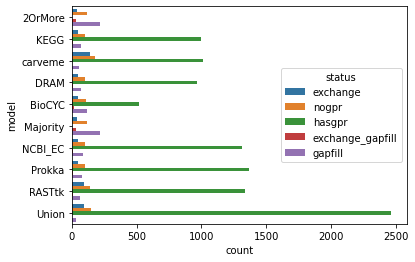

In [109]:
sns.countplot(data=rdf2, y='model', hue='status')
plt.show()

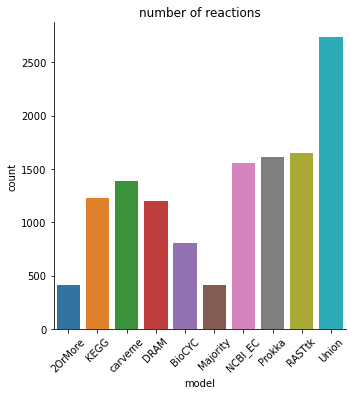

In [110]:
sns.catplot(data=rdf2, x='model', kind='count')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('number of reactions')
plt.show()

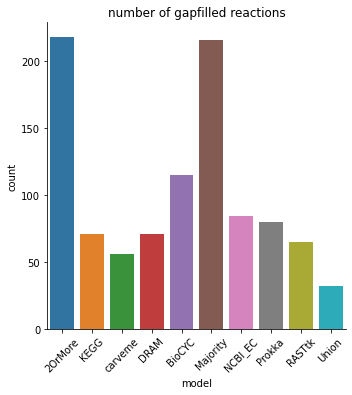

In [111]:
sns.catplot(data=rdf2.loc[rdf2.status.isin(['gapfill'])], x='model', kind='count')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('number of gapfilled reactions')
plt.show()

In [112]:
rdf2.pivot_table(index='model', columns='status', aggfunc='count', sort=True, values='index_gapfill', margins=True)

status    exchange  exchange_gapfill  gapfill  hasgpr   nogpr    All
model                                                               
2OrMore       44.0              36.0    218.0     NaN   113.0    411
BioCYC        51.0              18.0    115.0   516.0   111.0    811
DRAM          45.0              12.0     71.0   966.0   104.0   1198
KEGG          45.0              12.0     71.0   996.0   104.0   1228
Majority      44.0              36.0    216.0     NaN   115.0    411
NCBI_EC       46.0              12.0     84.0  1311.0   105.0   1558
Prokka        49.0              10.0     80.0  1369.0   104.0   1612
RASTtk        93.0               8.0     65.0  1340.0   141.0   1647
Union         98.0               3.0     32.0  2459.0   146.0   2738
carveme      140.0               NaN     56.0  1009.0   181.0   1386
All          655.0             147.0   1008.0  9966.0  1224.0  13000

In [113]:
rdf2.columns

Index(['index_nogap', 'name', 'id', 'gpr_nogap', 'exchange_nogap',
       'reversibility_nogap', 'modelname', 'gapfill_nogap', 'model',
       'hasgpr_nogap', 'index_gapfill', 'gpr_gapfill', 'exchange_gapfill',
       'reversibility_gapfill', 'gapfill_gapfill', 'hasgpr_gapfill',
       'gapfilled', 'status'],
      dtype='object')

In [114]:
cols = ['id', 'name',   'model', 'status', 'hasgpr_nogap', 
       'exchange_gapfill',  'gapfilled',  'gpr_nogap','gpr_gapfill',]

rdf_clean = rdf2[cols].rename(columns={'hasgpr_nogap' : 'hasgpr', 
       'exchange_gapfill' : 'exchange',  }
)
rdf_clean.head()

id           name    model    status hasgpr exchange  gapfilled  \
0  EX_cpd11416_b  EX_cpd11416_b  2OrMore  exchange  False     True      False   
1  EX_cpd00001_b  EX_cpd00001_b  2OrMore  exchange  False     True      False   
2  EX_cpd00254_b  EX_cpd00254_b  2OrMore  exchange  False     True      False   
3  EX_cpd10516_b  EX_cpd10516_b  2OrMore  exchange  False     True      False   
4  EX_cpd00007_b  EX_cpd00007_b  2OrMore  exchange  False     True      False   

  gpr_nogap gpr_gapfill  
0                        
1                        
2                        
3                        
4

In [115]:
rdf_clean.to_csv('kbase_reaction_per_model.csv')

In [116]:
r.reversibility

False

In [123]:
model = models_dict['HOT1A3_Majority_gapfill.model.sbml']
model

<Model HOT1A3_Majority_gapfill_model at 0x1eb93c7f9d0>

In [122]:
model = models_dict['HOT1A3_Majority_nogap.model.sbml']
model

<Model HOT1A3_Majority_nogap_model at 0x1eb933dad30>

In [126]:
model = models_dict['HOT1A3_Union_nogap.model.sbml']
model

<Model HOT1A3_Union_nogap_model at 0x1eb9e1b9ca0>

In [121]:
model

<Model HOT1A3_Majority_gapfill_model at 0x1eb93c7f9d0>